In [1]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import word2vec
from umap import UMAP

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
import numpy as np

In [3]:
import wget
import zipfile

In [4]:
from sklearn.decomposition import TruncatedSVD

In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [6]:
#model_url = 'http://vectors.nlpl.eu/repository/11/180.zip'
#m = wget.download(model_url)
#model_file = model_url.split('/')[-1]
model_file = '180.zip'
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

2022-05-05 11:20:13,150 : INFO : loading projection weights from <zipfile.ZipExtFile name='model.bin' mode='r' compress_type=deflate>
2022-05-05 11:20:17,802 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (189193, 300) matrix of type float32 from <zipfile.ZipExtFile [closed]>', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-05-05T11:20:17.801640', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'load_word2vec_format'}


In [7]:
model

In [9]:
model['птица_NOUN']

array([-7.95522630e-01,  2.30372414e-01,  1.37580824e+00,  1.90246689e+00,
       -1.61870432e+00,  2.12551951e+00,  5.78828335e-01, -1.30941868e+00,
        3.89354885e-01,  3.89009565e-02,  1.71617091e+00,  8.08870494e-01,
       -6.02569520e-01,  1.62358201e+00, -7.29884267e-01, -3.77703071e+00,
       -5.64239323e-01, -2.82019764e-01, -2.60829270e-01, -1.48282266e+00,
       -4.75560379e+00,  1.94040000e+00,  1.75148416e+00, -1.87395632e+00,
        1.79369760e+00,  1.35582536e-02, -1.98657060e+00, -5.74261129e-01,
        1.43283296e+00,  8.54104221e-01, -1.84333336e+00, -3.25812912e+00,
        1.77191257e+00,  2.46369630e-01, -4.02366966e-01,  7.16346577e-02,
       -2.08278155e+00,  2.61585498e+00,  5.58893383e-01,  7.08227396e-01,
       -2.35801530e+00,  2.03017503e-01,  1.55681562e+00,  4.76498395e-01,
       -7.54026592e-01,  1.61889410e+00,  1.73613739e+00, -1.25728536e+00,
       -3.00539345e-01,  1.18183005e+00,  1.15342319e+00, -5.37053633e+00,
        8.80002975e-01, -

In [20]:
model.most_similar(positive=[model['птица_NOUN'], model['плавник_NOUN']], negative=[model['программирование_NOUN']], topn=1)

[('птица_NOUN', 0.7711608409881592)]

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
bird = model['птица_NOUN']
wing = model['крыло_NOUN']
fish = model['рыба_NOUN']
tail = model['плавник_NOUN']
prog = model['программирование_NOUN']

v1 = np.linalg.norm(bird - fish)
v2 = np.linalg.norm(bird - wing)
v3 = np.linalg.norm(fish - tail)
v4 = np.linalg.norm(wing - tail)

In [42]:
bird = model['птица_NOUN']
wing = model['крыло_NOUN']
fish = model['рыба_NOUN']
tail = model['плавник_NOUN']
prog = model['программирование_NOUN']
v1 = get_cos(bird, fish)
v2 = get_cos(bird, wing)
v3 = get_cos(fish, tail)
v4 = get_cos(wing, tail)
print(v1, v2, v3, v4)

0.51466936 0.49934214 0.5994244 0.5259561


In [26]:
print(v1, v2, v3, v4)

29.213263 31.752787 25.45889 29.974388


In [45]:
bird = model['король_NOUN']
wing = model['программирование_NOUN']
fish = model['королева_NOUN']
tail = model['женщина_NOUN']

def get_cos(a, b):
    return cosine_similarity([a], [b])[0][0]

v1 = get_cos(bird, fish)
v2 = get_cos(bird, wing)
v3 = get_cos(fish, tail)
v4 = get_cos(wing, tail)
print(v1, v2, v3, v4)

0.7041438 -0.041836463 0.25153297 -0.0847979


In [8]:
from tqdm import tqdm

In [9]:
import random

In [10]:
all_nouns = []
for w in tqdm(model.index_to_key):
    #print(w)
    if w.split('_')[-1] == 'NOUN':
        all_nouns.append(w)

100%|█████████████████████████████████████████████████████████████████████| 189193/189193 [00:00<00:00, 1017167.38it/s]


In [22]:
#our_nouns = [random.choice(all_nouns) for i in range(1000)]

In [11]:
def get_matrix(all_nouns):
    vectors_of_words = np.zeros((len(all_nouns), model.vector_size))
    for i, word in enumerate(all_nouns):
        vectors_of_words[i] = model[word]
        
    return vectors_of_words

In [12]:
def lsa_matrix(vectors_of_words, n_components, n_iter=100):
    #lsa_obj = TruncatedSVD(n_components=n_components, n_iter=n_iter, random_state=42)
    lsa_data = UMAP().fit_transform(vectors_of_words)
    return lsa_data
#Sigma = lsa_obj.singular_values_
#V_T = lsa_obj.components_.T

In [13]:
def sort_results(lsa_data, all_nouns):    
    sorted_scores_indx = np.argsort(lsa_data, axis=0)[::-1]
    result = np.array(all_nouns)[sorted_scores_indx.ravel()]
    result_nums = np.array(lsa_data)[sorted_scores_indx.ravel()]
    return result, result_nums

In [18]:
%store all_nouns

Stored 'all_nouns' (list)


In [19]:
%store first_matrix

Stored 'first_matrix' (ndarray)


## Итерация первая

In [15]:
first_matrix = get_matrix(all_nouns)
first_lsa = lsa_matrix(first_matrix, 1)

In [16]:
first_result, first_result_num = sort_results(first_lsa, all_nouns)

In [17]:
for i, el in enumerate(first_result):
    print(el, first_result_num[i])

пешка_NOUN [16.524603  6.231688]
тергит_NOUN [11.27765   8.681758]
ферзь_NOUN [16.524517   6.2332387]
эпипрокть_NOUN [11.278269   8.6797695]
d5_NOUN [16.524471   6.2338142]
стернит_NOUN [11.275833  8.677802]
эндшпиль_NOUN [16.523     6.232211]
вырост_NOUN [11.274667  8.677657]
f5_NOUN [16.522764   6.2325635]
склерит_NOUN [11.2723465  8.669202 ]
ничья_NOUN [16.520012   6.2320147]
эпипрокт_NOUN [11.270967  8.668282]
g5_NOUN [16.519745   6.2354813]
церка_NOUN [11.272381   8.6637535]
h5_NOUN [16.519709   6.2349877]
парапрокт_NOUN [11.269108  8.663511]
контригра_NOUN [16.514711   6.2367334]
эпипроквать_NOUN [11.261898  8.651937]
kg8_NOUN [16.51457   6.238009]
антитело_NOUN [9.206805 8.632612]
рокировка_NOUN [16.513565  6.237489]
эпипрокта_NOUN [11.259399  8.62884 ]
a5_NOUN [16.51344   6.238013]
лопасть_NOUN [11.260513  8.625594]
re8_NOUN [16.512962   6.2383637]
вакцина_NOUN [9.128363 8.609205]
b:_NOUN [16.511908  6.237457]
изолят_NOUN [9.147239 8.606917]
перевес_NOUN [16.511438  6.223443]
с

фрака_NOUN [14.176866  4.185287]
сулема_NOUN [9.814098 8.117514]
виноторговец_NOUN [14.173875  6.500522]
осаждение_NOUN [10.239679  8.117377]
ремешок_NOUN [14.169668  4.549338]
пары_NOUN [10.298678  8.116406]
роброн_NOUN [14.169507   4.2338595]
макромолекула_NOUN [9.86736  8.116006]
кружево_NOUN [14.169404   4.4489594]
гидратация_NOUN [10.083327  8.11582 ]
тенериф_NOUN [14.169025  6.380145]
амидина_NOUN [10.157948  8.115706]
обувка_NOUN [14.168762  4.16014 ]
атропин_NOUN [9.633809 8.11393 ]
шальвар_NOUN [14.168315  4.1583  ]
цитомегаловирус_NOUN [9.221374 8.113252]
мензурка_NOUN [14.168059   6.4000893]
домен_NOUN [9.514949  8.1130085]
зипунишка_NOUN [14.16785    4.0366764]
индукторовый_NOUN [9.297678 8.112588]
галка_NOUN [14.167631   5.0681696]
отбор_NOUN [9.30306  8.112338]
жаворонок_NOUN [14.16748    5.0680194]
сурьма_NOUN [10.583067  8.110792]
кофея_NOUN [14.167423   6.4207973]
препарать_NOUN [9.634208 8.108739]
утка_NOUN [14.167046  5.061602]
эфедрин_NOUN [9.699468 8.107713]
голени

хлеба-соль_NOUN [13.934014  6.084868]
лактоз_NOUN [10.169259  7.892226]
альбатрос_NOUN [13.933851  5.046782]
глицерина_NOUN [10.59379    7.8921175]
мичманка_NOUN [13.933715   4.0484514]
глист_NOUN [8.734773 7.891889]
капотик_NOUN [13.933679   4.1511607]
кровообращение_NOUN [8.90528   7.8915486]
пингвин_NOUN [13.933284   5.1045566]
кипячения_NOUN [10.293361  7.890942]
отрепий_NOUN [13.933215  3.893831]
кровоизлияние_NOUN [8.629276  7.8905816]
устрица_NOUN [13.933207  6.935607]
капилляр_NOUN [9.266764 7.890462]
ватина_NOUN [13.932811   4.2309184]
настаивание_NOUN [10.22714    7.8900175]
локоть_NOUN [13.932758   3.9565048]
частица_NOUN [9.9143095 7.889295 ]
донага_NOUN [13.932651   3.9029512]
декстран_NOUN [9.81833  7.889166]
наливать_NOUN [13.93256    6.2437286]
биополимер_NOUN [9.910979 7.888379]
подоел_NOUN [13.932345   4.0927124]
ханка_NOUN [9.423993  7.8882017]
молочко_NOUN [13.932265   6.7968545]
авитаминоз_NOUN [8.601686  7.8880777]
гнезда_NOUN [13.932242   5.0673294]
гельминт_NOUN

мания_NOUN [8.084925 7.710058]
треска_NOUN [13.7949095  5.851481 ]
артериосклероза_NOUN [8.290646 7.709769]
курятина_NOUN [13.794894   6.8336177]
стрептококка_NOUN [9.118713  7.7097077]
жеребец_NOUN [13.794856   3.3521934]
симптоматик_NOUN [8.270482  7.7096148]
чир_NOUN [13.794842   5.8582745]
отеки_NOUN [8.627909  7.7094193]
кекс_NOUN [13.794344   6.9116664]
дерматолог_NOUN [9.442756  7.7092776]
зоб_NOUN [13.793865  4.750794]
дитилин_NOUN [9.331334  7.7092004]
подлещик_NOUN [13.793788   5.6798263]
пеллагра_NOUN [8.566007 7.709117]
вермишель_NOUN [13.793471  6.938291]
лосьон_NOUN [10.763554  7.708749]
буженина_NOUN [13.793332  6.881627]
силикагель_NOUN [10.268791   7.7074885]
фура_NOUN [13.793246   3.2365026]
перитонит_NOUN [8.714092 7.707373]
полосатый_NOUN [13.79298    4.1221166]
депрессия_NOUN [8.236596 7.707362]
чебурек_NOUN [13.792969   6.8302493]
дистилляция_NOUN [10.42328    7.7071395]
седок_NOUN [13.792879   3.2487156]
обморожение_NOUN [8.776184 7.707006]
ветчинка_NOUN [13.7927

безе_NOUN [13.657621   6.6638894]
побег_NOUN [12.178069   7.5249305]
шампур_NOUN [13.657527  6.722746]
сосочек_NOUN [9.240925  7.5248575]
ремешка_NOUN [13.657346   4.2534404]
диализ_NOUN [8.693944 7.524259]
лоб_NOUN [13.657155   3.7413464]
павел_NOUN [10.0848255  7.5231147]
молока_NOUN [13.657057   6.4958544]
изолирование_NOUN [9.137574 7.522941]
рука_NOUN [13.656978   3.9035606]
иглотерапия_NOUN [8.982481 7.522937]
бивень_NOUN [13.656476   5.0687394]
метеоризм_NOUN [8.888259 7.522922]
полотенц_NOUN [13.65637   4.090379]
рассада_NOUN [12.371654  7.522909]
тарань_NOUN [13.656359  6.453639]
диетология_NOUN [9.187209  7.5227504]
задниц_NOUN [13.656      3.9766338]
проба_NOUN [9.867949 7.522521]
капустница_NOUN [13.655645   5.1654816]
невротика_NOUN [8.350207 7.52243 ]
перловка_NOUN [13.655632  6.784752]
парник_NOUN [12.334038  7.522129]
муфточка_NOUN [13.655359   4.0842543]
эвкалипт_NOUN [12.716748   7.5220957]
жаба_NOUN [13.655255  5.154409]
обжигй_NOUN [10.767807   7.5219193]
поплавок_N

всходы_NOUN [12.555945   7.4010167]
табльдовать_NOUN [13.543415   6.0924535]
новорожденный_NOUN [8.544624  7.4007277]
зебра_NOUN [13.543344   4.8552876]
содрогание_NOUN [8.546332  7.4004664]
архар_NOUN [13.542985   4.6679125]
обжиг_NOUN [10.761712   7.3998394]
поросеночка_NOUN [13.542969   6.1145253]
подорожник_NOUN [12.839435   7.3997865]
жарение_NOUN [13.542722  6.731229]
фотон_NOUN [9.726295 7.399426]
рыбоводство_NOUN [13.542711   5.7761893]
фуксия_NOUN [12.614698   7.3991504]
очистки_NOUN [13.542565  6.638945]
осязание_NOUN [8.279231  7.3988504]
кошка_NOUN [13.542564   3.8863616]
дрожание_NOUN [8.774975  7.3986883]
дворняга_NOUN [13.542058   3.8226335]
морилка_NOUN [11.184802  7.398336]
папушник_NOUN [13.54191   6.362489]
фасоль_NOUN [13.109867   7.3979907]
суп-пюре_NOUN [13.541903  6.703016]
цветоводство_NOUN [12.383157   7.3977556]
нетопырь_NOUN [13.541682   4.8637786]
садоводство_NOUN [12.183784   7.3976426]
височек_NOUN [13.541574  3.783502]
размораживание_NOUN [10.413048   7.3

шелководство_NOUN [12.164835   7.2540736]
ручище_NOUN [13.375353  3.895964]
поликарбонат_NOUN [10.78957    7.2536316]
телец_NOUN [13.375233   4.8521814]
чебрец_NOUN [12.631457  7.253567]
сивуча_NOUN [13.375119   5.0137706]
молый_NOUN [9.916806  7.2534914]
черняшка_NOUN [13.374694   6.2885633]
чинара_NOUN [12.682948   7.2534194]
панировка_NOUN [13.374151  6.793227]
выжигания_NOUN [10.074673  7.252984]
отрубить_NOUN [13.37367    6.8853955]
растеньица_NOUN [12.499434  7.252885]
лепех_NOUN [13.373583   6.0215497]
флюид_NOUN [10.158426   7.2527695]
долгуша_NOUN [13.373508   3.1996644]
туф_NOUN [11.135037   7.2525706]
запястие_NOUN [13.372834   4.1500926]
саженециальный_NOUN [12.318616  7.252514]
гага_NOUN [13.372719   4.8599787]
толчок_NOUN [8.964556  7.2525063]
половичка_NOUN [13.372292  4.479272]
термография_NOUN [9.154574 7.252156]
самокрутка_NOUN [13.372274  5.835335]
сжатие_NOUN [10.110202   7.2516065]
нерп_NOUN [13.3721075  5.118505 ]
залежь_NOUN [10.74698   7.250782]
конюх_NOUN [13.3

слоевище_NOUN [12.28213    7.1090617]
рожа_NOUN [13.213857  3.007911]
легирование_NOUN [10.399143   7.1090283]
папирос_NOUN [13.213494  5.774482]
валуй_NOUN [13.12763    7.1084924]
бусы_NOUN [13.21337   5.231493]
клещевин_NOUN [12.234612  7.108065]
шнур_NOUN [13.212854   5.4930034]
клена_NOUN [12.579959  7.107997]
сережок_NOUN [13.212069   5.2351522]
нейрохирург_NOUN [8.436468  7.1074934]
комбикорм_NOUN [13.211796  6.125142]
былинка_NOUN [12.82627    7.1072974]
сельдерей_NOUN [13.211392   7.3488135]
спектрометр_NOUN [9.818102  7.1072435]
паланкин_NOUN [13.211178   3.4623709]
травка_NOUN [12.755428   7.1072307]
пол_NOUN [13.21066    4.8480873]
ангидрит_NOUN [10.830044  7.10691 ]
темечко_NOUN [13.210501  3.226333]
метелки_NOUN [12.570146   7.1062346]
оплеух_NOUN [13.209871   2.7942278]
соление_NOUN [13.468162  7.106231]
бечевка_NOUN [13.209801   5.4610395]
скашивание_NOUN [11.992152  7.10621 ]
шелом_NOUN [13.20953  4.39556]
одряхление_NOUN [8.656243 7.105986]
плевок_NOUN [13.209397   2.8

пирожное_NOUN [13.862763   6.9636497]
секира_NOUN [13.043984  4.629609]
золото_NOUN [11.737063   6.9631133]
папайя_NOUN [13.043917   7.1599193]
модификацие_NOUN [9.462651 6.96283 ]
замочек_NOUN [13.043895   5.2765136]
фильер_NOUN [10.554127   6.9625063]
висюлька_NOUN [13.043346   5.1276417]
радиология_NOUN [8.904568 6.962356]
браслетика_NOUN [13.04219   4.772835]
санитарам_NOUN [8.332935 6.96161 ]
пообедать_NOUN [13.041888   2.7014782]
озимый_NOUN [12.319011  6.961509]
задк_NOUN [13.041792   3.2640343]
берилл_NOUN [11.527826   6.9615054]
чумбура_NOUN [13.041755   3.7392147]
печенье_NOUN [13.871313   6.9614763]
гардероб_NOUN [13.041389  4.889838]
лазер_NOUN [9.87064  6.961472]
бойнь_NOUN [13.040818   4.5243707]
копчение_NOUN [13.7084675  6.961339 ]
пустить_NOUN [13.040391   2.1525316]
плевел_NOUN [12.587499  6.961263]
леток_NOUN [13.040297  4.97073 ]
анатом_NOUN [8.7953005 6.961191 ]
гребешек_NOUN [13.040266   5.9165306]
метаморфизм_NOUN [10.701765  6.960967]
коврика_NOUN [13.040243  4.

остатки_NOUN [12.882517   6.2070775]
разбивка_NOUN [11.221679  6.814298]
завеска_NOUN [12.882425  3.708058]
микрообъект_NOUN [9.445325  6.8142204]
пачпорт_NOUN [12.882367   2.1633558]
дутье_NOUN [10.743932  6.813936]
отсель_NOUN [12.882302   2.2456567]
подработка_NOUN [10.436198  6.813922]
смрад_NOUN [12.882285   6.3710546]
радиоастрономия_NOUN [9.484561 6.813639]
дирать_NOUN [12.881942   2.9156032]
расчистка_NOUN [11.255089  6.813153]
бежать_NOUN [12.881844   2.7159386]
инвентарь_NOUN [11.281185   6.8130746]
колысь_NOUN [12.881523  2.007254]
пятновыводитель_NOUN [10.842649  6.812753]
товотец_NOUN [12.881502   1.8112785]
марципан_NOUN [13.688508   6.8124533]
бердыхо_NOUN [12.8810625  4.469249 ]
обкладка_NOUN [10.035395  6.812282]
-отшельник_NOUN [12.881023  5.323366]
опалубки_NOUN [10.78863   6.812223]
уйти_NOUN [12.881012  2.613098]
фундук_NOUN [13.126986   6.8121815]
исподлобья_NOUN [12.880884   2.4729438]
урюк_NOUN [13.465899   6.8116865]
кроха_NOUN [12.88088    3.4333568]
райбольни

поганый_NOUN [12.755405   2.0684636]
прессы_NOUN [10.628906  6.670097]
фасолин_NOUN [12.75531    4.2983966]
м3_NOUN [9.35332  6.669992]
полтинничка_NOUN [12.755221   3.2866163]
дизель_NOUN [10.485723   6.6694527]
сосна_NOUN [12.755096  7.220129]
мм_NOUN [9.312636  6.6691566]
барбарис_NOUN [12.754641  7.520436]
микроволновка_NOUN [13.395234  6.669099]
репь_NOUN [12.754257   3.8935502]
нарушенность_NOUN [10.610903  6.669059]
меблировка_NOUN [12.754206  5.073604]
обстановок_NOUN [10.503047   6.6688676]
зола_NOUN [12.753914  5.856233]
скручиваний_NOUN [10.301267  6.668706]
тебе_NOUN [12.753842   2.0469987]
озимые_NOUN [12.430693   6.6685677]
вполглаза_NOUN [12.753802   2.4735537]
обводненности_NOUN [10.628576  6.668563]
тростинка_NOUN [12.753732  6.504519]
воздухоподогреватель_NOUN [10.500955  6.668533]
молчок_NOUN [12.753469  2.335809]
судка_NOUN [13.62895   6.668154]
сохач_NOUN [12.753467   4.2383943]
николь_NOUN [9.78365 6.66814]
покуль_NOUN [12.753171  2.244655]
нив_NOUN [12.578333   6

короткий_NOUN [12.671621   3.5692947]
кушать_NOUN [13.835819   6.5699344]
уймись_NOUN [12.671529   2.3961923]
пентамино_NOUN [9.620223  6.5694203]
паршивец_NOUN [12.671388   2.0800993]
шербет_NOUN [13.948582  6.569297]
тростник_NOUN [12.671277   7.0313334]
шурпа_NOUN [13.664992   6.5692897]
черт_NOUN [12.671208   2.0242124]
уравнение_NOUN [8.860399  6.5692544]
стеречь_NOUN [12.671009   2.8824852]
кофеварка_NOUN [13.323624  6.569007]
сивуч_NOUN [12.670588  4.94234 ]
коньячок_NOUN [14.432128   6.5689178]
полено_NOUN [12.670419  5.805845]
термос_NOUN [13.876902   6.5688863]
ошалело_NOUN [12.670411   2.3580527]
клеймение_NOUN [10.8014345  6.5687795]
муженек_NOUN [12.670299   1.6006999]
обломк_NOUN [11.374784  6.568764]
умолк_NOUN [12.670161   2.7656553]
переключение_NOUN [9.98497   6.5683346]
волчиха_NOUN [12.669969   3.8106046]
горщик_NOUN [11.314767   6.5683274]
высокородие_NOUN [12.669898   1.6396829]
порубок_NOUN [11.836041  6.567847]
мулине_NOUN [12.669844   4.2912545]
заварка_NOUN [1

повернуть_NOUN [12.588283   2.9388757]
млн.т_NOUN [10.2189    6.474768]
чубушник_NOUN [12.588232  7.481028]
м/мин_NOUN [9.484539  6.4744883]
лишай_NOUN [12.587606   6.0481043]
динамомашина_NOUN [10.15882   6.474283]
камнеломка_NOUN [12.587605   7.3566747]
отрыжка_NOUN [12.934123   6.4742107]
плевел_NOUN [12.587499  6.961263]
чаю_NOUN [14.29956   6.474176]
подвезти_NOUN [12.587248  2.657595]
коэффициент_NOUN [8.637675  6.4740033]
песочек_NOUN [12.587157  6.215975]
бордо_NOUN [14.324712   6.4738674]
гоготать_NOUN [12.587057   3.3085256]
выпить_NOUN [14.318994   6.4737186]
кизильник_NOUN [12.587041   7.4129543]
шпинделя_NOUN [10.82617   6.473663]
десяточек_NOUN [12.586981   2.8546433]
сошник_NOUN [12.22949   6.473654]
тимофеевка_NOUN [12.586966   7.2212763]
сох_NOUN [12.525321   6.4735713]
рубить_NOUN [12.586923   3.7096822]
утес_NOUN [11.983752   6.4733787]
галдеть_NOUN [12.586797   2.2652512]
осыпь_NOUN [11.910821   6.4733496]
рызкий_NOUN [12.586747  4.301898]
гузка_NOUN [13.390947   6.

колошник_NOUN [10.850323   6.3843293]
дохлятина_NOUN [12.512262   2.8915648]
буерак_NOUN [12.407827  6.384047]
дерня_NOUN [12.512232   3.1878319]
кувшин_NOUN [13.97351    6.3839784]
женька_NOUN [12.512228   1.7641749]
сопряжение_NOUN [10.292437  6.383876]
лешка_NOUN [12.512203   1.8633142]
у-_NOUN [9.210437  6.3838553]
соцветий_NOUN [12.5120735  7.2632203]
эн_NOUN [9.24347  6.383692]
грызть_NOUN [12.511491   3.6492448]
кофейка_NOUN [14.208905  6.383681]
гуськом_NOUN [12.511466   3.7149909]
хоббит_NOUN [11.239792  6.383312]
капли_NOUN [12.511451  5.905257]
гарнец_NOUN [13.354188  6.383054]
тонуть_NOUN [12.511326   3.2228832]
чернолесье_NOUN [12.426887   6.3829875]
онкилона_NOUN [12.511097   4.2243786]
пива_NOUN [14.242458   6.3828926]
лапочка_NOUN [12.511042  2.420732]
полиный_NOUN [9.226331 6.382179]
спрыгнуть_NOUN [12.511038  2.89543 ]
бочка_NOUN [13.951245  6.381972]
клевера_NOUN [12.510908  6.613193]
арак_NOUN [14.207003   6.3819585]
юр_NOUN [12.510781  5.31583 ]
рулон_NOUN [12.1040

серебрянка_NOUN [11.801363   6.2964864]
кабинет_NOUN [12.447149   4.9066377]
дециметр_NOUN [9.398693  6.2963853]
косьбый_NOUN [12.447141  6.43337 ]
поднести_NOUN [14.262982   6.2962728]
смолка_NOUN [12.447136   7.3048673]
когерер_NOUN [10.007367   6.2955666]
кто-то_NOUN [12.447057   1.9845815]
юго-восток_NOUN [11.702732   6.2955203]
жаркий_NOUN [12.44702    5.6888714]
тлен_NOUN [12.925999   6.2955174]
хрустеть_NOUN [12.446863   3.8021886]
винище_NOUN [14.307196  6.295425]
сараюшка_NOUN [12.446821   4.9318314]
склад_NOUN [11.354882   6.2950187]
дебри_NOUN [12.446181  6.398678]
задний_NOUN [10.705887  6.294847]
прожитие_NOUN [12.446123   3.5344846]
разгрузка_NOUN [10.491904  6.294582]
магазин_NOUN [12.446123   4.8965983]
квть_NOUN [9.593541  6.2943254]
миленький_NOUN [12.445972  2.30192 ]
жнейка_NOUN [12.184053   6.2942057]
бабенька_NOUN [12.445886   1.4722255]
варьирований_NOUN [9.1232815 6.2941194]
матерый_NOUN [12.445779   4.2446218]
желобка_NOUN [11.7294235  6.294049 ]
хрипло_NOUN [1

хр_NOUN [11.723655  6.168537]
сопение_NOUN [12.375023   -0.09189309]
циферблат_NOUN [10.225606  6.168174]
весело_NOUN [12.374919   2.7659905]
плавень_NOUN [12.183077   6.1681175]
сверкать_NOUN [12.374769  4.757004]
глобус_NOUN [10.682759  6.168067]
беседка_NOUN [12.374717  5.965842]
лавина_NOUN [11.746489  6.167866]
лязганье_NOUN [12.374699   -0.03499605]
долинка_NOUN [12.091176   6.1674237]
спросонья_NOUN [12.374662   2.7324278]
картирать_NOUN [10.605204   6.1671114]
интересно_NOUN [12.374656   3.0824835]
протока_NOUN [12.078291   6.1669745]
метеор_NOUN [12.374511  5.144023]
кал_NOUN [12.798865   6.1669073]
обрубка_NOUN [12.374248  5.418207]
рекламация_NOUN [10.137359  6.166853]
фырканье_NOUN [12.374211   -0.06653539]
археология_NOUN [9.628946 6.166715]
страм_NOUN [12.374155   2.1378984]
прут_NOUN [12.505831   6.1664767]
тебя_NOUN [12.373998   2.5121813]
распиливание_NOUN [10.6653805  6.166465 ]
кресс_NOUN [12.373944  7.289323]
колобок_NOUN [13.396815   6.1662154]
опылитель_NOUN [12.3

радиомаяк_NOUN [9.934264 6.042989]
волй-то_NOUN [12.322292  2.678987]
принтер_NOUN [9.205784  6.0429425]
срамница_NOUN [12.322134  2.025604]
кусочка_NOUN [11.527732   6.0427976]
ксюша_NOUN [12.322011   1.9851503]
/ч_NOUN [9.021284  6.0426373]
будочка_NOUN [12.321995   5.1715183]
-таг_NOUN [11.626136  6.042585]
посвистывание_NOUN [12.321962    0.08750407]
ssp_NOUN [9.016897 6.04254 ]
бодрый_NOUN [12.321874   2.9263742]
молдинг_NOUN [10.46855   6.042223]
пал_NOUN [12.321792  6.976772]
суконка_NOUN [12.429773  6.042155]
казачка_NOUN [12.321778   1.3932302]
табачище_NOUN [13.094952  6.042015]
развилина_NOUN [12.321642  5.804168]
нефтедобыча_NOUN [9.332472 6.041183]
берендейка_NOUN [12.321629   3.1638672]
2005.03.11_NOUN [8.567155  6.0409517]
галя_NOUN [12.321604   1.4787712]
выдох_NOUN [10.473097   6.0407367]
сруб_NOUN [12.32146    5.7520394]
мехи_NOUN [12.005905   6.0404205]
баз_NOUN [12.321386  4.219478]
крышка_NOUN [12.845461  6.04016 ]
звяк_NOUN [12.321351    0.24416049]
дукат_NOUN [8.

ножик_NOUN [12.590125  5.920179]
поилец_NOUN [12.263603   2.4106417]
проулок_NOUN [12.349057  5.92015 ]
пузыирать_NOUN [12.263554  4.14438 ]
кабачок_NOUN [13.366046   5.9199347]
картоха_NOUN [12.263534   4.4068604]
запаска_NOUN [10.567493  5.919773]
рыданье_NOUN [ 1.2263464e+01 -5.3928391e-04]
чайная_NOUN [13.325235   5.9197435]
дышать_NOUN [12.263443   3.4810824]
траттория_NOUN [13.41743  5.91974]
нинель_NOUN [12.263359   1.6528878]
cap_NOUN [8.567597  5.9196777]
цыпки_NOUN [12.263347   3.8764172]
час_NOUN [9.094041 5.919338]
делаю_NOUN [12.263246   2.5809908]
наносекунда_NOUN [9.292299  5.9193087]
бросиловек_NOUN [12.263112  2.741955]
рыбопромышленник_NOUN [13.717257   5.9192367]
шумя_NOUN [12.2631035   0.14877778]
авосить_NOUN [8.635474  5.9189568]
калиточка_NOUN [12.262892   5.1121817]
инвентаризация_NOUN [8.475943  5.9185286]
заткнуть_NOUN [12.262672   3.3373022]
водосброс_NOUN [11.191081   5.9180636]
сугрева_NOUN [12.262581   2.8719904]
потребление_NOUN [8.788232  5.9178004]
рыча

пожарища_NOUN [12.197611  4.441095]
тридцать_NOUN [9.155477  5.8116927]
готовить_NOUN [12.197544  3.482796]
арсенал_NOUN [10.442283   5.8116794]
падь_NOUN [12.197444  6.345927]
метро-свеча_NOUN [9.035571 5.811612]
саксаулый_NOUN [12.197415  6.570273]
парковка_NOUN [10.578911   5.8114467]
надел_NOUN [12.197375  6.585449]
предгорий_NOUN [11.672796  5.811363]
забыловек_NOUN [12.197362   2.5633895]
иотец_NOUN [8.653834 5.811098]
дом_NOUN [12.197148   5.0695024]
гребок_NOUN [10.810197   5.8107467]
дидывать_NOUN [12.1969595  2.7004468]
поскотина_NOUN [12.508171   5.8107305]
старик_NOUN [12.196743  1.266221]
пристрелка_NOUN [10.271042   5.8106484]
доме_NOUN [12.196724   2.4100018]
суховей_NOUN [11.812753   5.8101325]
былотец_NOUN [12.196591   2.9899423]
восемь_NOUN [9.176513 5.809782]
бугор_NOUN [12.196536  6.482029]
шивер_NOUN [11.771351   5.8094482]
бабушка_NOUN [12.196533   1.1045148]
эскалатор_NOUN [11.062923   5.8093486]
ручей_NOUN [12.196497  6.317178]
год_NOUN [8.865191  5.8093333]
зер

шторм_NOUN [11.819193  5.728054]
насыпь_NOUN [12.13525   6.398008]
стропила_NOUN [12.102472  5.727848]
дехкан_NOUN [12.134969  6.985874]
изготовка_NOUN [11.120989   5.7277527]
тюленить_NOUN [12.134451  3.960919]
рыбина_NOUN [14.078727   5.7277412]
кулачка_NOUN [12.134415   2.9211748]
эскадра_NOUN [11.374727   5.7277336]
вытье_NOUN [12.13432     0.41878232]
трехтонка_NOUN [10.958252  5.727644]
лёт_NOUN [12.134221   4.6023893]
бетонка_NOUN [11.055916  5.727471]
коротышка_NOUN [12.134122   2.0186946]
т.-е_NOUN [9.24871  5.727252]
бездорожье_NOUN [12.134101   5.8513265]
карбас_NOUN [11.792667  5.727086]
сторонетраница_NOUN [12.13408    2.8482003]
[сяча_NOUN [8.8017025 5.727068 ]
тетушка_NOUN [12.133935  1.178748]
дуло_NOUN [11.304008   5.7269983]
выносить_NOUN [12.133884   2.4640741]
второе_NOUN [9.299704  5.7267528]
кака_NOUN [12.133864   2.3658986]
полтысяча_NOUN [8.990583 5.726746]
павло_NOUN [12.133819   2.6393168]
сектраница_NOUN [9.7589855 5.7267017]
колченогий_NOUN [12.1337595  2.65

купол_NOUN [12.063421   5.4796405]
таэль_NOUN [9.068047 5.641878]
хрипот_NOUN [12.063202    0.56196505]
(с_NOUN [9.022057 5.641777]
самовараница_NOUN [12.063074   3.3547912]
б/у_NOUN [10.466031   5.6417336]
непогодь_NOUN [12.0630455  4.4766984]
лунка_NOUN [13.537176   5.6416054]
взлобок_NOUN [12.062917  5.829076]
ветер_NOUN [12.166731  5.641527]
холла_NOUN [12.062907   3.9322696]
двустволка_NOUN [11.41107    5.6414113]
котище_NOUN [12.062866   3.5054064]
червяка_NOUN [13.494507  5.64123 ]
плесо_NOUN [12.062861  6.028776]
балкон_NOUN [12.2913    5.641166]
ольга_NOUN [12.06278    2.7009246]
1/2_NOUN [9.117774 5.641105]
развилка_NOUN [12.062325  6.022958]
разворот_NOUN [10.49672    5.6405344]
пожог_NOUN [12.062241   2.1523697]
абонент_NOUN [8.900319  5.6402125]
никифор_NOUN [12.062183   1.8271405]
перелеска_NOUN [12.389323  5.640179]
кречмар_NOUN [12.062177   2.7084556]
бревн_NOUN [12.343701  5.640151]
наудачу_NOUN [12.062161   3.9169745]
легководолаз_NOUN [10.491869   5.6401105]
середи_N

находить_NOUN [11.988871   2.7780075]
автоваз_NOUN [9.574611  5.5461583]
-товарищ_NOUN [11.988735   2.1528964]
скульптура_NOUN [11.883341  5.546009]
моросец_NOUN [11.9885845  5.0260663]
медуза_NOUN [13.828799   5.5459547]
жарища_NOUN [11.988514  4.32295 ]
останки_NOUN [11.85711   5.545793]
травосеяние_NOUN [11.988481  7.218985]
бурильщик_NOUN [10.622279   5.5455875]
хмырь_NOUN [11.988445   1.8900951]
крен_NOUN [11.111913  5.54535 ]
бакланов_NOUN [11.988348   2.1004322]
подкачка_NOUN [10.210619  5.544999]
юсуф_NOUN [11.988314   2.6150692]
конструктор_NOUN [10.1167755  5.5449877]
мирон_NOUN [11.988226  2.608859]
телеобъектив_NOUN [9.5252075 5.544925 ]
нашй-то_NOUN [11.987841  3.033548]
милийский_NOUN [8.772379 5.544502]
зинаида_NOUN [11.987542   2.0913258]
средства_NOUN [8.198723 5.544386]
племянник_NOUN [11.987451   1.0796596]
автодрома_NOUN [10.051689  5.54438 ]
прибить_NOUN [11.987384   3.7134476]
мтр_NOUN [9.340595  5.5435486]
погода_NOUN [11.987373  5.527532]
автовладелец_NOUN [9.88

шкворень_NOUN [12.343473   5.4610863]
склон_NOUN [11.92634   6.489154]
бечевка_NOUN [13.209801   5.4610395]
домработница_NOUN [11.925973   1.3274436]
камыша_NOUN [12.340405  5.461031]
угоднотец_NOUN [11.925873  2.883259]
топляк_NOUN [12.577753  5.46098 ]
мужчинка_NOUN [11.925857   2.0357575]
с.-з_NOUN [9.853918 5.460857]
цыганенка_NOUN [11.925747   2.1380591]
экспедиция_NOUN [10.917949  5.46082 ]
стрежень_NOUN [11.925724   5.5982637]
льд_NOUN [11.706821   5.4607058]
солончака_NOUN [11.9256935  6.335276 ]
поставщик_NOUN [8.472569 5.460467]
мадонна_NOUN [11.925609   5.4172397]
баллист_NOUN [10.783293   5.4604344]
игольник_NOUN [11.925585   4.8578043]
дилера_NOUN [8.703136  5.4602494]
христолюбец_NOUN [11.924677   2.4026546]
синергетики_NOUN [8.640292 5.46018 ]
перекинать_NOUN [11.924331  5.596232]
судостроитель_NOUN [11.130297  5.460077]
тулово_NOUN [11.924321   3.9395354]
собраница_NOUN [8.850876 5.459216]
горшка_NOUN [11.924277   2.7960567]
страництраница_NOUN [9.353126  5.4591675]
мос

чебурашка_NOUN [11.868107   3.8763058]
тб_NOUN [9.834788 5.383171]
нинок_NOUN [11.8676815  2.1971233]
рефинансирование_NOUN [8.189721  5.3831444]
гробниец_NOUN [11.867637   5.3556395]
исчерпание_NOUN [8.083605  5.3831306]
эви_NOUN [11.867571  2.539126]
проектировщики_NOUN [10.232203  5.383021]
отмести_NOUN [11.86725    5.5793552]
кашалот_NOUN [13.733794   5.3825397]
буруна_NOUN [11.867187  5.361232]
евругой_NOUN [9.086531 5.382472]
мальвин_NOUN [11.867094  2.68947 ]
пушчонка_NOUN [10.907297   5.3823385]
мане_NOUN [11.867064   2.8295836]
хождение_NOUN [10.703395  5.382322]
апсид_NOUN [11.866995   5.6536145]
конвертика_NOUN [13.011488   5.3821015]
покойница_NOUN [11.866874   1.2291094]
остойчивости_NOUN [11.163042  5.382066]
проталинка_NOUN [11.866833  4.291521]
поделка_NOUN [11.610351   5.3820386]
мятлев_NOUN [11.866676   2.5059197]
воздухоплаватель_NOUN [10.527342  5.382001]
мозаик_NOUN [11.866586   5.5504856]
надбавка_NOUN [8.354957  5.3818607]
метел_NOUN [11.866461  3.974013]
тренер_

планирование_NOUN [8.153116  5.3094444]
серебрянка_NOUN [11.801363   6.2964864]
75-летий_NOUN [6.6099396 5.3094335]
сне-той_NOUN [11.801301   3.0744884]
смазчик_NOUN [10.964      5.3093157]
близко_NOUN [11.801278   3.4482374]
муравейник_NOUN [13.733477  5.30931 ]
мари_NOUN [11.801159   2.8337078]
интенсификация_NOUN [7.903862  5.3092265]
аспирантка_NOUN [11.801048   1.3936175]
пилотаж_NOUN [10.19273   5.308854]
выпускница_NOUN [11.800734   1.1780363]
борка_NOUN [12.394255  5.308817]
стропа_NOUN [11.800587   5.2007537]
глухомань_NOUN [12.275782  5.308685]
полово_NOUN [11.800527  3.587876]
санация_NOUN [8.861671  5.3084645]
мановение_NOUN [11.800466  3.922892]
аванс_NOUN [8.443088 5.308141]
летотец_NOUN [11.800378   3.9810066]
рюкзак_NOUN [13.305257   5.3080173]
завтрее_NOUN [11.800372   3.3431334]
будка_NOUN [12.309547  5.307928]
прервать_NOUN [11.800312   3.1188066]
камысокий_NOUN [13.226608  5.307867]
алка_NOUN [11.800205   3.1295905]
60-летий_NOUN [6.631334 5.307724]
солнце-той_NOUN 

физкультура_NOUN [10.137261   5.2373133]
дылд_NOUN [11.745455  2.658974]
допэмиссия_NOUN [8.352922 5.237266]
андреевна_NOUN [11.745115    0.99855936]
-перехватчик_NOUN [10.316767  5.237136]
захохотать_NOUN [11.744994  2.922706]
утренник_NOUN [12.240209   5.2369895]
кайть_NOUN [11.744964  3.238915]
гимнаст_NOUN [9.919718 5.23696 ]
брести_NOUN [11.744763   4.4097223]
сглаживание_NOUN [7.8970127 5.2368197]
глетчер_NOUN [11.744336  5.790583]
корабельщик_NOUN [11.521255   5.2367268]
осматривать_NOUN [11.744218   3.1794162]
папанинец_NOUN [11.037688  5.236405]
канальство_NOUN [11.744168   2.5237277]
уж_NOUN [13.61667    5.2362547]
надолба_NOUN [11.744166  4.72521 ]
крейсерство_NOUN [11.275707   5.2362294]
софита_NOUN [11.744136  4.580898]
примеч_NOUN [8.930372 5.23613 ]
живьем_NOUN [11.744134   3.7894077]
дельтапланерист_NOUN [10.375596  5.236124]
держаться_NOUN [11.74395    3.8718002]
гальюн_NOUN [11.610063   5.2360754]
кактусый_NOUN [11.74385   3.732177]
блог_NOUN [8.726122  5.2359767]
бли

желть_NOUN [11.681035  4.397297]
казино_NOUN [10.321483   5.1614504]
лодь_NOUN [11.681023   5.1683507]
горизонт_NOUN [12.64074    5.1613817]
мара_NOUN [11.680862   3.3369272]
медкомиссия_NOUN [9.139644  5.1610713]
алкаш_NOUN [11.680491   1.6638014]
конвоирование_NOUN [10.150493   5.1610537]
дела_NOUN [11.68042    2.3219004]
сещ_NOUN [10.0285425  5.160861 ]
лыхать_NOUN [11.680329  2.397261]
речник_NOUN [11.357904   5.1607623]
пищик_NOUN [11.680266  3.842576]
подзон_NOUN [10.576496   5.1607485]
ксенька_NOUN [11.6801605  3.241201 ]
срубо_NOUN [12.161501  5.160731]
цепи_NOUN [11.68011   4.038121]
кузнец_NOUN [11.1344595  5.160723 ]
вдова_NOUN [11.68011   1.088867]
монограмма_NOUN [13.196672  5.160637]
мост_NOUN [11.680036   5.9831133]
стюардесс_NOUN [10.669201  5.160391]
бабль_NOUN [11.680034   2.7476292]
секретра_NOUN [12.938534   5.1600676]
пионервожата_NOUN [11.679858   2.0369813]
шкапик_NOUN [12.894414   5.1599574]
баш_NOUN [11.679802  2.996168]
бирюза_NOUN [13.154227  5.159941]
засу_N

гребца_NOUN [11.626656  5.577371]
снегирь_NOUN [14.166532  5.099625]
оу_NOUN [11.626651   3.2771444]
мансард_NOUN [11.863717  5.099619]
поплакать_NOUN [11.626612   2.7246275]
должник_NOUN [8.010827  5.0994215]
-земля_NOUN [11.626569   2.3928857]
ласточка_NOUN [14.116472  5.099256]
бошка_NOUN [11.626472   3.6616306]
норма_NOUN [8.064497  5.0990396]
-таг_NOUN [11.626136  6.042585]
-лейтенант_NOUN [11.27675    5.0989366]
предводительша_NOUN [11.625992   1.7910538]
командор_NOUN [11.257954   5.0986853]
ульген_NOUN [11.625978   5.9809895]
п/пый_NOUN [9.2950735 5.098646 ]
продлёнкй_NOUN [11.625881   2.3919268]
монте-карло_NOUN [10.292051  5.098542]
лот_NOUN [11.625868  5.732367]
бэнк_NOUN [8.438899  5.0983653]
кэрэксура_NOUN [11.625589  5.992126]
номинация_NOUN [9.353656  5.0981727]
сокровищница_NOUN [11.625544   5.0400887]
курочка_NOUN [13.911699   5.0981507]
гум_NOUN [11.625541  4.549309]
ит_NOUN [9.276678 5.097762]
поповича_NOUN [11.625486  1.604275]
дувал_NOUN [12.178067  5.09757 ]
дамоч

жовтяк_NOUN [11.560981   2.9105237]
ушко_NOUN [13.396551   5.0338254]
кают_NOUN [11.560732   5.4043183]
штакетина_NOUN [12.173847  5.033567]
солнечность_NOUN [11.560668   4.1357403]
баклан_NOUN [13.981852  5.033523]
модистка_NOUN [11.560637   1.5786817]
стипендия_NOUN [8.681749  5.0334435]
цейхгауз_NOUN [11.560625  4.222893]
радуг_NOUN [12.456746   5.0334234]
древостой_NOUN [11.560609   7.2039504]
векселедержатель_NOUN [8.14571   5.0332713]
помывка_NOUN [11.5605     4.1720815]
олимпионик_NOUN [9.805306  5.0331097]
участливо_NOUN [11.560399   2.5779986]
костяшка_NOUN [10.584829  5.032682]
задевать_NOUN [11.560362   2.8308494]
гаи_NOUN [9.89457   5.0324807]
клюз_NOUN [11.560301  5.598929]
энергохолдинг_NOUN [8.514972 5.032238]
mesdam'очки_NOUN [11.560267   1.8891803]
снимок_NOUN [8.909795  5.0318913]
кики_NOUN [11.5601225  3.0269642]
песец_NOUN [13.801526   5.0318437]
глупышка_NOUN [11.560043   2.4595044]
вьюрок_NOUN [13.763367  5.03178 ]
дунечка_NOUN [11.560019   3.1531725]
нора_NOUN [1

федул_NOUN [11.486224   2.9827724]
вулканолог_NOUN [10.577427  4.96001 ]
потаскушка_NOUN [11.486137  1.642762]
прочесывание_NOUN [10.318695  4.959885]
бурум_NOUN [11.486074   3.5022979]
каменщик_NOUN [11.088169   4.9598517]
зюйд_NOUN [11.485488  5.455669]
кошелечка_NOUN [13.0575905  4.959842 ]
палубый_NOUN [11.485461   5.4770074]
руно_NOUN [13.396137   4.9597063]
вашгерд_NOUN [11.485332  6.162455]
блошка_NOUN [12.805617  4.959686]
поздравлять_NOUN [11.485185  3.278051]
агроном_NOUN [10.628387  4.959576]
сталиотреть_NOUN [11.485158   2.9153626]
пристенка_NOUN [10.477166  4.959341]
трос-батарея_NOUN [11.485114  4.311184]
обязательстве_NOUN [8.228696  4.9593234]
качкий_NOUN [11.485087   5.4671903]
гардин_NOUN [13.061165   4.9592376]
общей-то_NOUN [11.485056   2.6018624]
отлов_NOUN [13.33586    4.9590845]
хаза_NOUN [11.484825  3.02798 ]
ондатра_NOUN [13.299548   4.9590816]
электролиния_NOUN [11.484786  4.337609]
15_NOUN [9.590815 4.959079]
гондол_NOUN [11.484716  5.487926]
марковца_NOUN [1

лампешка_NOUN [12.234074   4.8881235]
точилка_NOUN [11.418065   4.1634536]
накладная_NOUN [9.059316  4.8876886]
сел_NOUN [11.418058   4.2797384]
фонтанчика_NOUN [11.821884  4.887206]
фомка_NOUN [11.417991   1.9404368]
берлога_NOUN [13.583118   4.8871374]
племянничек_NOUN [11.417986   2.8782363]
балобан_NOUN [13.528105   4.8861785]
юрий_NOUN [11.417852   2.6071813]
колористика_NOUN [9.456685 4.886133]
рик_NOUN [11.417767   3.0897298]
свечиотреть_NOUN [12.127627  4.885944]
вавочка_NOUN [11.417485   2.6061573]
подплыть_NOUN [11.658406  4.885925]
встречать_NOUN [11.417285   3.6028163]
гиревик_NOUN [10.095675   4.8857923]
дядик_NOUN [11.417281   2.7896836]
неоный_NOUN [11.3407    4.885696]
магазей_NOUN [11.417237   3.5321264]
портмоне_NOUN [13.120335   4.8856144]
буянство_NOUN [11.417144  2.102107]
лампад_NOUN [12.369484  4.885504]
универсама_NOUN [11.416971  4.591682]
прорытие_NOUN [11.028211  4.885436]
везувий_NOUN [11.416884  4.315224]
дерегулирование_NOUN [8.418762 4.885358]
вошебойка_N

воднолыжник_NOUN [10.410473  4.803731]
астольф_NOUN [11.353466  2.312378]
администрация_NOUN [8.570871  4.8035636]
фор_NOUN [11.353465  2.484521]
сен_NOUN [12.569655  4.803542]
погудка_NOUN [11.3530855  2.9096224]
пограничник_NOUN [10.324441  4.8035  ]
фам_NOUN [11.353022   2.1383846]
темза_NOUN [11.264905   4.8032575]
разговорец_NOUN [11.35295   3.104344]
соболь_NOUN [13.808693  4.802998]
сидорыч_NOUN [11.352931   3.2100358]
нормализация_NOUN [7.958311  4.8028417]
местами_NOUN [11.352875  7.058627]
огранщик_NOUN [11.127973   4.8025947]
нынчй-то_NOUN [11.352844   3.0661318]
выселка_NOUN [12.286216  4.802567]
вахть_NOUN [11.352602   4.9465833]
циклоный_NOUN [11.029931   4.8025246]
дредноут_NOUN [11.352576  5.57661 ]
таксый_NOUN [9.594026 4.802502]
грузинка_NOUN [11.352231  1.31652 ]
койка_NOUN [13.222622   4.8023496]
наклад_NOUN [11.352027   2.2662456]
миклуха_NOUN [11.306442   4.8020854]
алть_NOUN [11.352023  2.742613]
талон_NOUN [12.080109  4.801366]
блокнота_NOUN [11.351951   3.91370

тревожить_NOUN [11.294114   3.5744972]
лаборант_NOUN [8.985212  4.7248626]
северо-северо-восток_NOUN [11.294045   3.5706513]
востребованность_NOUN [8.378396  4.7248034]
простофиля_NOUN [11.293959   1.7020952]
лум_NOUN [13.160561  4.724793]
жиган_NOUN [11.293951   1.8322567]
госфинансирование_NOUN [8.978123 4.724682]
вопросик_NOUN [11.293877   2.5554724]
мейджор_NOUN [8.918944 4.724584]
преподавание_NOUN [11.2937975   0.78195107]
кизи_NOUN [11.379649   4.7244825]
моргать_NOUN [11.293394   3.5869684]
пудр_NOUN [12.656127  4.724327]
костогрыз_NOUN [11.2933655  2.9096684]
камелек_NOUN [12.295755   4.7242527]
клубка_NOUN [11.293341   3.8469563]
обер-кондуктор_NOUN [10.897946   4.7242503]
шваль_NOUN [11.29334    1.6556344]
прокат_NOUN [8.104169 4.724102]
дашутка_NOUN [11.29318    2.7024124]
дезактивация_NOUN [10.751443   4.7240734]
рапель_NOUN [11.293067  5.58792 ]
утиль_NOUN [11.382738  4.724052]
прочесть_NOUN [11.29299   2.582129]
генинспарт_NOUN [10.059533   4.7233686]
куншткамор_NOUN [11

качуча_NOUN [7.065368 4.655101]
скоморо_NOUN [11.238265   1.5510218]
сводка_NOUN [9.28835  4.655054]
солдатишка_NOUN [11.238043  3.11255 ]
промышленника_NOUN [11.455843  4.654923]
постница_NOUN [11.237847   2.0198836]
емка_NOUN [9.446533 4.654876]
именинник_NOUN [11.237481   1.2406714]
экспонент_NOUN [8.999047  4.6548443]
пятилетний_NOUN [11.237373   2.4392726]
мечников_NOUN [9.777794  4.6547384]
парапроктовый_NOUN [11.237331  8.529214]
кооперирование_NOUN [8.90132  4.654616]
оз_NOUN [11.23733    6.9858155]
сингл_NOUN [7.7635474 4.6545596]
александругой_NOUN [11.237251   3.3733106]
премьер-лейтенанть_NOUN [11.433055   4.6544714]
чучмек_NOUN [11.237232   2.6934168]
игрец_NOUN [7.198457  4.6544333]
модница_NOUN [11.236942   1.3656573]
манить_NOUN [11.95649    4.6544027]
цвет_NOUN [11.236874  7.499592]
-самоучка_NOUN [10.404624  4.65433 ]
глюцилин_NOUN [11.236784   3.8897922]
фокстрот_NOUN [7.0297856 4.654215 ]
сотский_NOUN [11.236615   3.1798167]
кормежка_NOUN [13.323853   4.6538525]
мат

подсобке_NOUN [11.177545   2.8998575]
электрогитар_NOUN [7.3766627 4.5840955]
алебастра_NOUN [11.177544  6.928572]
ножны_NOUN [13.198287   4.5840697]
проволочка_NOUN [11.177531   6.6464705]
рэпер_NOUN [7.56391   4.5840297]
офицерша_NOUN [11.177408   2.4080353]
палица_NOUN [13.122013   4.5838037]
захлеб_NOUN [11.177392  3.427007]
соло_NOUN [6.8186164 4.583669 ]
фрачник_NOUN [11.177101   2.5566916]
кирха_NOUN [11.43078    4.5834737]
зарубежный_NOUN [11.177035   2.6063495]
концертмейстер_NOUN [7.2168574 4.583461 ]
маркитантка_NOUN [11.176994  3.136152]
скрипачка_NOUN [7.152731 4.58333 ]
вспоминать_NOUN [11.176915   3.0020754]
кент_NOUN [13.458736  4.582949]
касситерять_NOUN [11.176865  6.287247]
кларнетист_NOUN [7.0906444 4.5828366]
кусак_NOUN [11.176747   3.6054206]
ремень_NOUN [14.184511  4.58283 ]
протекать_NOUN [11.176436  3.927698]
утро_NOUN [12.777115  4.582734]
зарастание_NOUN [11.176428  6.932629]
гиляков_NOUN [11.410537   4.5826254]
мегера_NOUN [11.176112   1.8191845]
штакетин_NO

мебелишка_NOUN [12.093811  4.522532]
клозет_NOUN [11.118607   4.2692137]
пенсие_NOUN [9.223024 4.522145]
выроста_NOUN [11.118594  8.330388]
передовика_NOUN [10.138891   4.5220146]
какие_NOUN [11.118466  3.372138]
запевала_NOUN [7.1966386 4.521944 ]
цыганый_NOUN [11.11839    3.1811025]
-геолог_NOUN [10.298591  4.521928]
вдовы_NOUN [11.118241   2.2960346]
аванзал_NOUN [11.781816  4.52191 ]
тепла_NOUN [11.118101   4.2492685]
педучилище_NOUN [9.560101  4.5217876]
листка_NOUN [11.1180935  4.532109 ]
ойстрах_NOUN [7.160474  4.5216937]
тюрин_NOUN [11.118017   3.0144532]
бахрома_NOUN [13.981887   4.5215745]
коминт_NOUN [11.117989   3.9967244]
клавишник_NOUN [7.2344255 4.5215626]
сороковина_NOUN [11.1177845  2.8382845]
затягивание_NOUN [8.137282 4.521524]
брюзга_NOUN [11.11771   1.720872]
учебный_NOUN [9.309121 4.521518]
фигушка_NOUN [11.117706   2.8951364]
века_NOUN [9.235147 4.521405]
горазда_NOUN [11.117488   3.1131787]
балетмейстер_NOUN [7.2026772 4.5213723]
отрывать_NOUN [11.11731    3.761

печечка_NOUN [11.963     4.452456]
утюжка_NOUN [11.062591   3.4934032]
адажио_NOUN [7.083861  4.4523544]
нестерпимость_NOUN [11.062549   2.6303272]
попса_NOUN [7.489692  4.4521914]
ай-ай_NOUN [11.062541  2.967441]
аппликатура_NOUN [6.980208  4.4521065]
обслуга_NOUN [11.062534  4.354482]
опознания_NOUN [9.360357  4.4518976]
восточник_NOUN [11.062467   2.9736154]
кинопроизводство_NOUN [8.068414  4.4516096]
дифферент_NOUN [11.062437  5.474006]
экзерсис_NOUN [7.1353946 4.4515486]
-старик_NOUN [11.062347  2.566245]
землеустроитель_NOUN [10.37034    4.4510875]
однакотец_NOUN [11.062257   3.4867742]
ситца_NOUN [13.8277645  4.4510164]
конгломерат_NOUN [11.061976   7.3181686]
дожа_NOUN [11.635929  4.450846]
занятье_NOUN [11.061767   3.4782228]
проселкай_NOUN [11.690471  4.450838]
трехдюймовочка_NOUN [11.061753   3.4312763]
клипй_NOUN [8.209399  4.4506145]
добрый_NOUN [11.061724   1.8829212]
указать_NOUN [9.544438  4.4505982]
современница_NOUN [11.061667   1.8104986]
рубрика_NOUN [8.481753 4.450

шефство_NOUN [9.341225 4.388062]
первообразый_NOUN [11.01237    2.6008277]
взаимопомощь_NOUN [9.146213 4.387981]
засадый_NOUN [11.012287   3.5083635]
оч_NOUN [7.412512 4.387886]
светофор_NOUN [11.012167   5.8769917]
профшкол_NOUN [9.736072  4.3878646]
будочник_NOUN [11.012137   1.2378051]
перерабль_NOUN [9.407617  4.3877335]
решотка_NOUN [11.012095   3.7834573]
росписание_NOUN [9.552051  4.3873124]
дуан_NOUN [11.012049   3.2142882]
2х2_NOUN [9.923374 4.387285]
астронавигатор_NOUN [11.012033  4.575699]
зампредседателя_NOUN [8.53572 4.38717]
-гимназист_NOUN [11.0119705  2.8528843]
допризывник_NOUN [9.506165  4.3869886]
содержательница_NOUN [11.011773  1.93148 ]
трупик_NOUN [13.232715  4.386844]
дорастать_NOUN [11.011761  3.717429]
банкнот_NOUN [12.766632  4.386837]
развратница_NOUN [11.011554   1.4647783]
кабинетика_NOUN [11.580353  4.386789]
далече_NOUN [11.0114565  3.4061112]
сдерживание_NOUN [8.160726  4.3867373]
сиденье_NOUN [11.011447  6.18572 ]
удобно_NOUN [12.529943   4.3866334]
н

нрзбый_NOUN [9.692426  4.3218946]
нельсон_NOUN [10.95432    3.8699703]
тельце_NOUN [13.548672  4.321814]
хама_NOUN [10.9542885  2.2043362]
капельдинер_NOUN [7.7868633 4.321636 ]
да-сяча_NOUN [10.954231   3.1790702]
зайчонка_NOUN [13.1582775  4.321523 ]
дочкин_NOUN [10.954066   3.7662396]
оставление_NOUN [8.389233  4.3213987]
поджар_NOUN [10.953821  2.530213]
p.m_NOUN [9.3244   4.321358]
киевадратный_NOUN [10.953801   3.0777612]
дакшть_NOUN [8.432079  4.3213477]
дефилея_NOUN [10.953777   4.8740835]
хота_NOUN [7.490796  4.3211465]
закройщик_NOUN [10.953717   5.1650357]
бретелька_NOUN [14.299772   4.3206534]
неучтивость_NOUN [10.953656   2.3657033]
червячка_NOUN [12.927355   4.3206034]
фурункулы_NOUN [10.953627  2.794791]
усолье_NOUN [11.1712265  4.320528 ]
бензопила_NOUN [10.953305   5.9886293]
трудоголик_NOUN [9.587464 4.320125]
метчик_NOUN [10.953062   4.0645256]
оазисы_NOUN [10.598309  4.320054]
завистливый_NOUN [10.953057   1.9621803]
перебивка_NOUN [8.368514 4.319791]
ортруд_NOUN [1

миролюбивый_NOUN [10.90534    2.2112448]
кружиться_NOUN [11.596228  4.265169]
дездемона_NOUN [10.905202  2.353234]
купальник_NOUN [14.603513  4.265111]
изделие_NOUN [10.904961  7.237011]
томск_NOUN [10.207279  4.265048]
валок_NOUN [10.904927   6.8454432]
оперетту_NOUN [7.670089  4.2649918]
трейлер_NOUN [10.9048815  5.992204 ]
прима_NOUN [7.815522 4.264934]
мытищи_NOUN [10.904732   3.1406233]
пелеринка_NOUN [14.383213   4.2649317]
щабель_NOUN [10.904577   3.1453407]
орочить_NOUN [12.15877    4.2648582]
барахолк_NOUN [10.904539  4.412735]
ботфорт_NOUN [14.36769    4.2646093]
семтраница_NOUN [10.904495  8.176951]
рюхо_NOUN [13.915727   4.2645197]
взвыть_NOUN [10.904408   3.8266444]
конца_NOUN [10.429231   4.2644186]
именитый_NOUN [10.904362  2.172451]
тусовка_NOUN [8.060556 4.264391]
ночлег_NOUN [10.904257  0.495197]
заместитель_NOUN [8.691    4.264368]
действительно_NOUN [10.904234  2.911606]
повязка_NOUN [14.422662  4.264313]
солидол_NOUN [10.903987  7.078285]
подзор_NOUN [13.593043   4

фасоный_NOUN [13.8991995  4.2110715]
призванье_NOUN [10.851782   3.0925255]
простынее_NOUN [13.082116   4.2108207]
распоряжений_NOUN [10.851766   3.0692518]
маска_NOUN [14.373218   4.2106504]
глупцый_NOUN [10.851682   1.9378908]
подписчик_NOUN [8.656815  4.2106123]
варравин_NOUN [10.851669   2.9296885]
зайчат_NOUN [12.947233  4.210604]
отплытий_NOUN [10.851646   3.4102395]
политтехнолог_NOUN [8.480877 4.210455]
скока_NOUN [10.851587   3.3141835]
колорист_NOUN [8.843802 4.210334]
пусть_NOUN [10.851528  3.723911]
отхожий_NOUN [10.593684   4.2103066]
атлантида_NOUN [10.851302   3.5992453]
томик_NOUN [8.44202   4.2102265]
гордец_NOUN [10.851235   1.6512911]
ключи_NOUN [11.515811   4.2098775]
клапан_NOUN [10.851196  6.783128]
совхоза_NOUN [9.676006 4.209849]
мосье_NOUN [10.851168   1.7127984]
заплать_NOUN [13.955547  4.209747]
бездельник_NOUN [10.851146   1.6369926]
ношение_NOUN [14.094264  4.20974 ]
снаряда_NOUN [10.851118   5.6399584]
вуалька_NOUN [13.974341  4.209721]
затотец_NOUN [10.85

цука_NOUN [10.801684  3.502252]
выпускной_NOUN [10.154359  4.163755]
лужника_NOUN [10.801567  3.124484]
олененка_NOUN [13.04955   4.163749]
потерять_NOUN [10.801552   3.5807822]
уэльс_NOUN [10.620616   4.1637197]
запорожцай_NOUN [10.801522  2.940048]
е[сть_NOUN [9.3775015 4.163713 ]
придуря_NOUN [10.801494   3.5132985]
ноод_NOUN [12.405035  4.163679]
клеймение_NOUN [10.8014345  6.5687795]
воспрещений_NOUN [8.627346 4.163545]
мистрисс_NOUN [10.801285   1.7097578]
кирзач_NOUN [13.974775   4.1634765]
тещин_NOUN [10.801243  3.159458]
точилка_NOUN [11.418065   4.1634536]
мистификатор_NOUN [10.800822   1.8661144]
пелерин_NOUN [13.775138   4.1633477]
заряжанить_NOUN [10.800718   5.7349296]
т[ак_NOUN [9.309312  4.1633143]
фавн_NOUN [10.800683   2.0901482]
почесывание_NOUN [10.41957    4.1631346]
обедать_NOUN [10.800367   2.3022609]
сапожище_NOUN [14.052953  4.163094]
становье_NOUN [10.800309   3.3472965]
понев_NOUN [13.918359  4.163035]
фирмач_NOUN [10.800274   4.1487885]
отсечка_NOUN [10.4881

факеть_NOUN [10.613307   4.1138625]
водоупор_NOUN [10.747563   6.6269674]
св[ет_NOUN [9.097202 4.113716]
пар_NOUN [10.747557   6.7308035]
ярангй_NOUN [12.522904  4.113687]
взрывник_NOUN [10.747537  5.110149]
подметки_NOUN [14.14539   4.113683]
закончить_NOUN [10.747504   2.9746454]
рабкора_NOUN [9.4137335 4.113592 ]
деляга_NOUN [10.747464  1.83758 ]
панам_NOUN [13.95424    4.1135654]
постанывание_NOUN [10.747375   3.7702844]
клифт_NOUN [13.769126   4.1135306]
-покровитель_NOUN [10.747347  2.412816]
шивать_NOUN [13.534319  4.113502]
композит_NOUN [10.747265  7.371404]
подметк_NOUN [14.042429  4.113403]
дипломница_NOUN [10.747154   3.6852188]
дневник_NOUN [8.414428 4.113309]
залежь_NOUN [10.74698   7.250782]
кипсек_NOUN [11.825543   4.1133075]
драконбол_NOUN [10.746874   4.1237755]
электромонтирать_NOUN [10.35973   4.113256]
эдмон_NOUN [10.746836   2.1306953]
репый_NOUN [11.204354  4.113251]
джевача_NOUN [10.746797   1.6184044]
ив_NOUN [9.381463 4.113098]
овнин_NOUN [10.746604   3.414160

ковре-самолет_NOUN [12.04783   4.050269]
сумасброд_NOUN [10.6935     1.9132922]
самодвижущихся_NOUN [10.625806   4.0502243]
пустомель_NOUN [10.693463  2.53793 ]
полпред_NOUN [8.765302  4.0502114]
бубна_NOUN [10.693446   3.6881995]
переплетчик_NOUN [9.031718  4.0501356]
конторе_NOUN [10.693408   3.2793386]
ялта_NOUN [10.84826    4.0501146]
ундина_NOUN [10.693402   2.1188023]
четырехтомник_NOUN [8.756454 4.05005 ]
полуполковник_NOUN [10.69328    2.4627366]
панева_NOUN [13.85833   4.049973]
именьица_NOUN [10.693188  2.905475]
прирасти_NOUN [11.8708315  4.0499296]
сабинянка_NOUN [10.693124   2.8985083]
пасюк_NOUN [12.055196  4.049869]
прокатка_NOUN [10.693064   7.2335687]
диссонанс_NOUN [6.9765325 4.049834 ]
материальчик_NOUN [10.692988   4.0962853]
дочерний_NOUN [10.392574  4.049799]
госконцерт_NOUN [10.692837   3.2684557]
космография_NOUN [8.987531 4.049762]
заложение_NOUN [10.692823   6.6196976]
заведований_NOUN [8.934523  4.0496483]
клоповник_NOUN [10.69265    2.0186396]
гайтан_NOUN [1

святилищть_NOUN [10.6479025  3.0420825]
разоружение_NOUN [8.432097 3.990094]
стахановка_NOUN [10.647891   4.4785743]
иероглиф_NOUN [8.904736  3.9896896]
развратитель_NOUN [10.647863   1.9802598]
гардеробщик_NOUN [12.277728  3.989685]
голиаф_NOUN [10.647812  3.32835 ]
жданов_NOUN [9.380195 3.989665]
-френд_NOUN [10.6477785  4.356949 ]
вглубь_NOUN [10.810549  3.989625]
ягой_NOUN [10.647748   2.6790464]
срастись_NOUN [12.9638405  3.9895868]
следопыт_NOUN [10.647711   5.0142393]
г[ород_NOUN [10.459208  3.989486]
приписочка_NOUN [10.647686   3.3251631]
скуфь_NOUN [14.109887   3.9893265]
гридня_NOUN [10.647591   1.1754831]
разветвлений_NOUN [10.1254635  3.9892201]
снабженец_NOUN [10.647477   4.6310062]
1-е_NOUN [7.1041255 3.9890559]
батыра_NOUN [10.647371  2.274988]
иссиня_NOUN [13.357191  3.989033]
лекал_NOUN [10.647187   6.1868005]
музыкальный_NOUN [7.9048595 3.9889338]
диафрагма_NOUN [10.647171   6.6479783]
нарта_NOUN [13.025075   3.9889264]
московивать_NOUN [10.647162   2.4959207]
записы

кейвинг_NOUN [10.593871  5.226025]
картонок_NOUN [11.83839    3.9228125]
кукурузник_NOUN [10.593802  5.448007]
созвучие_NOUN [7.1252937 3.9228065]
глицерина_NOUN [10.59379    7.8921175]
лб_NOUN [10.977694   3.9227715]
отхожий_NOUN [10.593684   4.2103066]
юкс_NOUN [11.402783   3.9227319]
сонь_NOUN [10.593621   3.7706475]
яблочник_NOUN [8.539278  3.9226694]
повести_NOUN [10.593588   3.2120965]
лепешок_NOUN [11.481855   3.9224372]
рецептура_NOUN [10.593581  7.86745 ]
снк_NOUN [9.621853 3.922305]
справедливый_NOUN [10.593573   2.2605855]
ворщ_NOUN [11.049531   3.9221842]
ослушника_NOUN [10.593546   3.3776822]
шестерк_NOUN [11.345621   3.9221206]
перекур_NOUN [10.593466  4.476035]
телевокс_NOUN [11.056435   3.9219885]
престижный_NOUN [10.593447   3.4857268]
-филолог_NOUN [9.369665  3.9218078]
чудов_NOUN [10.593435  2.037264]
левитан_NOUN [9.903263  3.9217556]
бомбовоз_NOUN [10.593367   5.5070233]
впадать_NOUN [10.43104    3.9217515]
водовозать_NOUN [10.593329   3.0550275]
минута_NOUN [12.47

рисованье_NOUN [10.625807   3.8652756]
зависимый_NOUN [10.546863   2.6359901]
ревизия_NOUN [8.926565  3.8650684]
фоторобот_NOUN [10.546733   3.9670339]
ипотекий_NOUN [10.092822   3.8650517]
смесь_NOUN [10.546671  7.928676]
золотишко_NOUN [12.032152  3.864983]
ярмонка_NOUN [10.546668   0.8963291]
подлежать_NOUN [7.1136236 3.8649395]
полкан_NOUN [10.546566  3.160693]
триппирать_NOUN [10.885567  3.864894]
белорус_NOUN [10.546505   0.6294448]
припасть_NOUN [11.795362   3.8648884]
врон_NOUN [10.546452   2.7422628]
огрехи_NOUN [11.058058   3.8648841]
пересылать_NOUN [10.54635    3.7680798]
носа_NOUN [11.272748   3.8647356]
еллин_NOUN [10.546255  2.352703]
синергия_NOUN [8.236697  3.8646946]
выпускать_NOUN [10.546182   3.5210671]
биография_NOUN [8.175554  3.8646812]
фтор_NOUN [10.546178  8.254363]
декаузатив_NOUN [7.04554   3.8646736]
консервант_NOUN [10.546176  7.913836]
констелляция_NOUN [7.7617564 3.8644593]
аэростать_NOUN [10.546055   5.1939507]
дольник_NOUN [7.639356  3.8643844]
пикет_NO

персон_NOUN [10.497636  2.64006 ]
переводной_NOUN [9.195111 3.80539 ]
лесопунквать_NOUN [10.497409  4.523076]
стиховедение_NOUN [9.054679  3.8052392]
шигалевщина_NOUN [10.497306   3.3211544]
переселение_NOUN [8.596047  3.8052046]
загуститель_NOUN [10.497167   7.7804384]
сверхспособность_NOUN [10.34858   3.804823]
савин_NOUN [10.497108  2.74015 ]
биоэтика_NOUN [8.637891  3.8047128]
волостий_NOUN [10.497037   1.4256454]
элоквенция_NOUN [8.718923 3.804704]
ныряния_NOUN [10.496926   5.9300504]
кивание_NOUN [11.761268  3.804545]
сбрасывание_NOUN [10.496895   5.7019224]
гексаметр_NOUN [7.506354 3.804504]
хлорид_NOUN [10.496856  8.267849]
синдикат_NOUN [9.222341  3.8044775]
изотоп_NOUN [10.496825   8.1833725]
латинский_NOUN [9.5055    3.8043528]
изотопый_NOUN [10.496758  8.153529]
двустишие_NOUN [7.6191955 3.804308 ]
разворот_NOUN [10.49672    5.6405344]
авоський_NOUN [11.498123   3.8039267]
экономить_NOUN [10.49671   3.251633]
вчетвером_NOUN [11.853131   3.8037174]
предпочитать_NOUN [10.4965

терчанин_NOUN [10.732537   3.7463787]
[формул_NOUN [10.452845   3.9663947]
консервирований_NOUN [10.196476   3.7463636]
луноход_NOUN [10.452801   5.3749294]
спецраспределитель_NOUN [9.819942  3.7462025]
приземление_NOUN [10.452784  5.533437]
выжлятник_NOUN [12.961547   3.7458787]
комвзвод_NOUN [10.452707   4.5857663]
соллогуб_NOUN [9.182009  3.7458355]
витязь_NOUN [10.45269    0.6767773]
написаловек_NOUN [9.523989 3.745825]
срезый_NOUN [10.452676  6.379465]
эко_NOUN [10.742668   3.7455437]
растирание_NOUN [10.452557  7.884143]
тургенев_NOUN [9.038708 3.74551 ]
шерть_NOUN [10.452541   1.1587825]
объяснимый_NOUN [10.504976   3.7453792]
кавалерия_NOUN [10.45252    0.3562027]
дряблый_NOUN [11.448798   3.7453418]
агафари_NOUN [10.4524975  2.0493424]
мамонтенок_NOUN [11.5655985  3.7453382]
штурмовик_NOUN [10.452378  5.549187]
русист_NOUN [8.999503  3.7453008]
моглотец_NOUN [10.452367   3.1640334]
-лебедь_NOUN [11.672959   3.7452886]
]вать_NOUN [10.452264   3.4832883]
мечталовек_NOUN [10.9414

гривенник_NOUN [13.057357   3.6875048]
орша_NOUN [10.40604    2.1277547]
воспитательниц_NOUN [10.211085   3.6873837]
метрополитена_NOUN [10.405646  4.136101]
зорькин_NOUN [9.918855 3.687293]
сиу_NOUN [10.405508  2.909724]
довыборы_NOUN [8.9704    3.6872222]
разминирование_NOUN [10.40549    5.4911656]
бунин_NOUN [8.99252   3.6870365]
ограничитель_NOUN [10.405465   6.4708915]
заскорузлый_NOUN [11.474209   3.6868973]
абсорбер_NOUN [10.405455  6.739932]
пестра_NOUN [11.677773   3.6867628]
стабилизаторый_NOUN [10.405443   6.3606014]
непьющий_NOUN [11.713605   3.6867628]
расшаркивание_NOUN [10.405439   3.4272783]
жернова_NOUN [11.037807   3.6867566]
штадива_NOUN [10.405306   3.4185028]
перемигивание_NOUN [10.690465   3.6864252]
ткачий_NOUN [10.405289   4.5074034]
янин_NOUN [10.465106   3.6863954]
ералаш_NOUN [10.405112  5.008184]
ванда_NOUN [10.785721   3.6863914]
банкет_NOUN [10.405101   1.4848683]
ощутимый_NOUN [10.046356   3.6863494]
нефтепромысло_NOUN [10.40508    5.2830896]
ресторанута_

служк_NOUN [10.362329   1.6702671]
слога_NOUN [7.7599115 3.6343124]
волынец_NOUN [10.362279   2.4346092]
барановичи_NOUN [11.114119  3.634241]
фреон_NOUN [10.362062  7.165234]
верчение_NOUN [10.528778  3.634223]
овир_NOUN [10.362055  3.92508 ]
сгреб_NOUN [11.989546   3.6342058]
воспламенение_NOUN [10.361891   7.1353025]
гривенника_NOUN [12.380789   3.6342015]
загрязненность_NOUN [10.361821   7.4087915]
пофигизм_NOUN [10.315933   3.6341197]
эрдели_NOUN [10.361436   1.7465159]
цик_NOUN [9.938834  3.6338923]
автоклав_NOUN [10.36112    7.5207086]
эпиграмма_NOUN [7.9336286 3.6337712]
сместитель_NOUN [10.361106  6.699906]
-представление_NOUN [8.495601  3.6337318]
арьергард_NOUN [10.361048   0.5195571]
кх_NOUN [11.340909   3.6337032]
особист_NOUN [10.361012   4.5282674]
пасика_NOUN [11.884989   3.6336212]
собирательница_NOUN [10.3610115  3.6624808]
практиканть_NOUN [11.07454    3.6336126]
обогреватель_NOUN [10.360872   6.5997763]
разбивание_NOUN [10.749191   3.6335075]
д'альбр_NOUN [10.360848

стационарность_NOUN [10.311057   4.4138317]
пояса_NOUN [11.851525   3.5876973]
камарилье_NOUN [10.310867   2.9776003]
латинист_NOUN [9.036486  3.5876288]
комис_NOUN [10.310866   1.4764172]
-куперник_NOUN [9.014392 3.587519]
счетчики_NOUN [10.310826  6.462123]
хроникая_NOUN [8.566105  3.5873947]
поглотитель_NOUN [10.310798   7.3121796]
волжанка_NOUN [10.884779   3.5872436]
вольняшка_NOUN [10.310701   2.0186014]
моргать_NOUN [11.293394   3.5869684]
барахтанье_NOUN [10.310692   3.2637742]
партработник_NOUN [9.53624   3.5867488]
ползунок_NOUN [10.310668   6.3670645]
отличие_NOUN [7.235387  3.5866008]
планеризм_NOUN [10.310647   5.3431454]
многолюдность_NOUN [9.966813 3.586212]
дюк_NOUN [10.310531  1.928289]
плеч_NOUN [11.551546   3.5859778]
шмон_NOUN [10.310444   2.0827017]
схватываний_NOUN [7.3611994 3.585943 ]
лигроин_NOUN [10.3102045  7.9352784]
церемониать_NOUN [10.3720455  3.5859215]
рубикон_NOUN [10.310188  3.302255]
парткомиссия_NOUN [9.869959  3.5858328]
землян_NOUN [10.310122  4.1

атлета_NOUN [10.26605    4.2398934]
приземистый_NOUN [12.963094   3.5402195]
хозяйк_NOUN [10.265904   3.9080515]
непрямота_NOUN [7.506437 3.540101]
гаданье_NOUN [10.265891   2.0033424]
производственникай_NOUN [8.669713 3.540058]
журжи_NOUN [10.265838    0.83884084]
непротивленец_NOUN [10.823159   3.5399985]
зуботычин_NOUN [10.265833   2.6314058]
песий_NOUN [11.076434   3.5399375]
хиджаб_NOUN [10.265828   2.4377959]
горелик_NOUN [10.811775  3.539899]
запыленность_NOUN [10.265781  6.371341]
кабаниха_NOUN [10.80334    3.5398536]
софит_NOUN [10.265767   5.4895077]
выяснить_NOUN [11.383054   3.5394342]
пируэт_NOUN [10.265702  5.338011]
либерал-демократ_NOUN [8.995936  3.5393097]
гофмейстерина_NOUN [10.265647   1.4132606]
поселенцай_NOUN [9.888363  3.5392354]
арзамасец_NOUN [10.265621   2.4738426]
фэзэошник_NOUN [10.898756   3.5391421]
выбрасывание_NOUN [10.265531  6.282097]
цепка_NOUN [12.600296   3.5389502]
пришелец_NOUN [10.265502    0.83355075]
гаранта_NOUN [10.023633   3.5389142]
алкого

баталионый_NOUN [10.220628   0.5111171]
статать_NOUN [9.285255  3.4975266]
гидратовый_NOUN [10.220518   7.8353944]
ноябре-декабрь_NOUN [10.027453   3.4973872]
диоксиметилен_NOUN [10.220453  8.005803]
кампанейщина_NOUN [9.245273  3.4972742]
замечательный_NOUN [10.220344   3.0354807]
лакировкий_NOUN [9.845925  3.4970968]
матчасть_NOUN [10.220299   5.3745823]
кухо_NOUN [12.5592575  3.4968681]
герберг_NOUN [10.220181   2.4208086]
заказуха_NOUN [9.706853  3.4967701]
ворожеи_NOUN [10.22     2.34495]
экскурс_NOUN [8.076319  3.4966154]
упорный_NOUN [10.219975   2.8124015]
субъективист_NOUN [9.122942  3.4965317]
боулинг_NOUN [10.219852   5.0464435]
приплата_NOUN [12.455412   3.4962947]
швыряние_NOUN [10.219844   3.9134283]
самоходый_NOUN [11.489371  3.496014]
военкий_NOUN [10.219698  4.415998]
распаковка_NOUN [10.9899025  3.4957829]
меценат_NOUN [10.219661   2.0066004]
дудаевец_NOUN [9.613777  3.4957228]
дикетопиперазин_NOUN [10.219597  8.360757]
пера_NOUN [10.5340805  3.4957218]
цзэй_NOUN [10.

чохом_NOUN [11.647024   3.4772475]
инопланетянин_NOUN [10.201023   5.7469797]
воплотитель_NOUN [10.490649   3.4772046]
штурм_NOUN [10.201005    0.38368368]
воспа_NOUN [10.968301   3.4771788]
версаль_NOUN [10.200973   2.3290844]
безайс_NOUN [11.396149   3.4770885]
швейник_NOUN [10.200891   4.6114836]
нотацие_NOUN [10.5702715  3.4770746]
океанография_NOUN [10.200532   5.9936147]
многомерность_NOUN [7.6419697 3.4770713]
воротила_NOUN [10.200515  2.090638]
визжать_NOUN [12.379847   3.4770365]
автопортревать_NOUN [10.200277   3.3158815]
понаслышке_NOUN [9.093515 3.477024]
псковитяне_NOUN [10.200254   0.7471797]
благоприятствование_NOUN [8.724504  3.4768305]
коннектикут_NOUN [10.200164   2.7754548]
противопоставление_NOUN [7.108861 3.476799]
диафрагм_NOUN [10.200078  6.434231]
легитимизация_NOUN [8.61984  3.476527]
гидросфера_NOUN [10.199898   7.0010095]
лужники_NOUN [10.735791   3.4765186]
излишествый_NOUN [10.199802  3.368192]
блюстительница_NOUN [10.913518   3.4763546]
дедовщина_NOUN [10.

косметология_NOUN [10.17487    7.6073904]
отличия_NOUN [9.904861 3.452267]
невозможностя_NOUN [10.17482    2.6987195]
семашка_NOUN [10.730579  3.452146]
тюремщик_NOUN [10.174796   1.8963531]
кой-как_NOUN [11.148469  3.452059]
пигмент_NOUN [10.174689  8.129052]
придирчивый_NOUN [10.861745   3.4520125]
шепотка_NOUN [10.174506  3.405383]
наперсткий_NOUN [11.248067  3.451996]
витальность_NOUN [10.174498   3.6500175]
обнародованить_NOUN [9.7516    3.4518666]
кэб_NOUN [10.174466  3.158214]
полукольца_NOUN [10.169174   3.4518108]
исподволь_NOUN [10.174461   3.5275426]
речи_NOUN [7.4709587 3.4517863]
конак_NOUN [10.174318   1.9379855]
символистам_NOUN [8.035805  3.4517765]
неприятеле_NOUN [10.174281   1.2170596]
приняли_NOUN [11.252452   3.4517682]
двоеточий_NOUN [10.174254   3.9749403]
торопец_NOUN [11.3953285  3.451726 ]
а.з_NOUN [10.17425    2.9220185]
огуречник_NOUN [11.553137   3.4514804]
бо-цзи_NOUN [10.174123   1.0418291]
несостыковка_NOUN [8.510021  3.4514532]
токопровод_NOUN [10.17403

мотание_NOUN [10.311564   3.4195461]
хорезй_NOUN [10.14061    1.3094852]
роста_NOUN [9.978971 3.419448]
шарашка_NOUN [10.140594   2.1376076]
верховой_NOUN [13.113629   3.4193583]
экс-король_NOUN [10.140541   2.2029557]
пазел_NOUN [11.34035    3.4192548]
каротиноид_NOUN [10.140433  8.037731]
недалекотец_NOUN [11.232404  3.419161]
матрикула_NOUN [10.140328   4.0703363]
..ы_NOUN [11.10689    3.4189425]
-гуань_NOUN [10.140161    0.99588764]
общинников_NOUN [9.679518  3.4188912]
бенкендорф_NOUN [10.139964   2.5608368]
чарующий_NOUN [10.63635   3.418833]
ориентирования_NOUN [10.139715  5.61791 ]
оспй_NOUN [10.503967   3.4188125]
митава_NOUN [10.13962    1.3899865]
проводить_NOUN [11.1805725  3.4187644]
н.я_NOUN [10.139583   3.4872875]
выпрягать_NOUN [13.358443   3.4187465]
силоса_NOUN [10.139518   3.4640186]
свистеть_NOUN [12.502366   3.4186964]
биурет_NOUN [10.139481  7.978389]
абстракционизм_NOUN [7.9478173 3.4185972]
празелень_NOUN [10.139457   2.5972786]
штадива_NOUN [10.405306   3.41850

немноготец_NOUN [10.620886   3.3996987]
сущия_NOUN [10.119679   3.5467508]
интенций_NOUN [8.1065645 3.399633 ]
дешевый_NOUN [10.1196375  4.709118 ]
галоп_NOUN [13.441185   3.3995557]
лин_NOUN [10.11954    1.4785289]
цусима_NOUN [10.36079   3.399487]
окруженна_NOUN [10.119421   3.2737215]
облагораживания_NOUN [9.854563  3.3994064]
100%_NOUN [10.11933   7.767068]
стремя_NOUN [13.676737  3.399331]
обводой_NOUN [10.119285   3.5203426]
некромантисс_NOUN [11.238956  3.399326]
экологичность_NOUN [10.119261  6.699655]
наваждений_NOUN [11.1461115  3.3992755]
буквочка_NOUN [10.119213  4.230036]
семейный_NOUN [10.581608   3.3992503]
экстремал_NOUN [10.119209   4.8976793]
констатация_NOUN [7.388394 3.399238]
жэка_NOUN [10.119187  4.25927 ]
бюллетеню_NOUN [10.742583  3.399197]
-ламый_NOUN [10.1191845  1.4797854]
ватагй_NOUN [11.319143   3.3991518]
девиза_NOUN [10.118695  2.786814]
обождать_NOUN [11.776346   3.3991292]
-чжун_NOUN [10.118473   0.7477249]
диалектизм_NOUN [7.790613  3.3989475]
наворота

фитнесс_NOUN [10.098436   4.9394403]
отторжение_NOUN [8.27707   3.3822212]
пунктир_NOUN [10.098242  6.236893]
тощий_NOUN [13.012345  3.382212]
гремучий_NOUN [10.098085   3.2097578]
улететь_NOUN [12.532769   3.3821807]
явность_NOUN [10.097739  3.243919]
выездка_NOUN [13.381295   3.3821723]
клетчатка_NOUN [10.097686  8.163375]
стрелялка_NOUN [10.448361  3.382166]
бал_NOUN [10.097669  1.826255]
месседж_NOUN [9.387902  3.3821068]
северяна_NOUN [10.0976305  2.9575412]
предвестника_NOUN [10.368072   3.3820345]
неупорядоченность_NOUN [10.09752    3.4575617]
злюка_NOUN [12.507329   3.3819377]
разрядник_NOUN [10.097489  6.662996]
априорности_NOUN [7.354174  3.3818085]
трипсина_NOUN [10.097412  8.075024]
непререкаемый_NOUN [10.326618   3.3818011]
унизительность_NOUN [10.097401   3.4079204]
сторожих_NOUN [11.628168  3.38174 ]
эдисон_NOUN [10.097375  4.758325]
стройбатовец_NOUN [10.438821   3.3816347]
владететь_NOUN [10.097128   1.0235527]
художественный_NOUN [13.132681  3.381542]
перс_NOUN [10.09

констатирований_NOUN [7.719854  3.3653076]
пинцет_NOUN [10.075198  7.505285]
произведение_NOUN [7.497915  3.3652694]
самозванкй_NOUN [10.075085   2.4102995]
-футбол_NOUN [11.27174    3.3651767]
шуйца_NOUN [10.074972   2.8236036]
дитер_NOUN [11.730523  3.365143]
богдыхан_NOUN [10.074701   1.4064355]
тоща_NOUN [10.920933   3.3648598]
выжигания_NOUN [10.074673  7.252984]
янукович_NOUN [9.183867  3.3646204]
аг_NOUN [10.074574   1.6804578]
непознаваемость_NOUN [7.329143  3.3644726]
ампула_NOUN [10.074559  7.931873]
габровец_NOUN [11.776126   3.3644702]
миллиардер_NOUN [10.074475   2.2868435]
лемма_NOUN [9.438391  3.3643863]
выученик_NOUN [10.074404   3.1863928]
пристяжная_NOUN [13.731749   3.3642426]
искренний_NOUN [10.074229   3.0158637]
физиономия_NOUN [13.297566   3.3642383]
опекун_NOUN [10.074217   1.3302987]
башка_NOUN [13.411811  3.364214]
менделевие_NOUN [10.074086  7.514324]
сектора_NOUN [9.790067 3.364207]
аймак_NOUN [10.073998   0.6640814]
легиар_NOUN [11.986335  3.364156]
далай-л

детиннец_NOUN [10.050045   1.0334021]
умыкание_NOUN [10.040034   3.3458872]
гольф-класса_NOUN [10.049979   5.6750135]
восхваленить_NOUN [10.26823   3.345721]
зулус_NOUN [10.049971   1.4768835]
статуэткий_NOUN [10.663167   3.3456986]
виньеткий_NOUN [10.049964   4.0343633]
недавнотец_NOUN [11.773282   3.3456035]
.и_NOUN [10.0497055  2.8631346]
отсебятина_NOUN [7.7653017 3.3456025]
атф_NOUN [10.049588  7.817311]
хныканье_NOUN [10.2372    3.345465]
автоколонна_NOUN [10.049234  5.448501]
разносчица_NOUN [10.288276   3.3453243]
детсад_NOUN [10.049179   4.5246553]
сметать_NOUN [10.723135  3.34529 ]
o2_NOUN [10.049034   7.9177465]
зыбкости_NOUN [9.371972 3.34528 ]
гелие_NOUN [10.048894   7.4608464]
сказй_NOUN [9.09247  3.345276]
ди_NOUN [10.048773   1.9541376]
я.м_NOUN [9.615155  3.3451977]
пропажий_NOUN [10.048551  3.547662]
фыркать_NOUN [12.963053   3.3451371]
шансоний_NOUN [10.048551   3.2682464]
прихвостня_NOUN [10.560799   3.3450928]
пристава_NOUN [10.048509   1.3555665]
1й_NOUN [11.83683

отстраненить_NOUN [10.026292   3.4821298]
самоощущение_NOUN [7.7540665 3.3231866]
тэн_NOUN [10.026288  2.83598 ]
-бытье_NOUN [10.659443   3.3230972]
побор_NOUN [10.026207   2.0783286]
житивать_NOUN [11.3718605  3.3230145]
телерадиовещатель_NOUN [10.026189   3.6799397]
перестукивание_NOUN [10.738262   3.3229024]
гр-ка_NOUN [10.026024  3.549932]
эпопь_NOUN [10.197169   3.3228896]
бастард_NOUN [10.026005   3.3202076]
объезда_NOUN [9.892512  3.3228579]
центрфорвард_NOUN [10.025802  4.903646]
адвокатурый_NOUN [9.638034  3.3227644]
профиляй_NOUN [10.025713  4.524745]
стачки_NOUN [9.453868 3.322667]
главковерх_NOUN [10.025693   4.6145496]
скакун_NOUN [13.67208    3.3225815]
хиджр_NOUN [10.025684   1.9558048]
аллюра_NOUN [13.194417   3.3224208]
контингент_NOUN [10.025578  4.883982]
прорицателть_NOUN [10.425658   3.3224041]
сицилиец_NOUN [10.025532   1.9334143]
фень_NOUN [10.193502   3.3223228]
транс-жир_NOUN [10.02551    7.7754464]
кроший_NOUN [10.445462   3.3223135]
американец_NOUN [10.025463

скороподъемность_NOUN [9.999584 5.964461]
неслух_NOUN [11.419257  3.299092]
ботвинник2_NOUN [9.999471 4.809133]
одурений_NOUN [9.313438  3.2990913]
пластичность_NOUN [9.999467  7.3553977]
сведенить_NOUN [9.319773 3.298894]
обчествый_NOUN [9.999382  2.7146692]
торопуло_NOUN [11.667102   3.2988694]
велеть_NOUN [9.999135   0.25907588]
берг_NOUN [10.916409  3.298779]
аппаратная_NOUN [9.999083 4.695847]
черпать_NOUN [10.684561   3.2987022]
купюре_NOUN [9.998996  4.1399035]
справедливотраница_NOUN [10.209795   3.2986248]
сражение_NOUN [9.998632   0.75558186]
лукьяныч_NOUN [11.8401575  3.2985816]
звероловство_NOUN [9.998632 3.258723]
приступункт_NOUN [10.825093  3.298564]
верховник_NOUN [9.998609  1.2340751]
глоткая_NOUN [12.174681  3.298564]
теплопроводность_NOUN [9.998474 7.321477]
венка_NOUN [10.79197    3.2985473]
физиогномика_NOUN [9.998331 3.416222]
технократ_NOUN [8.837207  3.2983892]
зарожденить_NOUN [9.998325 4.161285]
вреднотец_NOUN [11.444214   3.2979243]
сармат_NOUN [9.998195   0.

могла_NOUN [9.974156  3.0390007]
набрать_NOUN [11.678121  3.27636 ]
блат_NOUN [9.973958 4.456658]
искусстве_NOUN [9.177646  3.2762399]
каратэ_NOUN [9.973879 5.18985 ]
однажды_NOUN [10.841342   3.2761385]
перебросок_NOUN [9.973855  5.3857107]
противоположенить_NOUN [7.6397057 3.2761064]
тюльери_NOUN [9.973843  2.2576606]
партаппарат_NOUN [9.1570215 3.276103 ]
казачествый_NOUN [9.973787  1.9928838]
кошева_NOUN [13.480648   3.2760677]
торговли_NOUN [9.973785  3.5342462]
полупоклон_NOUN [12.443032  3.276049]
женсывать_NOUN [9.973739 4.010192]
эпигоный_NOUN [8.204705  3.2760286]
вузовец_NOUN [9.973637  4.0203266]
черв_NOUN [10.5773735  3.2759316]
салон_NOUN [9.973573  5.8881617]
бульдожка_NOUN [11.96736    3.2757785]
шайба_NOUN [9.973503  5.4049306]
врубель_NOUN [8.822282  3.2757766]
полицмейстер_NOUN [9.973484  1.0933088]
полоз_NOUN [13.759745   3.2756631]
цесаревич_NOUN [9.97339   0.8395101]
мультикультурализм_NOUN [8.566433  3.2755873]
рубеж_NOUN [9.973373 5.5969  ]
пережитка_NOUN [9.662

газопровод_NOUN [9.949268  6.3702655]
заскока_NOUN [10.94576   3.255559]
флюктуация_NOUN [9.949259  6.4508967]
сухаревка_NOUN [10.538839  3.255511]
бунтовщик_NOUN [9.949113  0.5874477]
р**_NOUN [11.185572  3.255407]
падуа_NOUN [9.949086  2.0431051]
триумфй_NOUN [9.978742  3.2553575]
пятиборец_NOUN [9.949027  4.9296384]
бесправии_NOUN [9.657586 3.255353]
самопомощь_NOUN [9.948988  3.2413707]
е.б_NOUN [11.169223   3.2553146]
шпицрутен_NOUN [9.948727 2.07817 ]
изъяснений_NOUN [10.15518   3.255292]
або_NOUN [9.948668   0.38623086]
пословица_NOUN [7.7821937 3.2552612]
витамин_NOUN [9.948549 8.303022]
рош_NOUN [11.85115   3.255066]
фокусника_NOUN [9.948492  2.7009544]
расписочка_NOUN [12.1572     3.2550514]
мицелла_NOUN [9.948424 7.951655]
лицедеть_NOUN [10.736178   3.2549918]
салоники_NOUN [9.948331  1.9266591]
соцстрана_NOUN [9.348116 3.254949]
снадобие_NOUN [9.948268 8.08136 ]
подозрительный_NOUN [10.509404   3.2549298]
наезда_NOUN [9.94811   3.5571983]
оборвать_NOUN [12.542074   3.254857

вновь_NOUN [10.524992   3.2365623]
кавгруппа_NOUN [9.922679 5.243085]
фура_NOUN [13.793246   3.2365026]
укомплектований_NOUN [9.922485  4.5804067]
тамара_NOUN [11.675276   3.2364056]
камен_NOUN [9.922484  3.5765724]
автономье_NOUN [9.232299  3.2362924]
январе_NOUN [9.922385  4.3044963]
скворешник_NOUN [11.588926  3.236274]
моджахеда_NOUN [9.9223385 2.753315 ]
лепетать_NOUN [11.285613   3.2362282]
нунций_NOUN [9.922218  1.4679763]
худощав_NOUN [12.396047   3.2361495]
переговор_NOUN [9.92211   1.1560419]
виду_NOUN [10.035847   3.2360775]
тактик_NOUN [9.922109 3.244757]
касть_NOUN [11.085824   3.2360208]
юго-заподобный_NOUN [9.922097 4.95715 ]
-красноармеец_NOUN [10.176417   3.2360175]
нью-дели_NOUN [9.922091  2.5152457]
чть_NOUN [11.088882   3.2359872]
перемотка_NOUN [9.921939  5.9577703]
гробль_NOUN [12.311336   3.2359402]
начальства_NOUN [9.921755  1.1471696]
неудобнотец_NOUN [11.411035  3.235922]
гаситель_NOUN [9.92175   3.4864469]
китайщина_NOUN [10.3991     3.2359207]
столоначальник

изгонять_NOUN [9.960378  3.2173033]
расторопности_NOUN [9.897435 3.549072]
верчь_NOUN [10.022117  3.217296]
цветность_NOUN [9.897379 7.380931]
щелкопера_NOUN [10.935372  3.217183]
а.я_NOUN [9.897369  3.9836676]
герл_NOUN [10.645208  3.217164]
катенан_NOUN [9.897112 7.558535]
оплакиваний_NOUN [10.580746  3.217134]
телестудие_NOUN [9.897092 4.251391]
долженствование_NOUN [7.0892243 3.2170565]
выхода_NOUN [9.897088  2.3928194]
абдулка_NOUN [11.808392   3.2170503]
вандал_NOUN [9.897082   0.96121824]
пулю_NOUN [11.074361   3.2167902]
мерка_NOUN [9.897052  5.2073393]
кутковца_NOUN [11.14118   3.216789]
вице-консул_NOUN [9.897017  2.0180278]
пунктика_NOUN [10.309095   3.2167523]
избытков_NOUN [9.896618  3.2141845]
случайный_NOUN [8.508592  3.2166727]
уровне_NOUN [9.896555  3.5701041]
примеру_NOUN [10.9815035  3.2163665]
иммобилизация_NOUN [9.896464  7.4976797]
цевка_NOUN [11.479017   3.2163606]
о-в_NOUN [9.896388  4.6135135]
капитон_NOUN [10.853829   3.2163467]
повелений_NOUN [9.896239  1.450

бытность_NOUN [9.876336  0.7483698]
анамнезис_NOUN [8.72055   3.2006793]
армения_NOUN [9.876081  3.4758842]
селтраница_NOUN [11.59395    3.2004652]
отверженец_NOUN [9.875979 2.461394]
недопустимый_NOUN [10.816541   3.2003975]
корпускулы_NOUN [9.875968  6.8431797]
посещать_NOUN [10.248951   3.2002811]
выбывание_NOUN [9.875771  4.1994715]
именно_NOUN [11.664895   3.2002594]
релаксация_NOUN [9.8756895 7.308636 ]
вальцовщик_NOUN [11.210959   3.2001503]
-квартира_NOUN [9.875449 4.178578]
свободеей_NOUN [10.417948  3.20011 ]
норманн_NOUN [9.875381   0.94563127]
бакшиш_NOUN [12.218847   3.1997595]
цкб_NOUN [9.875279 5.266393]
вампиризм_NOUN [8.657835  3.1997135]
письмишко_NOUN [9.875218 4.247435]
таратайка_NOUN [13.781002  3.199689]
счеты_NOUN [9.8749895 3.2014809]
долгуша_NOUN [13.373508   3.1996644]
ковалер_NOUN [9.874851  0.1434034]
загнать_NOUN [12.22087    3.1995828]
англичанута_NOUN [9.874841 2.437867]
прогнозист_NOUN [10.489149   3.1995795]
разнесение_NOUN [9.874812  3.8127747]
ленчик_

дожитие_NOUN [10.462496   3.1798246]
взломщик_NOUN [9.852354 2.338477]
сотский_NOUN [11.236615   3.1798167]
помехи_NOUN [9.852186 6.322607]
этос_NOUN [8.678153  3.1797228]
опочка_NOUN [9.852138 0.313937]
подготовленить_NOUN [9.1379175 3.179542 ]
гауляйтер_NOUN [9.85194   2.5770562]
испуга_NOUN [10.341369  3.179508]
величий_NOUN [9.851929  3.3299663]
смакование_NOUN [9.168268  3.1795013]
дипкурьер_NOUN [9.851885  3.0078297]
осматривать_NOUN [11.744218   3.1794162]
выдерживание_NOUN [9.851837  7.0408216]
сомнамбула_NOUN [12.340854   3.1793892]
смыкание_NOUN [9.851799  6.6287355]
10-ть_NOUN [10.964955   3.1793294]
фотоэлемент_NOUN [9.8517275 6.849658 ]
многопартийности_NOUN [9.660726  3.1793156]
машинность_NOUN [9.851723  3.4342093]
снетка_NOUN [12.091448   3.1792986]
приглашение_NOUN [9.851585  1.8440137]
пустячка_NOUN [10.906239   3.1792407]
удаленнодать_NOUN [9.851533 5.395775]
разобщение_NOUN [7.8599963 3.1791444]
ассирийца_NOUN [9.851524  1.8407121]
непорядка_NOUN [10.5126915  3.1791

келлер_NOUN [11.376324   3.1636267]
вице-чемпион_NOUN [9.830597  5.1727962]
живу_NOUN [12.008262   3.1636114]
текий_NOUN [9.830465  3.4778287]
сос_NOUN [11.715818   3.1634183]
отозвание_NOUN [9.830269  2.5932138]
полцарство_NOUN [12.574858   3.1633606]
растлитель_NOUN [9.830088  2.0480874]
впредь_NOUN [10.619859   3.1633487]
методемик_NOUN [9.830082  3.7364326]
разговора_NOUN [10.387459   3.1631608]
сенаторам_NOUN [9.830015  1.5722972]
пролеток_NOUN [13.754426  3.162917]
салдить_NOUN [ 9.829976   -0.02873837]
р.s_NOUN [11.775343   3.1628065]
фанариот_NOUN [9.829823  1.9789917]
таскать_NOUN [12.625493   3.1627383]
обер-секретарь_NOUN [9.829812  0.8472476]
культура_NOUN [7.488925  3.1626933]
полноте_NOUN [9.829714  2.3200777]
лавирование_NOUN [8.934599  3.1626132]
шалопайство_NOUN [9.829701  3.1238942]
-царь_NOUN [11.29524    3.1626084]
интернат_NOUN [9.829578 4.536554]
-свища_NOUN [11.868602   3.1625822]
инсоляция_NOUN [9.829571 6.036198]
спеца_NOUN [9.330699 3.162574]
универсам_NOUN [9

немало_NOUN [10.909421   3.1426134]
альбигоец_NOUN [9.80643  2.414738]
канделаки_NOUN [11.851875   3.1425798]
демобилизация_NOUN [9.806282 4.756685]
активизй_NOUN [9.006431  3.1424701]
гиммлер_NOUN [9.806242  2.9465668]
воз_NOUN [13.903571   3.1423311]
открыточка_NOUN [9.806215 4.3062  ]
порученье_NOUN [12.279449  3.142303]
подвижность_NOUN [9.806199 7.344623]
атрибут_NOUN [7.6976013 3.1421869]
керамист_NOUN [9.806152  4.4717917]
художницо_NOUN [10.299769   3.1421242]
утеснений_NOUN [9.805951  0.8670133]
удобнотец_NOUN [12.370543   3.1420734]
заготовлений_NOUN [9.80579   4.3301253]
изма_NOUN [8.185029  3.1420593]
фигурист_NOUN [9.805683 5.323484]
казакевич_NOUN [10.512153   3.1419384]
шкут_NOUN [9.805654  0.1819234]
нелегкотец_NOUN [11.501383  3.141927]
-любителый_NOUN [9.805605  3.7118747]
закрытость_NOUN [7.7372622 3.1418474]
авиапромышленность_NOUN [9.805533  5.4378467]
кирюшка_NOUN [11.804837   3.1417625]
олимпионик_NOUN [9.805306  5.0331097]
кумпание_NOUN [11.655204   3.1417575]
п

золотодобыча_NOUN [9.780984  5.9513054]
диверсий_NOUN [9.505307  3.1208377]
лига_NOUN [9.780955 5.350069]
нечеткость_NOUN [8.040288  3.1208155]
картография_NOUN [9.780907 6.17937 ]
куличек_NOUN [11.710677  3.120746]
рассадникий_NOUN [9.780882  3.5966446]
неспроста_NOUN [11.288811   3.1207237]
кэш_NOUN [9.780832 4.984008]
радия_NOUN [10.110648  3.1207  ]
цска_NOUN [9.780628  5.2975926]
проезжий_NOUN [13.479046   3.1206274]
экзоплавать_NOUN [9.78052   6.8151817]
претерпеть_NOUN [11.244998   3.1205814]
флюоресценция_NOUN [9.780441  7.0510035]
что-жий_NOUN [11.270076   3.1205318]
наемник_NOUN [9.7804    1.8431203]
пустынникий_NOUN [10.256641   3.1204934]
утайка_NOUN [9.780032  1.9893838]
ф.и_NOUN [9.874494  3.1204364]
самозащит_NOUN [9.780029  2.7781188]
расхождение_NOUN [7.377175  3.1204264]
накал_NOUN [9.779994  6.7667584]
динамичность_NOUN [7.2371693 3.1203632]
нейтринский_NOUN [9.779773 7.098256]
несоответствия_NOUN [10.859572  3.12007 ]
восстанец_NOUN [9.779759 2.079713]
грядеши_NOUN 

тимирязев_NOUN [9.757176 4.558089]
сорвать_NOUN [12.589095   3.1010602]
чемпионство_NOUN [9.757136  5.3435693]
приложимость_NOUN [8.300323 3.100886]
инсуррекция_NOUN [9.756912  3.1676106]
-правительница_NOUN [10.830149   3.1008747]
градостроение_NOUN [9.756758  3.7135446]
жил-быть_NOUN [10.540704   3.1005962]
прибалтика_NOUN [9.756607 2.706985]
жеребей_NOUN [12.073072   3.1005638]
лидерство_NOUN [9.756491  5.3595037]
харьковец_NOUN [10.472856   3.1003535]
цеховик_NOUN [9.756398  2.7155516]
почти_NOUN [9.750842  3.1002932]
тост_NOUN [9.756322 0.584138]
прозвищ_NOUN [10.803567   3.1002097]
пламед_NOUN [9.75612   2.4429412]
кидать_NOUN [12.299954   3.1000044]
разбитий_NOUN [9.756115  3.3123667]
отвыкнуть_NOUN [11.805246  3.099854]
плей-офф_NOUN [9.755994  5.3348656]
нерушимость_NOUN [8.330891 3.099829]
гравитон_NOUN [9.755978  6.8041606]
кейт_NOUN [10.970037   3.0998178]
посольства_NOUN [9.755794 2.7108  ]
управительница_NOUN [10.600946   3.0997028]
комсомолия_NOUN [9.755757 3.701348]
сор

приехали_NOUN [12.476981   3.0822985]
нефтехимик_NOUN [9.7337885 5.0094   ]
разрозненность_NOUN [8.198198  3.0820951]
полиция_NOUN [9.733772  1.8725164]
курьез_NOUN [8.253799  3.0820148]
комьюнить_NOUN [9.73366  4.969227]
бисексуал_NOUN [10.450745   3.0820103]
компактность_NOUN [9.73363 6.5051 ]
глобализм_NOUN [8.363981  3.0819623]
обустройство_NOUN [9.733558 5.613921]
бучалка_NOUN [10.871635  3.081952]
экзопланета_NOUN [9.733524  6.8083405]
финна_NOUN [10.642152   3.0819366]
каменданть_NOUN [9.733515   0.09424078]
пирошников_NOUN [11.590628   3.0819068]
обустройстве_NOUN [9.733454 3.830026]
уйма_NOUN [12.770809   3.0817208]
баллотирование_NOUN [9.73339  2.783847]
куншткамор_NOUN [11.292839  3.081554]
разгорячение_NOUN [9.7333555 2.5055192]
отдача_NOUN [9.445198 3.081255]
конъюнктурщик_NOUN [9.733242  2.6675196]
невнятица_NOUN [8.0636   3.081154]
агнц_NOUN [9.733201  1.8138479]
один-одинехонек_NOUN [10.39735    3.0810394]
гальванизм_NOUN [9.733181 4.205602]
суверенитет_NOUN [8.175781 3

финалист_NOUN [9.705612  5.2167745]
земель_NOUN [11.958851   3.0620532]
германизация_NOUN [9.7055025 2.851757 ]
монолитность_NOUN [7.982357 3.062041]
притирк_NOUN [9.705499  3.4158454]
гипербола_NOUN [7.5678167 3.061942 ]
-реформатор_NOUN [9.7054825 1.6222844]
ваши_NOUN [11.490047   3.0616941]
-освободитель_NOUN [9.705478  1.7041507]
покус_NOUN [10.872029   3.0616202]
срокитраница_NOUN [9.705315  3.8792908]
бесенка_NOUN [12.366724   3.0614944]
репетиторство_NOUN [9.705265 4.377599]
контроверз_NOUN [9.274288  3.0613794]
мальтиец_NOUN [9.705202 2.143225]
сол_NOUN [12.522654   3.0613332]
энергозатрат_NOUN [9.705192  6.6925254]
подстраховка_NOUN [10.431699   3.0613055]
воспрепятствования_NOUN [9.705151  3.3677468]
обломовщина_NOUN [8.217501  3.0612385]
гильотина_NOUN [9.705057  1.9961312]
мамкий_NOUN [11.730166  3.06122 ]
жел.-доругой_NOUN [9.704392 4.697052]
благодареть_NOUN [11.58174    3.0611997]
бюргер_NOUN [9.704228 2.160783]
арапчонок_NOUN [11.581728   3.0611548]
оптика_NOUN [9.70405

50_NOUN [9.672835  2.9133282]
сделаноотреть_NOUN [11.271912  3.037953]
колонизацие_NOUN [9.672581 3.057384]
веселить_NOUN [11.241449   3.0378542]
царьград_NOUN [9.672201  1.3753753]
ность_NOUN [9.396894 3.037808]
претендентка_NOUN [9.672084 4.877607]
аленок_NOUN [11.822851  3.037797]
адрон_NOUN [9.672019  7.2202415]
литературщина_NOUN [7.8696966 3.0377629]
объективо_NOUN [9.67162   5.8519044]
удержа_NOUN [11.065938   3.0377357]
стрихнин_NOUN [9.671191 8.169503]
ол_NOUN [10.487909   3.0376663]
спецсвязь_NOUN [9.671177 3.996823]
детерминизм_NOUN [7.2543287 3.03755  ]
неразумия_NOUN [9.671068  2.8787868]
данька_NOUN [11.76552    3.0375414]
ферментер_NOUN [9.671052  7.7720885]
согласенотреть_NOUN [11.7794895  3.0375402]
вибрация_NOUN [9.670881 7.139704]
детствотец_NOUN [11.65599   3.037539]
кузнецова_NOUN [9.670681  3.9370532]
выговоровый_NOUN [9.768302  3.0375292]
квиток_NOUN [9.670651 4.449905]
самостий_NOUN [10.25757    3.0375276]
попрошайничествый_NOUN [9.670396  3.0441768]
мастака_NOU

канонница_NOUN [9.641008 0.334324]
вульгаризатор_NOUN [8.7108135 3.0122373]
радиоисточник_NOUN [9.640649  7.0052943]
невязка_NOUN [8.043251 3.012199]
засвидетельствований_NOUN [9.640494  2.7704935]
балаболка_NOUN [10.772986   3.0119834]
облисполкомый_NOUN [9.640483  3.9819384]
объемнодать_NOUN [7.5412173 3.0119634]
пиксел_NOUN [9.639915  6.1325192]
воспитывать_NOUN [10.502686   3.0119026]
разглядыванить_NOUN [9.639905 4.152183]
нац_NOUN [9.027342 3.011738]
л/мин_NOUN [9.639457  6.3467507]
видела_NOUN [11.983878   3.0116508]
фотоаппаратовый_NOUN [9.639344  5.7348533]
коллективист_NOUN [9.303163  3.0116181]
геймер_NOUN [9.639195  4.3482347]
круминьш_NOUN [10.8352585  3.0116181]
засекречиванить_NOUN [9.639158  3.9545825]
гиперболизм_NOUN [7.719657  3.0115523]
киллер_NOUN [9.63889   2.2286677]
вчера_NOUN [12.244997  3.011385]
кинокамер_NOUN [9.638845  5.5702815]
саморазрушение_NOUN [8.409768 3.011302]
соучредителий_NOUN [9.638798 4.393708]
присаживаться_NOUN [12.074367   3.0112646]
четност

харь_NOUN [10.765415   2.9874823]
ибн_NOUN [9.61116   1.6896677]
турка_NOUN [11.468117   2.9874651]
лазарев_NOUN [9.611018 4.08077 ]
брутальность_NOUN [8.189718  2.9874496]
хлебо-заготовка_NOUN [9.610629  3.8528335]
гадальщик_NOUN [11.20455    2.9871578]
огпу_NOUN [9.610313  3.2061634]
неонацист_NOUN [9.353273 2.987034]
полицо_NOUN [9.610297 4.213301]
неизмеримость_NOUN [7.764138  2.9869843]
когорт_NOUN [9.610107  3.1862473]
перла_NOUN [10.400193   2.9869266]
прикащик_NOUN [9.61002    0.34451878]
орест_NOUN [10.700754   2.9869242]
психдиспансер_NOUN [9.609993  5.2024813]
разыскать_NOUN [10.625184   2.9868908]
б.г_NOUN [9.609841 4.058375]
кадетика_NOUN [10.872251   2.9868689]
пленка_NOUN [9.609738 6.776898]
эмоция_NOUN [7.092834  2.9867022]
улаживание_NOUN [9.609712  3.1144245]
нео_NOUN [8.980623  2.9866602]
минералог_NOUN [9.609465 6.268368]
гносеология_NOUN [7.178714  2.9865594]
генподрядчик_NOUN [9.609386 5.138193]
ва_NOUN [11.767469   2.9865255]
обдумыванить_NOUN [9.609144  3.552754

экстерн_NOUN [9.573817 4.686596]
кара-кончар_NOUN [11.587063   2.9583685]
авгур_NOUN [9.573664  2.2041163]
рыдать_NOUN [11.936518  2.958354]
боренье_NOUN [9.573584  2.7459667]
выяснений_NOUN [9.281811  2.9582806]
реализатор_NOUN [9.573512 4.569191]
сиюминутность_NOUN [8.301284  2.9581714]
келейка_NOUN [9.573482   0.60458726]
припомню_NOUN [11.076991   2.9580915]
удержание_NOUN [9.573476  5.7877746]
фарси_NOUN [9.8215885 2.9578784]
сельхозтехника_NOUN [9.573388 5.135432]
неточность_NOUN [7.6840963 2.9577377]
8-й_NOUN [9.573387  4.4659057]
психея_NOUN [8.88586  2.957699]
коллекционирование_NOUN [9.573297 4.531484]
виват_NOUN [11.354361   2.9576788]
оптимум_NOUN [9.573171  7.3763313]
наглядность_NOUN [7.1910343 2.9576547]
богомолка_NOUN [9.573064   0.31322765]
привычность_NOUN [7.672691  2.9576266]
воскресник_NOUN [9.572858 4.153163]
северяна_NOUN [10.0976305  2.9575412]
призма_NOUN [9.5728245 6.6706166]
бакунист_NOUN [9.254874  2.9575298]
радиотелефон_NOUN [9.572626  6.0376544]
записыват

тонута_NOUN [11.597384   2.9365752]
впрыскивание_NOUN [9.546794 8.132521]
самоусовершенствование_NOUN [7.9014835 2.936514 ]
депутация_NOUN [9.546629  1.9061763]
блистательность_NOUN [9.716799  2.9364743]
квадрат_NOUN [9.546563  6.6417856]
вампирша_NOUN [11.88764    2.9363763]
повстанец_NOUN [9.546546  1.9381891]
досадный_NOUN [11.959293   2.9361444]
синдикатый_NOUN [9.5465   3.374062]
выверенность_NOUN [7.2553887 2.935903 ]
четвероугольник_NOUN [9.5460205 6.360808 ]
лейб-гвардеец_NOUN [10.500454  2.935898]
v2_NOUN [9.545974  6.1012554]
дельность_NOUN [8.575997  2.9358053]
подпрограммый_NOUN [9.545824 4.635144]
признавать_NOUN [9.838691  2.9357915]
талоный_NOUN [9.545497  4.2505617]
хоттабыч_NOUN [11.418261   2.9357746]
женева_NOUN [9.545305  4.6940355]
запущение_NOUN [10.639245  2.935691]
меконин_NOUN [9.54525  7.948868]
гектневар_NOUN [9.817197  2.9356623]
#2_NOUN [9.545246 4.165193]
обстановкый_NOUN [9.963482  2.9355752]
юнкор_NOUN [9.545122  4.0070443]
гектоловар_NOUN [12.459772   2

чёрт_NOUN [11.392053   2.9153068]
поощренить_NOUN [9.520092 3.480015]
всеединств_NOUN [7.8766127 2.9152234]
косыгин_NOUN [9.519957 3.967493]
глупо_NOUN [12.081886   2.9151318]
бромелаин_NOUN [9.519941  7.5370107]
отверженность_NOUN [8.20876   2.9150665]
будапешт_NOUN [9.51992  4.426822]
сугубый_NOUN [9.932621 2.915005]
подпольный_NOUN [9.51977   2.8545609]
вовчик_NOUN [11.865617   2.9149485]
рождение_NOUN [9.519727   0.86744475]
догадка_NOUN [7.6282167 2.9148698]
отклонение_NOUN [9.519684 7.07387 ]
горячее_NOUN [11.5616    2.914636]
гибнуть_NOUN [9.519619 2.581486]
чекиста_NOUN [10.667642   2.9146047]
парторгой_NOUN [9.519346  4.0817413]
сыновний_NOUN [9.902344  2.9145875]
двояк_NOUN [9.519216  2.8064127]
демократичность_NOUN [7.8222213 2.9144585]
безубыточность_NOUN [9.5190735 4.7432046]
безобразность_NOUN [8.222117 2.914432]
-радикал_NOUN [9.51903   7.4103436]
женута_NOUN [10.591422   2.9144294]
-з_NOUN [9.518934  4.4826527]
подержание_NOUN [12.851942   2.9143276]
ингибирований_NOUN 

еврейский_NOUN [9.928164  2.8975434]
дебютант_NOUN [9.493151  5.1013775]
скукота_NOUN [10.8187065  2.8975022]
подключение_NOUN [9.492927 6.092579]
повремеень_NOUN [12.176352  2.897445]
мультимиллионер_NOUN [9.492717  3.1580207]
посмотримечание_NOUN [12.563044   2.8973894]
poccия_NOUN [9.492519 3.577042]
стар_NOUN [11.287724  2.897358]
негатива_NOUN [9.492477  4.7768683]
бодун_NOUN [11.992964   2.8973386]
/ть_NOUN [9.492402  6.2915134]
чистюль_NOUN [10.768077   2.8971875]
подглядываний_NOUN [9.49224   3.3656447]
кухне_NOUN [11.852087  2.897022]
япончик_NOUN [9.4922    3.6003098]
посмотри-ка_NOUN [12.007925   2.8968492]
пф_NOUN [9.492165  4.9572945]
сжечь_NOUN [12.718646   2.8967624]
открытие_NOUN [9.492163  6.6180277]
плутарх_NOUN [8.9459715 2.8965492]
собирания_NOUN [9.491999  3.6100461]
меценатство_NOUN [8.470562  2.8965166]
инструктор_NOUN [9.49186  4.596456]
разуменье_NOUN [11.353797   2.8965046]
писма_NOUN [9.491727   0.22565997]
паф_NOUN [11.977417   2.8963175]
видеомагнитофоный_N

сейчастраница_NOUN [12.709789   2.8788245]
запечатленить_NOUN [9.465605 3.498585]
чернопеределец_NOUN [9.138264 2.878801]
камарилий_NOUN [9.465577 2.894823]
неразумия_NOUN [9.671068  2.8787868]
снс_NOUN [9.465519  4.8304043]
хайло_NOUN [11.773458   2.8787398]
меттер_NOUN [9.465475  3.7087054]
робь_NOUN [12.07735    2.8787234]
фосфатаз_NOUN [9.465443 8.103451]
паство_NOUN [10.045916   2.8786585]
поднятить_NOUN [9.465379  3.9148312]
бесспорность_NOUN [7.9708033 2.8785741]
шиивать_NOUN [9.465231  1.5936953]
посередь_NOUN [12.091449   2.8785682]
рв1_NOUN [9.465186 7.846521]
цивилизатор_NOUN [9.856776  2.8785338]
марр_NOUN [9.465024  3.9358559]
сенсуализм_NOUN [7.938432  2.8784726]
антисоветски_NOUN [9.464831  3.0891504]
доехать_NOUN [12.405391   2.8784535]
ингибирования_NOUN [9.464811 8.00381 ]
ни_NOUN [12.433838   2.8784342]
гэв_NOUN [9.464607  6.4237423]
консервативность_NOUN [8.140313  2.8783474]
петролеум_NOUN [9.464455 4.925226]
совращения_NOUN [9.75165   2.8783467]
сысок_NOUN [9.4643

-демократ_NOUN [9.064128  2.8563082]
усталя_NOUN [9.440673  2.8190258]
партократия_NOUN [8.908239 2.856133]
селотреть_NOUN [9.440603 4.055445]
затравленность_NOUN [9.856121  2.8561068]
естествоведение_NOUN [9.440384 4.615752]
к.демик_NOUN [9.037679 2.856047]
панегирист_NOUN [9.440273 2.883276]
подмный_NOUN [9.478321 2.856044]
-вать_NOUN [9.440156 3.962276]
людей_NOUN [11.460799   2.8560286]
сеймый_NOUN [9.440115  1.8843241]
юм_NOUN [8.310405  2.8558898]
дифференция_NOUN [9.44004  6.288891]
апогей_NOUN [7.885983  2.8558724]
слет_NOUN [9.439768  4.8097334]
подняться_NOUN [12.507103   2.8558393]
патента_NOUN [9.439688 5.171108]
волгарь_NOUN [11.589976   2.8557687]
гомункул_NOUN [9.439579 7.248699]
лёня_NOUN [11.39114    2.8556588]
нумизматика_NOUN [9.439484  4.0382686]
сатисфакция_NOUN [12.554398   2.8556404]
привыкнуть_NOUN [9.439448  5.0958447]
позитивизм_NOUN [7.287158  2.8556092]
кбль_NOUN [9.439323 6.500656]
постижимость_NOUN [8.166101  2.8555195]
наушник_NOUN [9.43926  6.008208]
нио

выслушивание_NOUN [9.411769  2.8650777]
демонизм_NOUN [7.6973257 2.83261  ]
натуралистовый_NOUN [9.411642  3.9836802]
языке_NOUN [9.629026  2.8324578]
разведка_NOUN [9.411611 2.526086]
зевка_NOUN [12.245016  2.832432]
серотонин_NOUN [9.411547 8.080575]
гаван_NOUN [10.399821   2.8324232]
утерь_NOUN [9.411481 3.986797]
расставанья_NOUN [10.941051   2.8323479]
монитор_NOUN [9.411433  6.1069164]
фамилие_NOUN [11.920749  2.832198]
одесятина_NOUN [9.411403 4.23665 ]
домамя_NOUN [11.923287   2.8321905]
приспешник_NOUN [9.411391 2.045402]
халиль_NOUN [11.039883   2.8321836]
бухарин_NOUN [9.411376  3.4763293]
спиритуалист_NOUN [10.837495   2.8321686]
мураками_NOUN [9.411343  3.5741646]
мировоззрение_NOUN [7.335023  2.8321671]
биомос_NOUN [9.411077  7.6130733]
независимость_NOUN [7.993438  2.8319328]
поджигатель_NOUN [9.41095   2.1557217]
прозрение_NOUN [7.5287604 2.8318753]
диверсант_NOUN [9.410746  2.3561985]
наркомафия_NOUN [9.209286  2.8318608]
радиодел_NOUN [9.410724  4.4843917]
упоминовени

ед/мл_NOUN [9.386123 8.305904]
корчм_NOUN [12.98254    2.8066502]
женск_NOUN [9.38611   0.2006364]
значить_NOUN [11.663594   2.8064384]
дефектолог_NOUN [9.386047  4.1765265]
двояк_NOUN [9.519216  2.8064127]
инноватика_NOUN [9.385468 4.610111]
утречко_NOUN [12.9228945  2.8064058]
колебать_NOUN [9.385386  3.3311508]
этакий_NOUN [11.784081   2.8063686]
бирж_NOUN [9.38533  4.441297]
десятница_NOUN [10.808088   2.8063517]
видеокамера_NOUN [9.385278  6.0021544]
поиметь_NOUN [11.701889   2.8061984]
физико-химик_NOUN [9.385231  6.1432014]
ольгуся_NOUN [11.102408  2.806078]
эв_NOUN [9.385105 6.656893]
трофее_NOUN [10.553261   2.8060005]
монтаньяр_NOUN [9.385083 2.321233]
ндрав_NOUN [11.316298   2.8059993]
бронирование_NOUN [9.384928 5.228092]
фантасмагория_NOUN [7.760976  2.8059795]
мп2_NOUN [9.384722 8.009024]
европу_NOUN [10.474125   2.8059738]
лобзаний_NOUN [9.384708  1.0846384]
рабий_NOUN [10.716079   2.8058953]
протеолиз_NOUN [9.3846655 8.072988 ]
нехорошотец_NOUN [12.37685    2.8057833]
р

первооткрывателить_NOUN [9.35934   4.1924434]
этери_NOUN [11.664716   2.7829823]
четка_NOUN [9.35915    0.18602586]
подпорый_NOUN [10.038678   2.7829247]
абсентеизм_NOUN [9.359127  3.2681727]
сзаду_NOUN [12.510166   2.7828557]
многогранник_NOUN [9.359078 6.649435]
скороотреть_NOUN [12.776072   2.7828207]
хемилюминесценция_NOUN [9.359059  7.9861264]
самокопание_NOUN [8.913818 2.782652]
долгожительство_NOUN [9.358867  7.7946596]
травить_NOUN [11.585817   2.7826216]
спецкурс_NOUN [9.358683 4.52548 ]
трудиться_NOUN [9.294733  2.7826102]
пергамена_NOUN [9.358658  4.1396904]
уверенута_NOUN [11.860309   2.7826009]
работорговля_NOUN [9.3586445 3.2212217]
автономия_NOUN [8.092913 2.782512]
gr_NOUN [9.358479  5.3052936]
интролигатор_NOUN [11.149345   2.7824256]
кгс_NOUN [9.358375 6.223986]
правду_NOUN [10.717414   2.7822883]
иконостас_NOUN [9.35831    0.18971474]
абсурд_NOUN [7.3837924 2.782221 ]
стопа_NOUN [9.358302  7.4697223]
негодяйство_NOUN [10.441177   2.7819858]
параллельный_NOUN [9.35817

продолжение_NOUN [9.333176  2.3156626]
инглиш_NOUN [10.384422   2.7580154]
чип_NOUN [9.333144  6.2689424]
дарительница_NOUN [10.65638    2.7580018]
хокка_NOUN [9.333034  3.6886735]
укорот_NOUN [13.087759  2.757833]
приморец_NOUN [9.33298   3.6275294]
подлюка_NOUN [11.665805   2.7576635]
синус_NOUN [9.33295  6.598634]
московита_NOUN [11.247585   2.7573318]
избе-читальна_NOUN [9.332773 4.363296]
неизвестнотец_NOUN [11.224413   2.7571409]
аятолл_NOUN [9.332772 2.532273]
живехонький_NOUN [12.061334   2.7571216]
нефтедобыча_NOUN [9.332472 6.041183]
засилить_NOUN [8.913545  2.7571013]
забастовщик_NOUN [9.33219   2.6684139]
штабль_NOUN [10.579594   2.7567508]
радиопродукция_NOUN [9.332151  4.6169825]
интервьюирать_NOUN [10.83152   2.756658]
поклон_NOUN [9.332143   0.11706515]
отлуп_NOUN [13.231474   2.7566476]
мытари_NOUN [9.3320675 1.3556201]
неряха_NOUN [11.097459   2.7565546]
картридж_NOUN [9.331956 5.943146]
прародитеть_NOUN [11.019434   2.7564986]
возглавитель_NOUN [9.331945  3.3128266]


тэст_NOUN [9.312148 4.782887]
остеречься_NOUN [11.103485   2.7360978]
подчистка_NOUN [9.312084 4.262603]
ксень_NOUN [11.795643   2.7360184]
молельщик_NOUN [9.312029   0.91127473]
закурий_NOUN [13.1553335  2.7360163]
ж[урна]ть_NOUN [9.311994  4.1740026]
попадать_NOUN [12.958507   2.7359838]
перпендикул_NOUN [9.311948 6.567169]
хрупкость_NOUN [7.440609  2.7358146]
лейкоцитовый_NOUN [9.311717 8.37722 ]
пафос_NOUN [7.1454954 2.7357097]
полупоперешник_NOUN [9.311305  6.4748545]
чудно_NOUN [11.471407   2.7356815]
вокабула_NOUN [9.311304 3.526695]
коллонтай_NOUN [9.66674   2.7355886]
пловек_NOUN [9.311297  4.9911985]
привезти_NOUN [12.975651   2.7355564]
алийский_NOUN [9.311216  3.9011655]
карт-бланш_NOUN [13.279324   2.7355316]
унций_NOUN [9.311083  5.7491155]
подагрик_NOUN [11.087493   2.7353652]
плазмида_NOUN [9.311081 8.472417]
занимательный_NOUN [9.571028  2.7351072]
магистрант_NOUN [9.310985 4.157775]
уважить_NOUN [12.356042   2.7350907]
реассортация_NOUN [9.310933 7.976256]
непререкаем

дележ_NOUN [9.29076   3.3134003]
попович_NOUN [11.165874  2.713371]
кантор_NOUN [9.290664  0.3267532]
скупца_NOUN [10.795912   2.7133272]
нефтепереработка_NOUN [9.290641  6.0506744]
энес_NOUN [8.994876 2.713059]
равный_NOUN [9.290639  6.4070454]
оптимист_NOUN [8.488485  2.7129855]
мгц_NOUN [9.290585  6.1818895]
перепой_NOUN [12.623716  2.712956]
машиноснабжение_NOUN [9.290409  4.3734055]
гадюк_NOUN [11.469537  2.712955]
повеление_NOUN [9.29027   0.6529497]
богоискательство_NOUN [8.522001  2.7129269]
лиценциат_NOUN [9.290091 4.509437]
головомойка_NOUN [13.233807   2.7128654]
номинант_NOUN [9.29009  4.909078]
националивать_NOUN [9.218824  2.7127814]
ав_NOUN [9.289945 5.215399]
младоросса_NOUN [8.846071  2.7127037]
трапезник_NOUN [9.28987   0.9292828]
напыщенность_NOUN [7.3689027 2.7126741]
процессоромышленный_NOUN [9.289862  5.8799334]
элеонор_NOUN [10.315314  2.712376]
конспиратор_NOUN [9.289562  2.6193922]
отцова_NOUN [11.732945  2.712367]
росписка_NOUN [9.289534  0.3650246]
обличие_NO

подождий_NOUN [13.037497  2.685305]
волисполком_NOUN [9.263532  3.9882638]
фальшивость_NOUN [7.88834   2.6853018]
вслушивание_NOUN [9.263527  3.4374256]
инцест_NOUN [9.098684  2.6852355]
деисус_NOUN [9.2635145 0.6064943]
хитрованец_NOUN [11.019952   2.6852243]
избрание_NOUN [9.263497  1.0825042]
какая_NOUN [11.88736   2.685135]
мало-мальски_NOUN [9.26329   3.1346865]
предназначение_NOUN [7.697112 2.684834]
акафисвать_NOUN [9.263219  0.6674391]
квиетизм_NOUN [8.086102  2.6847832]
теракт_NOUN [9.263117  2.3906882]
очень_NOUN [11.822083   2.6846433]
мус_NOUN [9.262957  5.5302234]
гувернером_NOUN [11.075949   2.6844788]
скиния_NOUN [9.262872  0.9598277]
жизнью_NOUN [10.85234    2.6843388]
уговаривание_NOUN [9.262371  2.0230267]
ну-ткий_NOUN [12.141819  2.684333]
джоуля_NOUN [9.262339  6.3388824]
смазь_NOUN [11.425317   2.6841984]
алтаре_NOUN [9.262274   0.41314903]
скитники_NOUN [11.653366   2.6840854]
методичка_NOUN [9.262267 4.041146]
впечатление_NOUN [7.2721076 2.6840732]
последействий_

тамплиер_NOUN [9.24284   1.2762674]
пригласить_NOUN [12.853817   2.6618967]
пересуд_NOUN [9.242829 2.262218]
наплевательство_NOUN [8.167948  2.6617785]
второстепенность_NOUN [9.242737  3.1668646]
бояринута_NOUN [11.302725   2.6617239]
псаломщик_NOUN [9.242712   0.26389846]
ненормальность_NOUN [7.625195  2.6616073]
подпис_NOUN [9.242685   0.72227424]
эпикуреизм_NOUN [8.443059 2.661438]
упокоить_NOUN [9.242675  0.5104079]
гедонизм_NOUN [7.898682  2.6614184]
предречь_NOUN [9.242402  1.6904284]
плутишка_NOUN [11.001545   2.6613526]
комиссариат_NOUN [9.242364  4.1552315]
граница_NOUN [9.350902  2.6613255]
пантелеймон_NOUN [9.242144   0.85813886]
потрясователь_NOUN [12.258886  2.661303]
завадратный_NOUN [9.241886  4.3082113]
обыденность_NOUN [7.416647  2.6612616]
киновие_NOUN [9.241861  1.0175856]
помаленечку_NOUN [12.414378   2.6611264]
искривление_NOUN [9.24185   7.2463255]
эксплуатировать_NOUN [9.240049  2.6609986]
численность_NOUN [9.241808  6.9134974]
критиканство_NOUN [8.54395  2.66090

посс_NOUN [9.213028 3.844792]
помещичьй_NOUN [9.009263 2.63053 ]
кгражданин_NOUN [9.2129    5.7150145]
чичиков_NOUN [11.083244   2.6305025]
логофет_NOUN [9.212629  0.9192902]
неохота_NOUN [12.337599   2.6304462]
кругой_NOUN [9.212614  4.6916137]
окуджава_NOUN [11.050716   2.6304128]
диалектолог_NOUN [9.212579  3.8184779]
двурушничество_NOUN [8.987509  2.6304016]
губкома_NOUN [9.212454 4.137365]
советчица_NOUN [10.928354  2.630401]
сомножитель_NOUN [9.212318 6.446797]
нестерпимость_NOUN [11.062549   2.6303272]
суворин_NOUN [9.212317 3.863978]
поверить_NOUN [9.115538  2.6302395]
лю_NOUN [9.212236 3.670416]
наконец_NOUN [11.432964   2.6301134]
темпункт_NOUN [9.212177  5.5121098]
фу-ты_NOUN [11.907575   2.6300304]
ра_NOUN [9.212116 5.492069]
бережливости_NOUN [10.019717   2.6299973]
кафизй_NOUN [9.212082  0.7074175]
этика_NOUN [7.433753 2.629936]
районирование_NOUN [9.211945  6.2987423]
сердцеведец_NOUN [10.432283   2.6299026]
лизать_NOUN [9.211863 6.012192]
арапчонка_NOUN [11.841485   2.6

смиренство_NOUN [10.896245   2.6103966]
эразм_NOUN [9.192443  2.8281758]
быль_NOUN [9.808325 2.610392]
h1n1_NOUN [9.192347 8.4025  ]
дипломат_NOUN [9.255589  2.6103916]
неолиберализм_NOUN [9.192297  3.1836195]
нах_NOUN [12.238823  2.610352]
коллаборационизм_NOUN [9.192277  2.7838006]
завоеванияй_NOUN [9.911069  2.6103106]
мловек_NOUN [9.192228 5.594358]
деть_NOUN [12.764805   2.6102579]
конфирмация_NOUN [9.1921625 0.7627824]
неразумение_NOUN [8.623574  2.6100712]
кострома_NOUN [9.192091 4.92987 ]
матерински_NOUN [10.193125   2.6100318]
нерасторжимость_NOUN [9.191735  3.1029325]
охранница_NOUN [11.583921  2.609853]
католикос_NOUN [9.191576  0.9922346]
антагонист_NOUN [8.616566  2.6098466]
выподобный_NOUN [9.191384 4.577648]
мыслителя_NOUN [8.945609 2.609752]
донор_NOUN [9.19132   8.4324255]
ахинея_NOUN [8.254889  2.6095557]
побое_NOUN [9.191244  2.2724757]
италианец_NOUN [11.203419   2.6095417]
республиканец_NOUN [9.191186  2.0562043]
совсемтраница_NOUN [11.823675   2.6095402]
буквица_N

полевение_NOUN [9.170559  3.0129259]
брехун_NOUN [11.095332  2.587807]
десятая_NOUN [9.170547  5.8217998]
мача_NOUN [11.301524   2.5875823]
панфиловец_NOUN [9.170194  5.6614776]
отстаивание_NOUN [8.303252  2.5874865]
юморесок_NOUN [9.16989   3.5807562]
миролюбия_NOUN [9.6116905 2.5874455]
псалтырь_NOUN [9.169711  0.4003516]
сверхчеловек_NOUN [8.132727  2.5873873]
радиоприемник_NOUN [9.169673  6.0007734]
сам-от_NOUN [12.257497   2.5873637]
инокий_NOUN [9.169612   0.30151686]
пшевик_NOUN [10.504615   2.5873513]
хрящ_NOUN [9.169547  7.6809425]
ангелочки_NOUN [11.12428    2.5873358]
m1_NOUN [9.169493 6.300286]
терпи_NOUN [11.971554  2.587328]
лавра_NOUN [9.169437   0.29099032]
капраленький_NOUN [11.535028   2.5872145]
первое_NOUN [9.169415 5.747536]
подначка_NOUN [11.302573   2.5871303]
пепка_NOUN [9.169359  2.7911224]
дерзаний_NOUN [8.0578375 2.5868375]
вожака_NOUN [9.169303  2.9727852]
внутре_NOUN [12.111647   2.5867445]
вызов_NOUN [9.169275 4.726536]
злющий_NOUN [12.049211  2.586674]
ми

умыть_NOUN [12.183893   2.5668857]
птоломя_NOUN [9.149037  2.2420843]
мефодий_NOUN [11.857879   2.5668812]
бугристость_NOUN [9.148977 7.404928]
бандитизм_NOUN [9.165491  2.5667489]
правосубъектность_NOUN [9.148809 4.357388]
бабье_NOUN [11.601104   2.5667362]
слизистый_NOUN [9.1487465 7.780802 ]
единомышленник_NOUN [8.808984  2.5666661]
шихтмейстер_NOUN [9.148691  0.4273926]
неполноценность_NOUN [7.4613094 2.566658 ]
аозт_NOUN [9.1486225 5.182923 ]
наркоторговец_NOUN [9.567412  2.5664852]
ввек_NOUN [9.148521  4.5782676]
рябец_NOUN [11.573188   2.5664194]
вакцинация_NOUN [9.148414 8.525629]
поверенный_NOUN [9.126003  2.5663621]
иоаннит_NOUN [9.148345  1.1192051]
арат_NOUN [10.369415   2.5663605]
мазка_NOUN [9.148249  3.4151566]
трэд_NOUN [8.905796 2.566291]
следователь_NOUN [9.148046 2.648246]
-старик_NOUN [11.062347  2.566245]
советолог_NOUN [9.147948 3.288726]
айда_NOUN [12.916058   2.5662303]
аспирантура_NOUN [9.1479   4.682931]
господский_NOUN [11.935958   2.5661292]
креститель_NOUN 

решить_NOUN [12.300969   2.5410821]
прорисовка_NOUN [9.126179 4.438153]
скептицизм_NOUN [7.432272  2.5409374]
хиротония_NOUN [9.126173   0.46328968]
невезение_NOUN [7.9919095 2.5409315]
поверенный_NOUN [9.126003  2.5663621]
голодомор_NOUN [9.290874 2.540749]
синода_NOUN [9.125983  0.7763348]
предместникать_NOUN [10.729659   2.5407214]
озверений_NOUN [9.125976  2.5616522]
заводить_NOUN [12.537527   2.5406303]
дюжина_NOUN [9.125937  5.9341536]
оухно_NOUN [12.466344   2.5405052]
сослужащий_NOUN [ 9.125916   -0.03856695]
нужон_NOUN [12.132337   2.5404904]
литургия_NOUN [9.125717  0.1953708]
любо_NOUN [12.495407   2.5404427]
-м_NOUN [9.125501 5.509964]
неделикатность_NOUN [10.390371  2.54039 ]
1967_NOUN [9.125491 5.85155 ]
лэди_NOUN [10.813082   2.5403495]
аграрник_NOUN [9.125458  2.8802726]
антикоммунизм_NOUN [8.505037  2.5402226]
губкомый_NOUN [9.125141 4.151406]
эмиль_NOUN [10.665637   2.5401995]
отпуст_NOUN [9.125138   0.27638105]
пол-оборот_NOUN [11.883744  2.539684]
свертываний_NOUN [

феддан_NOUN [9.100085 5.823198]
-революционер_NOUN [8.882165 2.509486]
печатанье_NOUN [9.100049  3.9049358]
русскимя_NOUN [10.293572   2.5093837]
химия_NOUN [9.099901  6.8433824]
вопить_NOUN [12.789682   2.5092127]
перугой_NOUN [9.099875 4.933755]
пораженчество_NOUN [8.582007  2.5091276]
скоропись_NOUN [9.099856  4.3642006]
неуспех_NOUN [7.7615247 2.509119 ]
исаак_NOUN [9.099224  1.2846948]
.._NOUN [11.551813   2.5090795]
томография_NOUN [9.099122  7.2833977]
сучонка_NOUN [12.294472   2.5086102]
аннотацие_NOUN [9.098888 4.107357]
дальтоник_NOUN [11.682106   2.5085082]
галерист_NOUN [9.098857 4.253453]
салагий_NOUN [11.637909   2.5084662]
бп_NOUN [9.098809  5.6724744]
осипа_NOUN [11.513824   2.5084016]
инцест_NOUN [9.098684  2.6852355]
равнотец_NOUN [12.789742   2.5080972]
восподобный_NOUN [9.098643  5.5492187]
кронштадтец_NOUN [9.450618  2.5080247]
обществоведы_NOUN [9.098605  3.7342434]
гитлеризм_NOUN [9.093819  2.5079985]
анестезия_NOUN [9.098563 7.761077]
тильзти_NOUN [10.001752   2

профессура_NOUN [9.0703535 4.653164 ]
прерывать_NOUN [11.567587   2.4778605]
анабаптист_NOUN [9.070226 1.608641]
ними_NOUN [12.509933   2.4777253]
иконописца_NOUN [9.0699625  0.95492697]
крестьянство_NOUN [9.167941  2.4776928]
шрифта_NOUN [9.069877  4.1152387]
и._NOUN [12.501866   2.4775126]
гастрея_NOUN [9.069794  6.8957467]
сообразить_NOUN [12.906057   2.4774625]
персистенция_NOUN [9.069688 8.257893]
джонс_NOUN [11.296899  2.477459]
трактат_NOUN [9.069686 1.480435]
везение_NOUN [7.94703  2.477363]
сольдо_NOUN [9.06953   5.8625283]
патронесса_NOUN [10.774272   2.4771426]
артикула_NOUN [9.069175   0.29715684]
распоясовец_NOUN [11.810794  2.477123]
учредилка_NOUN [9.069084  2.7890399]
спешка_NOUN [7.581381  2.4770775]
крайком_NOUN [9.068731 4.169964]
кругозор_NOUN [7.1479955 2.477009 ]
конкурсант_NOUN [9.0686455 4.664202 ]
йиржи_NOUN [11.888666   2.4769459]
сажтраница_NOUN [9.068283  6.2337923]
скепсис_NOUN [7.490801 2.476937]
четыреста_NOUN [9.068265  5.7858887]
принципал_NOUN [11.1686

иррадиация_NOUN [9.043193  7.4723997]
нетронутость_NOUN [7.8265758 2.4540348]
комиссионерство_NOUN [9.043157 4.661065]
мальчишечка_NOUN [12.547316   2.4537501]
arch_NOUN [9.043104 5.399509]
родословный_NOUN [10.469246   2.4537427]
прибежище_NOUN [9.043064  1.0051455]
бирй_NOUN [9.988922  2.4535732]
монархие_NOUN [9.043024  2.4426267]
яша_NOUN [12.015048  2.453413]
нестроений_NOUN [9.04298   0.9555535]
контрразведка_NOUN [9.452408  2.4533162]
украинизация_NOUN [9.042829 2.926643]
безропотность_NOUN [8.918158 2.453268]
2552сс_NOUN [9.042711  5.5425477]
умалчивание_NOUN [8.27246   2.4531243]
вебсайт_NOUN [9.042378 4.826408]
-торговец_NOUN [10.629025   2.4530313]
аракчеевщина_NOUN [9.042278  2.6104276]
чумак_NOUN [12.821913   2.4528553]
бессистемность_NOUN [9.042237  3.3703148]
обстоятельность_NOUN [7.241303 2.452769]
пропуск_NOUN [9.042194 4.880016]
пейзан_NOUN [10.836643  2.452675]
присест_NOUN [9.042173  4.6191697]
жуткость_NOUN [8.106264  2.4526181]
анкета_NOUN [9.042111  4.7929597]
ор

чересчур_NOUN [9.806454  2.4188519]
скремблирование_NOUN [9.013884 6.175672]
порицатель_NOUN [9.260593  2.4188466]
шкал_NOUN [9.013753 7.590924]
светеотреть_NOUN [12.356843   2.4188378]
лит-р_NOUN [9.013636 4.808482]
шираи-::гомпаччи_NOUN [11.695187   2.4186702]
полость_NOUN [9.013446 7.873786]
вере_NOUN [11.394457   2.4184499]
совершать_NOUN [9.013418  0.5577312]
ковна_NOUN [10.206051   2.4183455]
предзнаменование_NOUN [9.013332  1.7677618]
набегй_NOUN [10.494484   2.4180415]
поборы_NOUN [9.013278  1.2896391]
напоминание_NOUN [7.7974744 2.417954 ]
партбюро_NOUN [9.013194 4.192748]
приказать_NOUN [12.594913  2.417949]
педофилие_NOUN [9.013114  2.6809711]
даровщинка_NOUN [12.009046  2.417861]
аввать_NOUN [9.012949  0.6724364]
сожалеть_NOUN [11.756936   2.4177897]
старчествый_NOUN [9.012921  0.9382738]
гы_NOUN [12.399909   2.4175525]
некроз_NOUN [9.012914 8.216388]
-маскарад_NOUN [10.214535   2.4175441]
наборщика_NOUN [9.0127945 3.9754744]
митинг_NOUN [9.235634  2.4175344]
фонендоскоп_NO

посредство_NOUN [8.9832945 3.893835 ]
поди_NOUN [12.565715   2.3835444]
карловчан_NOUN [8.983145  1.3701057]
м-сс_NOUN [10.82054    2.3835328]
портрет_NOUN [8.983107  4.8910108]
берсерка_NOUN [10.792549   2.3835022]
серебр_NOUN [8.983078 5.691017]
лестовкий_NOUN [12.009648  2.38331 ]
деспотие_NOUN [8.98301  2.605996]
данилка_NOUN [12.073065   2.3832633]
благовестник_NOUN [8.983002   0.92207813]
райт_NOUN [11.3070545  2.3831735]
безмолвник_NOUN [8.982745  0.7954019]
непривычка_NOUN [8.149655  2.3831348]
экология_NOUN [8.982736  6.1784735]
клясть_NOUN [12.346648   2.3831005]
варьирование_NOUN [8.982565  6.4070287]
эк_NOUN [12.51799    2.3828654]
собратие_NOUN [8.982544  1.6730183]
юлиан_NOUN [10.69209   2.382639]
иглотерапия_NOUN [8.982481 7.522937]
было_NOUN [12.611352  2.382606]
гитис_NOUN [8.982458 4.476746]
монархизм_NOUN [8.469444  2.3825927]
подраздел_NOUN [8.98219  4.913855]
уважаемый_NOUN [11.483383   2.3824396]
поглаживание_NOUN [8.981955  7.1978736]
все._NOUN [12.875219   2.382

малик_NOUN [11.94541    2.3449802]
батман_NOUN [8.942648  5.8649054]
ворожеи_NOUN [10.22     2.34495]
эволюционист_NOUN [8.942577 6.828236]
лукаво_NOUN [12.461984   2.3446753]
мет_NOUN [8.942425 5.947443]
циничность_NOUN [7.7326164 2.3446002]
прививание_NOUN [8.942357 7.726287]
аскетизм_NOUN [7.618826 2.344599]
дек_NOUN [8.942338  5.7848263]
полюбить_NOUN [11.918245   2.3445678]
дивиди_NOUN [8.942141 5.802985]
гностика_NOUN [8.159302  2.3444977]
чох_NOUN [8.9419985 5.877813 ]
монсиньор_NOUN [10.962674   2.3440282]
ф[унт_NOUN [8.941955  5.7762904]
содержательницый_NOUN [10.706975   2.3437955]
симеон_NOUN [8.9417095  0.70776594]
братух_NOUN [12.393409   2.3437304]
корниловщина_NOUN [8.941656  2.4886863]
экселенц_NOUN [11.783956   2.3434098]
учен_NOUN [8.941618  3.9745638]
аптекарша_NOUN [11.513069  2.343319]
живописца_NOUN [8.941498  4.2624707]
тка_NOUN [12.484719   2.3432844]
фрикция_NOUN [8.94148   7.3802104]
экстремист_NOUN [9.140007  2.3431516]
лишать_NOUN [8.941402 7.633036]
умудрен

обезболиваний_NOUN [8.910621  7.4238315]
самосадка_NOUN [12.187384   2.3121324]
юань_NOUN [8.910497 5.71874 ]
руки-нога_NOUN [12.895064   2.3120542]
варваризация_NOUN [8.910468 3.336854]
цигун_NOUN [8.711572 2.312015]
аллергий_NOUN [8.910367 7.706723]
террорист_NOUN [9.255785  2.3118806]
гуманитарий_NOUN [8.910343  3.8474119]
обскурантизм_NOUN [8.40045  2.311879]
антифон_NOUN [8.910096   0.29862538]
прогульщик_NOUN [9.840497  2.3118043]
спешность_NOUN [8.910076 3.257007]
фонтенебло_NOUN [10.047715   2.3117359]
справка_NOUN [8.909951 4.795975]
париж_NOUN [10.273987  2.311697]
формула_NOUN [8.909905  6.5486345]
планид_NOUN [12.559551   2.3116345]
улож_NOUN [8.909833 5.159289]
ларечник_NOUN [11.048751   2.3114736]
снимок_NOUN [8.909795  5.0318913]
талиб_NOUN [9.193812  2.3111575]
циммервальдец_NOUN [8.909607  2.6049857]
шухер_NOUN [12.009896   2.3111386]
одер_NOUN [8.909576  0.9181678]
либерализм_NOUN [8.221222  2.3111293]
выдвиженец_NOUN [8.909573  3.1515567]
варавка_NOUN [12.069814   2.

читки_NOUN [8.878103  3.9646306]
атас_NOUN [8.554056  2.2811158]
жертвователь_NOUN [8.878054  0.8427367]
нелады_NOUN [8.285521  2.2810783]
лобзанить_NOUN [8.877851   0.98125046]
арестовать_NOUN [10.203227   2.2810323]
атрофий_NOUN [8.877679 7.539177]
шарлатанство_NOUN [8.573723  2.2809896]
гистология_NOUN [8.877557  6.9501796]
инертность_NOUN [7.6047444 2.2807808]
кадет_NOUN [8.877448  2.6685176]
насмешливый_NOUN [11.19816   2.280689]
перепродавец_NOUN [8.877444  4.8915386]
неуравновешенность_NOUN [7.4041286 2.2805555]
пророк_NOUN [8.877334  1.2567493]
меланхолик_NOUN [10.563316  2.280379]
-авгувствовать_NOUN [8.87733  5.448668]
наказать_NOUN [12.049894   2.2803779]
пагубность_NOUN [8.877284  3.1959739]
безотцовщина_NOUN [11.528589   2.2801492]
тщет_NOUN [8.87716   2.1814146]
прямотец_NOUN [12.683864  2.280093]
дис_NOUN [8.877116 4.872743]
глазомер_NOUN [7.086476  2.2799785]
фотомонтаж_NOUN [8.877091 4.304593]
нападки_NOUN [8.225896  2.2799482]
магометан_NOUN [8.876821  1.2872766]
взба

скопец_NOUN [8.848961  1.3758013]
херня_NOUN [12.046215   2.2522738]
ред[акция_NOUN [8.848557  4.0931883]
примирение_NOUN [8.377097  2.2520697]
sm_NOUN [8.848537  6.0071335]
патапа_NOUN [12.0906     2.2519608]
вероотступничество_NOUN [8.848169  1.8863533]
грядущий_NOUN [8.357811  2.2514124]
пребыть_NOUN [8.848015  0.8112447]
трусиха_NOUN [11.784935   2.2514062]
четверод_NOUN [8.847663  5.7250056]
покинутость_NOUN [8.065563 2.2514  ]
щекотаний_NOUN [8.847435 7.211265]
задушевность_NOUN [7.0616016 2.251312 ]
плутократия_NOUN [8.847354  2.4630525]
жирондист_NOUN [9.456771  2.2512157]
славянствый_NOUN [8.846932 2.173956]
проповедница_NOUN [10.89112    2.2511423]
запрос_NOUN [8.846866  5.0635843]
опекунство_NOUN [9.887157  2.2510889]
подлинникий_NOUN [8.846675  3.5772116]
соколики_NOUN [12.6850395  2.25106  ]
тред_NOUN [8.8466015 2.531074 ]
поездка_NOUN [9.5661955 2.2510593]
бредня_NOUN [8.846583  2.7551708]
придавленность_NOUN [8.034309  2.2509692]
пбу_NOUN [8.846474 5.617565]
гангстер_NOU

государственник_NOUN [8.8175745 2.61288  ]
крестить_NOUN [11.519048   2.2214048]
телепроект_NOUN [8.817501 4.446234]
аферистка_NOUN [11.219001  2.221308]
т.р_NOUN [8.817336 5.830996]
провинция_NOUN [9.5391    2.2212594]
уникум_NOUN [8.81715   4.2523236]
разбойница_NOUN [11.190495  2.221128]
г.г_NOUN [8.816956 6.003344]
происшествие_NOUN [8.347614  2.2211204]
фотовыставка_NOUN [8.816896  4.5569124]
лакейство_NOUN [7.9740314 2.2209494]
лакун_NOUN [8.816794 3.842816]
чет_NOUN [10.333473   2.2208729]
экс-премьер_NOUN [8.816746  3.7782793]
убить_NOUN [12.594309   2.2207258]
доброжелатель_NOUN [8.816742  1.9987363]
струмент_NOUN [12.736215   2.2205713]
гордума_NOUN [8.816629  4.1345735]
обожательница_NOUN [10.940673  2.220274]
чертог_NOUN [8.816559   0.14810541]
свергнуть_NOUN [9.649726  2.2202656]
совокупление_NOUN [8.816279  7.3701897]
разговорчик_NOUN [11.608552   2.2201526]
возвеличивание_NOUN [8.816234  2.9074028]
начитанность_NOUN [7.0728645 2.2200358]
эрекция_NOUN [8.816162 7.516052]


гульден_NOUN [8.790177 6.095476]
покамест_NOUN [12.848236   2.1965685]
ведение_NOUN [8.790153 4.455591]
воспитанность_NOUN [7.291575  2.1963022]
сельхозтоваропроизводитель_NOUN [8.790045  4.8951473]
терпимость_NOUN [7.84304   2.1962388]
n3_NOUN [8.790016  5.9161763]
пропажа_NOUN [10.26829    2.1961038]
вед[омость_NOUN [8.7895565 4.196169 ]
тиллоттам_NOUN [12.063542   2.1959188]
лженаука_NOUN [8.789406  6.6174192]
кореянка_NOUN [10.766147   2.1957138]
кадастр_NOUN [8.789098  5.3380136]
бабища_NOUN [11.893937   2.1956627]
политизированность_NOUN [8.788931 3.130413]
духовидец_NOUN [9.205561 2.195593]
хранить_NOUN [8.788907   0.35086033]
неподчинение_NOUN [8.250999 2.195408]
гипертоник_NOUN [8.788619 7.660396]
былина_NOUN [8.607621 2.195372]
марка_NOUN [8.788615  5.4120183]
этто_NOUN [12.626731   2.1953435]
отталкиванить_NOUN [8.788509  3.2396653]
бездомность_NOUN [8.116551 2.195172]
морганист_NOUN [8.788433  6.5997243]
матерок_NOUN [11.912443   2.1950238]
чат_NOUN [8.788415  5.2886677]
це

даосизм_NOUN [8.692729  2.1742241]
разрядок_NOUN [8.764351  3.6945724]
аморальность_NOUN [7.7834897 2.1741602]
г.од_NOUN [8.764174 5.987447]
славянствый_NOUN [8.846932 2.173956]
перст_NOUN [8.764095   0.09930226]
пререкание_NOUN [8.894985  2.1737437]
словесник_NOUN [8.763848 3.692084]
поселеньй_NOUN [10.331076   2.1735573]
перемирие_NOUN [8.763701 3.02104 ]
досужество_NOUN [11.655127  2.173537]
монархизй_NOUN [8.763623 2.676205]
притон_NOUN [10.419904   2.1734204]
бардак_NOUN [8.763568  2.4808495]
невозмутимость_NOUN [7.229221  2.1729782]
распрямление_NOUN [8.76354   3.5168328]
истязатель_NOUN [9.808188 2.17294 ]
журнало_NOUN [8.763499  4.2290473]
делотец_NOUN [12.750465   2.1728806]
аскет_NOUN [8.763434  0.7592033]
левка_NOUN [12.377247   2.1726213]
старокатолик_NOUN [8.762906  1.5297253]
не_NOUN [12.990178  2.17256 ]
часяча_NOUN [8.762771 5.836511]
именитый_NOUN [10.904362  2.172451]
онлайн_NOUN [8.762749 5.427725]
камарилей_NOUN [9.772228  2.1721609]
гепатит_NOUN [8.76268  8.262496]

вейсманизм_NOUN [8.742908  6.4535017]
ловкость_NOUN [6.9540915 2.1543615]
водопользователь_NOUN [8.74278   5.0192313]
зигфрид_NOUN [10.465429   2.1542552]
роялти_NOUN [8.742744  4.9105444]
недоимщик_NOUN [10.2535095  2.1541135]
-песенник_NOUN [8.742621  3.4024625]
подхалимство_NOUN [7.92393   2.1539435]
лоббизй_NOUN [8.742421  3.8718486]
спиритизм_NOUN [8.750039  2.1536186]
платежка_NOUN [8.742163  4.9665112]
аркадий_NOUN [12.0322485  2.1535435]
светися_NOUN [8.741942  0.5999792]
парламент_NOUN [9.251126  2.1534693]
исихазм_NOUN [8.741871  1.2710484]
чудака_NOUN [10.615814  2.153264]
тиражирование_NOUN [8.741834  5.1065187]
гаданий_NOUN [10.325745  2.153264]
формат_NOUN [8.741818 5.702187]
наши_NOUN [12.389472   2.1532443]
импичмент_NOUN [8.741516  3.7667067]
угрюмый_NOUN [11.289875   2.1532183]
фоторепортаж_NOUN [8.741265 4.435431]
человечность_NOUN [7.394948  2.1532137]
длань_NOUN [8.741017   0.09802251]
управляющаго_NOUN [9.8665695 2.1532001]
борец_NOUN [8.740982  2.2430127]
суетлив

ценить_NOUN [7.3571057 2.1360216]
конфессия_NOUN [8.716601  1.4108369]
лзывать_NOUN [12.688969  2.135975]
девелопер_NOUN [8.716479  5.2562366]
неряшество_NOUN [7.702305 2.135917]
букварь_NOUN [8.716139  3.8755655]
себе_NOUN [12.609978  2.135827]
квалификация_NOUN [8.715955  6.0223427]
рукодело_NOUN [11.238381   2.1357007]
кришнаизм_NOUN [8.715783  2.1609094]
добродушия_NOUN [7.542265  2.1356409]
боэция_NOUN [8.715727 5.629364]
наемникать_NOUN [10.188816   2.1356018]
инвестпроект_NOUN [8.7157135 5.0278983]
мучительница_NOUN [11.150695   2.1355543]
эвтаназия_NOUN [8.715688 7.265745]
обещать_NOUN [11.027373   2.1355326]
вороватость_NOUN [8.715522  2.2476368]
гаденыш_NOUN [12.228532   2.1354759]
мигреень_NOUN [8.71546   7.5159264]
сна_NOUN [9.459959 2.135347]
переписка_NOUN [8.715379  4.1341953]
вольный_NOUN [10.36237    2.1349454]
аллергия_NOUN [8.715326 7.947032]
неаккуратность_NOUN [8.009148  2.1348565]
има_NOUN [8.715064   0.56138647]
недомыслие_NOUN [7.8513217 2.134601 ]
демаркация_NO

лихва_NOUN [8.691807  4.6955547]
нелюдимость_NOUN [7.729962  2.1135652]
лейбл_NOUN [8.691792 5.30513 ]
неутомимость_NOUN [7.0308104 2.1135628]
творчества_NOUN [8.691333  3.2153661]
натали_NOUN [11.885789   2.1134353]
ожог_NOUN [8.691283 7.680122]
фиорина_NOUN [12.112389   2.1132104]
выкидыш_NOUN [8.691028  7.6175356]
недостойный_NOUN [10.659385  2.113101]
заместитель_NOUN [8.691    4.264368]
телохранитель_NOUN [10.426632   2.1130497]
милловек_NOUN [8.690628 5.646978]
соседушка_NOUN [12.232927   2.1129408]
благовествование_NOUN [8.690567  0.8496203]
военнопленный_NOUN [9.638211  2.1129153]
перетолкование_NOUN [8.690508  2.6429174]
столпотворение_NOUN [9.175271  2.1128855]
компилятор_NOUN [8.690424  4.1830873]
артур_NOUN [12.304912   2.1127968]
первобытнодать_NOUN [8.6901655 2.7907968]
соборность_NOUN [7.8366275 2.112782 ]
xi_NOUN [8.690034  5.8769407]
давид_NOUN [11.512222   2.1127298]
дц_NOUN [8.689667  6.0493684]
патрокла_NOUN [10.107424  2.112648]
католик_NOUN [8.68955   1.3072485]
р

каббал_NOUN [8.663761  2.4251447]
-и-ь_NOUN [12.785966   2.0874183]
наем_NOUN [8.6637   4.914941]
покраснеть_NOUN [12.2681055  2.0873396]
умственность_NOUN [8.663537 2.045471]
одесса_NOUN [10.3388405  2.0871346]
самосозерцание_NOUN [8.663531  2.3901768]
легкомысленность_NOUN [7.881308 2.087055]
грешница_NOUN [8.663258  0.8710762]
горбунья_NOUN [11.574878   2.0869813]
протокол_NOUN [8.663144  4.6280875]
билль_NOUN [9.438397 2.086812]
подмножество_NOUN [8.662592 6.276942]
то._NOUN [12.882694   2.0867665]
сенсационность_NOUN [8.662289 3.518999]
сердито_NOUN [12.644883   2.0866537]
посолство_NOUN [8.662228  0.6561869]
экспансивность_NOUN [7.477185 2.086546]
истление_NOUN [8.662208 1.202281]
господишка_NOUN [11.316677  2.086463]
стремленье_NOUN [8.66217   2.7535331]
летаргия_NOUN [8.03402  2.086277]
обличитель_NOUN [8.661984  2.2012053]
зэка_NOUN [10.277029   2.0861833]
псевдонаука_NOUN [8.661949  3.2056458]
маклер_NOUN [10.547951  2.086073]
диалектология_NOUN [8.661907  3.7335591]
совестли

недержание_NOUN [8.630625  7.5824523]
банкир_NOUN [10.234494   2.0593257]
законопроекта_NOUN [8.630445  4.2885594]
меня_NOUN [12.875723   2.0591652]
отступник_NOUN [8.629418  1.3506968]
-помещик_NOUN [10.446947  2.059158]
тщета_NOUN [8.629304  2.2582395]
достояние_NOUN [8.744685  2.0591297]
кровоизлияние_NOUN [8.629276  7.8905816]
любек_NOUN [10.153593   2.0591218]
стоматолога_NOUN [8.629188  7.1490803]
апокалипсис_NOUN [8.366853  2.0590925]
фьючерс_NOUN [8.629182  5.7027736]
оккупант_NOUN [9.357427  2.0590377]
иминать_NOUN [8.629125   0.66668457]
несдержанность_NOUN [7.6032    2.0589325]
дар_NOUN [8.629111   0.43733162]
горемыка_NOUN [11.943931   2.0588918]
идеологем_NOUN [8.628826  3.1102366]
кикимор_NOUN [11.697775   2.0588655]
наличные_NOUN [8.62863 5.42947]
этвать_NOUN [12.770908   2.0587838]
продолжатель_NOUN [8.628444  2.8900154]
вестниок_NOUN [10.170593  2.058647]
мвф_NOUN [8.628387 4.807652]
незлобий_NOUN [7.6888266 2.0585163]
книгоиздательство_NOUN [8.628237  4.1380663]
капел

неплательщик_NOUN [8.600802 4.94939 ]
непогрешимость_NOUN [8.314534  2.0365846]
либидо_NOUN [8.600776  7.2295055]
елкич_NOUN [12.105545  2.036459]
зазеркалье_NOUN [8.6006    3.6138897]
кембл_NOUN [10.952316   2.0363567]
отношенье_NOUN [8.600422  2.8262887]
отвержение_NOUN [7.8045435 2.0362663]
крепостий_NOUN [8.60042   0.7830413]
благожелательность_NOUN [7.2250032 2.0361326]
зрак_NOUN [8.600359   0.37811103]
женок_NOUN [12.580097   2.0361056]
аборт_NOUN [8.60029  7.527116]
любимчик_NOUN [11.521038   2.0359123]
воспрещение_NOUN [8.599981  4.1773715]
ленивый_NOUN [11.0654125  2.035794 ]
дистрибьютор_NOUN [8.599938 5.399515]
мужчинка_NOUN [11.925857   2.0357575]
ожидание_NOUN [8.599913  2.4432707]
распрь_NOUN [8.93441  2.035637]
ангеть_NOUN [8.5997    0.5536318]
причуда_NOUN [7.5129642 2.0353777]
тестирование_NOUN [8.599657  6.1138954]
самосудый_NOUN [9.122111  2.0353763]
газетчик_NOUN [8.599597 3.966031]
эсхатология_NOUN [8.147623 2.035286]
компаньон_NOUN [8.599588 5.018912]
тунеядство_N

энергоноситель_NOUN [8.572523  5.6850595]
бислей_NOUN [10.921221   2.0052302]
око_NOUN [8.572223  0.2425871]
ворожейка_NOUN [11.208312   2.0051975]
юрлицо_NOUN [8.571888  5.0970883]
равнодушие_NOUN [7.494132 2.004782]
язва_NOUN [8.5718355 7.991123 ]
интеллигентка_NOUN [10.9594555  2.0047092]
инициатива_NOUN [8.571773  4.6368365]
трусишка_NOUN [11.570701   2.0043797]
[р_NOUN [8.571626 5.916547]
голоштанник_NOUN [11.21543    2.0043771]
диатез_NOUN [8.571583  7.6274595]
варшава_NOUN [10.273926   2.0041957]
хоспис_NOUN [8.571513 7.040638]
низвержение_NOUN [9.015439 2.004009]
мантр_NOUN [8.571158  2.2078757]
безволие_NOUN [7.6820607 2.0039587]
тендер_NOUN [8.571095 5.389447]
дурачье_NOUN [12.591064   2.0037086]
находиться_NOUN [8.571094   0.27917075]
единомыслия_NOUN [8.35115   2.0035796]
прибавка_NOUN [8.571072  5.4537134]
кулачье_NOUN [11.453583   2.0034742]
сраница_NOUN [8.570871  5.8433576]
гадание_NOUN [10.126907   2.0034153]
администрация_NOUN [8.570871  4.8035636]
геракл_NOUN [10.006

фанариот_NOUN [9.829823  1.9789917]
почвенничество_NOUN [8.549066 2.675385]
ровня_NOUN [11.823857   1.9787557]
сознательный_NOUN [8.548902 3.165792]
одиночество_NOUN [8.044954  1.9786636]
аграрий_NOUN [8.548892  3.9870038]
соучастник_NOUN [9.16233   1.9786545]
разработчик_NOUN [8.548829  5.5307617]
повитуха_NOUN [11.512501   1.9786389]
опционый_NOUN [8.548781  5.0742965]
неосторожность_NOUN [7.8944592 1.9786189]
дизентерия_NOUN [8.548685  7.9928355]
сдуру_NOUN [12.733551   1.9782342]
атеист_NOUN [8.548446  1.5519556]
щелкопер_NOUN [11.140639  1.978014]
судопр_NOUN [8.5484295 4.569685 ]
володька_NOUN [12.439997   1.9780108]
врач-педиатр_NOUN [8.548383  6.9702106]
этот_NOUN [12.923338   1.9779891]
раздел_NOUN [8.548372  5.4939284]
сластолюбец_NOUN [11.008702  1.977585]
тщетность_NOUN [8.548059  2.6983626]
жулий_NOUN [11.059765   1.9775432]
слега_NOUN [8.548026 7.650111]
строгость_NOUN [7.2796993 1.9774338]
аллерголог_NOUN [8.54782  7.024515]
лихость_NOUN [7.2359433 1.9774096]
святотатств

извращенность_NOUN [8.52419   2.7759445]
бессердечность_NOUN [7.7186613 1.9469373]
десница_NOUN [8.523646   0.17879371]
предпочтенить_NOUN [7.786431  1.9468828]
подзаголовок_NOUN [8.523594  4.0902786]
молодость_NOUN [7.586561  1.9468725]
подвох_NOUN [8.523532 1.979418]
банда_NOUN [9.580016 1.946705]
сатурналии_NOUN [8.523385  2.8403604]
шутя_NOUN [12.206068   1.9465587]
фотограф_NOUN [8.523377  4.8312745]
обмирщений_NOUN [8.415157  1.9465117]
чума_NOUN [8.523194 8.050482]
колодника_NOUN [10.565768   1.9465113]
пресс-служба_NOUN [8.523159  4.4733334]
соколикать_NOUN [12.567064   1.9462708]
мультика_NOUN [8.523144  4.3441944]
консульство_NOUN [9.54496   1.9462359]
притчина_NOUN [8.522989   0.12583385]
пылкость_NOUN [7.3215046 1.9461524]
эмбарго_NOUN [8.522775 4.701687]
притязание_NOUN [8.0806    1.9461106]
дьявол_NOUN [8.522737  0.9209889]
лизоблюд_NOUN [10.880568   1.9460858]
гастрит_NOUN [8.52262   7.8854585]
жалкий_NOUN [11.248112   1.9457265]
бытовизм_NOUN [8.522406  3.3309524]
эндур

поползновение_NOUN [7.799261  1.9094781]
богохульство_NOUN [8.492212  1.3007705]
евлампия_NOUN [11.904737   1.9091069]
идолопоклонник_NOUN [8.492144  0.9719493]
честолюбивый_NOUN [10.978855   1.9088912]
искоренение_NOUN [8.492068 2.277315]
пуэбло_NOUN [10.187305   1.9087133]
инакомыслие_NOUN [8.492046  2.5782366]
поганец_NOUN [12.36502    1.9085373]
бронхит_NOUN [8.492035  7.9369135]
сударушка_NOUN [12.695799   1.9085099]
карикатурист_NOUN [8.491951  3.9667273]
безбожия_NOUN [8.770569  1.9084183]
врачебница_NOUN [8.491825  0.7466474]
падре_NOUN [10.54004    1.9083644]
грант_NOUN [8.491804  5.0737576]
плебей_NOUN [9.590744  1.9081239]
медсанчасть_NOUN [8.49178  7.099478]
воительница_NOUN [10.996975   1.9081178]
промыслитель_NOUN [8.491647   0.74161476]
маме_NOUN [12.451258   1.9080606]
дрожь_NOUN [8.491611  7.5971174]
сухо_NOUN [12.31827    1.9080455]
реформатор_NOUN [8.491528  2.5772834]
пердун_NOUN [11.863644   1.9080381]
расползание_NOUN [8.491402 3.97973 ]
сутеннер_NOUN [10.849493  

диво_NOUN [12.538298   1.8679023]
сверхчеловекй_NOUN [8.461491  2.6987848]
чокан_NOUN [10.559355   1.8676233]
акушером_NOUN [8.461342 7.022898]
иринушка_NOUN [11.835848   1.8675629]
-психиатр_NOUN [8.461267 7.119961]
нежность_NOUN [7.1804805 1.8674502]
самодовление_NOUN [8.461257  2.9678998]
бесоодержимость_NOUN [8.73883   1.8669498]
очередность_NOUN [8.461121  4.9849343]
рад_NOUN [9.945847  1.8669462]
госсредство_NOUN [8.460992 4.906253]
юрка_NOUN [12.508373   1.8668193]
локк_NOUN [8.460932 3.351708]
восстание_NOUN [8.884976  1.8667517]
спазм_NOUN [8.46076   7.7431173]
татарочка_NOUN [11.6783905  1.8667357]
зарабатывание_NOUN [8.460706  4.7181334]
византизм_NOUN [8.634953  1.8667322]
кенозис_NOUN [8.460577  2.7619624]
посла_NOUN [10.342709   1.8662778]
массажист_NOUN [8.460111  6.8380017]
мистификатор_NOUN [10.800822   1.8661144]
сва_NOUN [8.459974 4.231688]
бирманец_NOUN [10.024009   1.8660611]
лихорадка_NOUN [8.45992   7.9118176]
непреклонность_NOUN [7.361923  1.8656492]
неколико_NO

молодечество_NOUN [7.335174  1.8263851]
кредитоспособности_NOUN [8.428456 5.090004]
горячность_NOUN [7.359761  1.8262783]
посмеяний_NOUN [8.428447  0.9243856]
бал_NOUN [10.097669  1.826255]
хлестаковщина_NOUN [8.42825   2.7390397]
оленька_NOUN [12.256143   1.8262137]
менторство_NOUN [8.427903 2.808047]
доброта_NOUN [7.1514874 1.8261385]
изживаний_NOUN [8.42785   3.4994707]
мир-народ_NOUN [11.565832  1.826124]
раздражимость_NOUN [8.427796  3.6065986]
негодяйка_NOUN [11.225869   1.8258926]
регистратура_NOUN [8.427691  6.9273496]
регентша_NOUN [10.441593   1.8258231]
раздробленность_NOUN [8.427646  2.8033242]
восприемника_NOUN [11.256772  1.825769]
разделить_NOUN [8.427427   0.70565784]
что-то_NOUN [12.411814   1.8255967]
ортопед_NOUN [8.427339 7.112087]
иудейский_NOUN [8.124163  1.8255585]
цар_NOUN [8.427296 5.934935]
молокосос_NOUN [12.409094   1.8253548]
райбольница_NOUN [8.427293  6.8115973]
ась_NOUN [12.950355   1.8252629]
атрофия_NOUN [8.427116  7.8505044]
аскетика_NOUN [8.109827  1

митька_NOUN [12.631183   1.7902365]
институция_NOUN [8.39382 3.3792 ]
мстительность_NOUN [7.679192  1.7902168]
бальмонт_NOUN [8.393701 3.56503 ]
забвение_NOUN [7.992974  1.7901472]
стеб_NOUN [8.393609  3.2303414]
недоумка_NOUN [11.291063   1.7900409]
суесловие_NOUN [8.393534  2.0624647]
вдовый_NOUN [11.332863   1.7899449]
тител_NOUN [8.393514  0.6234816]
лика_NOUN [12.449197   1.7897327]
радуйтеся_NOUN [8.393035   0.49218714]
жалость_NOUN [7.596902  1.7897302]
боза_NOUN [8.392821  0.3409028]
портнихи_NOUN [11.447196   1.7895437]
госзакупка_NOUN [8.392819 5.112926]
побратим_NOUN [10.900697   1.7893611]
безверия_NOUN [8.392659  1.7130786]
пейзанка_NOUN [11.226576   1.7892854]
книга_NOUN [8.392582 4.153713]
мота_NOUN [11.024683   1.7892822]
неправосудия_NOUN [8.392474  1.0972527]
рогоносец_NOUN [11.003242   1.7892785]
равноправность_NOUN [8.392187  2.6861708]
панночка_NOUN [11.813873   1.7891421]
энерготариф_NOUN [8.391898 5.335129]
егорка_NOUN [12.6160555  1.7890573]
покаяние_NOUN [8.391

платон_NOUN [8.359444 2.932689]
хайям_NOUN [9.924367  1.7544391]
наставление_NOUN [8.359444  0.8148106]
волхвый_NOUN [10.431194   1.7544266]
мораторий_NOUN [8.3592825 4.6090903]
коровница_NOUN [12.050709  1.754422]
имажинисвать_NOUN [8.3592615 3.5619786]
пакость_NOUN [8.637945  1.7539401]
нейропсихология_NOUN [8.359259 6.89026 ]
кануный_NOUN [9.943193  1.7537068]
ловитва_NOUN [8.359064   0.48512575]
искательство_NOUN [7.6160913 1.7534612]
занятость_NOUN [8.359052  4.9039755]
зазрение_NOUN [10.9958935  1.7534257]
непрозрачнодать_NOUN [8.358862 4.039564]
впусте_NOUN [10.503391  1.753277]
патентообладатель_NOUN [8.358743  4.9360256]
хитрость_NOUN [8.045012 1.753247]
профицит_NOUN [8.358595  5.1786785]
жандарм_NOUN [9.920789  1.7531646]
упадочность_NOUN [8.358566  2.9404073]
ёграй_NOUN [10.4953375  1.7530514]
любоначалий_NOUN [8.358397  1.0921143]
ласкый_NOUN [8.94427   1.7530487]
чаяние_NOUN [8.358239  0.5630551]
сообщник_NOUN [9.236252  1.7529839]
эпикуреец_NOUN [8.357952  2.5197344]
ань

инаш_NOUN [8.314889 6.03235 ]
питер_NOUN [10.364691   1.6948824]
медсестр_NOUN [8.314817  6.9907146]
заступничествй_NOUN [9.417375  1.6945145]
заикание_NOUN [8.31466   7.7710457]
адат_NOUN [9.517769  1.6943129]
супермодель_NOUN [8.314602 4.179033]
баловство_NOUN [11.952335   1.6940265]
непогрешимость_NOUN [8.314534  2.0365846]
распорядительница_NOUN [11.532151   1.6934621]
ориентированнодать_NOUN [8.314383  3.5837812]
поваренок_NOUN [12.1289625  1.6932155]
любво_NOUN [8.314131   0.57921875]
анисья_NOUN [12.356554   1.6931382]
оклад_NOUN [8.314001  5.3709583]
наташка_NOUN [12.406447   1.6926932]
инвектива_NOUN [8.314001 2.808516]
фельдфебели_NOUN [10.439883   1.6926794]
огнь_NOUN [8.313874   0.16508247]
обмирщение_NOUN [8.489375  1.6926527]
присловье_NOUN [8.313833 2.960051]
родимый_NOUN [12.822318   1.6924858]
порнография_NOUN [8.313723  3.1058486]
изволить_NOUN [12.496243   1.6920105]
физлицо_NOUN [8.313693  5.2425447]
георгий_NOUN [9.8505535 1.6919731]
умерщвлений_NOUN [8.313669  1.1

угодность_NOUN [8.284462  0.8835712]
шваль_NOUN [11.29334    1.6556344]
присказка_NOUN [8.284362  3.0360856]
мерзавка_NOUN [12.403578  1.655559]
слышание_NOUN [8.284273  7.3090234]
предведение_NOUN [9.726978  1.6553276]
эфемерность_NOUN [8.284248 2.994973]
рита_NOUN [12.172801   1.6552559]
психотерапия_NOUN [8.284224  7.1135807]
царька_NOUN [10.134041   1.6549498]
пессимизмый_NOUN [8.284134 2.868804]
ухаживанье_NOUN [10.885143  1.65462 ]
монополия_NOUN [8.284087  5.0723357]
папизм_NOUN [8.517507  1.6546066]
ремейк_NOUN [8.28406  4.228709]
женни_NOUN [12.221249  1.654508]
библиография_NOUN [8.284041  4.1487164]
исламизм_NOUN [9.188501  1.6543158]
ссуда_NOUN [8.283802 5.218765]
адмиральша_NOUN [11.647371   1.6541916]
шаржа_NOUN [8.283702  3.5746956]
экклезиология_NOUN [8.57322   1.6540781]
видеть_NOUN [8.283396  0.2225142]
гарема_NOUN [10.204341   1.6540656]
отъединение_NOUN [8.2832985 2.7298567]
излишество_NOUN [7.842162  1.6540102]
мировидение_NOUN [8.283217  2.9864445]
прелюбодь_NOUN 

призрений_NOUN [9.721213  1.6138204]
лазарет_NOUN [8.256736  6.9748635]
арсение_NOUN [11.768319   1.6129985]
работа_NOUN [8.2567   5.085256]
стерва_NOUN [12.034772   1.6128278]
психиатрия_NOUN [8.256651 7.259464]
молодожены_NOUN [11.039978   1.6126316]
хозяйствование_NOUN [8.25665   4.8224263]
клятвопреступление_NOUN [9.739022  1.6122426]
демонизй_NOUN [8.256625  2.9312453]
расположение_NOUN [7.522341  1.6118104]
хилиазй_NOUN [8.256609  2.5155416]
калмычка_NOUN [11.798485  1.611656]
оценивание_NOUN [8.256605 5.739693]
синьора_NOUN [10.512839  1.611555]
безверий_NOUN [8.255781  1.8162524]
жиличка_NOUN [11.71084   1.611519]
уловка_NOUN [8.255498  1.9282515]
ругатель_NOUN [11.052277   1.6115165]
медление_NOUN [8.255481   0.58598304]
кер_NOUN [9.950438  1.6113698]
кодекс_NOUN [8.255465  4.8244452]
поезжанин_NOUN [11.657687   1.6113359]
олицетворение_NOUN [8.255111  2.7561796]
фемистокла_NOUN [9.598901  1.6111413]
топология_NOUN [8.255092  5.4033885]
умысел_NOUN [8.51777   1.6111271]
инвест

неправость_NOUN [8.226683  0.6378196]
крамольник_NOUN [9.371122  1.5702848]
уязвление_NOUN [8.226574  0.8731317]
благородие_NOUN [12.862802   1.5702742]
апокалиптика_NOUN [8.2264805 2.1811614]
лентяй_NOUN [10.810525   1.5701857]
блуд_NOUN [8.2263155 1.1043383]
нахал_NOUN [11.186521   1.5701165]
конкуренция_NOUN [8.226263  4.9846077]
рабби_NOUN [9.378235  1.5701132]
купч_NOUN [8.226236 4.764584]
негр_NOUN [10.026789   1.5700645]
критериум_NOUN [8.226119  3.1604378]
полициймейстера_NOUN [10.043819   1.5700525]
патристика_NOUN [8.226027  1.9653387]
авангарда_NOUN [10.273558   1.5698354]
нянечка_NOUN [8.225968 7.014608]
нравоучитель_NOUN [8.831964 1.569324]
нападки_NOUN [8.225896  2.2799482]
сестрицй_NOUN [12.420519   1.5692428]
потреб_NOUN [8.225783   0.35222614]
мамлюк_NOUN [10.07076    1.5692365]
грех_NOUN [8.225582  0.9945627]
апокриф_NOUN [8.767959  1.5691683]
видеоклип_NOUN [8.22549   4.7923017]
выданье_NOUN [11.640056   1.5690461]
стирание_NOUN [8.225296 4.084246]
сытость_NOUN [7.91

салопница_NOUN [11.333093  1.524106]
побороть_NOUN [8.197776  2.0630832]
бабник_NOUN [11.149361  1.524085]
наяву_NOUN [8.197604  2.1486692]
гуляка_NOUN [11.20018    1.5240562]
паранойй_NOUN [8.19754  7.648152]
гяура_NOUN [10.320635   1.5235583]
противитися_NOUN [8.197426  0.3156852]
шутник_NOUN [11.024205   1.5234892]
опасностий_NOUN [8.197389  0.9139136]
дура_NOUN [11.887566   1.5233631]
противу_NOUN [8.197354   0.36422664]
дю_NOUN [10.563441   1.5233078]
неудобность_NOUN [8.197228  0.4343648]
наглец_NOUN [11.227863  1.523178]
неосуществимость_NOUN [8.197051  2.9127953]
уцелеть_NOUN [9.84038   1.5231693]
юрисдикция_NOUN [8.1969385 4.860333 ]
отважность_NOUN [7.8548503 1.5230204]
боятися_NOUN [8.196875   0.42652243]
хвастун_NOUN [10.873765   1.5225391]
эссе_NOUN [8.196627  3.9931138]
почтение_NOUN [7.431589  1.5220873]
обоготворение_NOUN [8.1965065 2.4656022]
тщеславие_NOUN [7.683606  1.5217754]
хула_NOUN [8.196293  1.1825075]
дроздовец_NOUN [9.906714  1.5217714]
шатание_NOUN [8.196073

анфиса_NOUN [12.402834   1.4725285]
искусствовед_NOUN [8.16675  3.913612]
раджа_NOUN [10.066657   1.4723451]
истиннаго_NOUN [8.166631   0.54420125]
бабенька_NOUN [12.445886   1.4722255]
монадология_NOUN [8.166555  3.0371525]
иезуивать_NOUN [9.154174  1.4721653]
соделание_NOUN [8.166521  0.6078399]
лесток_NOUN [10.348468   1.4715358]
богема_NOUN [8.166456  3.4183233]
ассириец_NOUN [9.760968 1.471283]
компетенция_NOUN [8.166291  4.8610525]
юдоль_NOUN [8.756142  1.4711359]
постижимость_NOUN [8.166101  2.8555195]
энциклик_NOUN [9.11829   1.4709847]
избежание_NOUN [8.165803  4.8447704]
красавчик_NOUN [11.762605  1.470892]
помрачение_NOUN [8.165641 2.112401]
отпрыск_NOUN [11.512747   1.4708223]
попрек_NOUN [8.165521  1.6330845]
донна_NOUN [11.172096  1.470733]
общежительствый_NOUN [8.165359  0.9407543]
цинута_NOUN [10.042113   1.4699711]
эпиграф_NOUN [8.165312  4.0671268]
молвить_NOUN [12.596046   1.4697305]
суеверия_NOUN [8.165305  1.2524575]
военачальник_NOUN [9.818786  1.4692314]
полномоч

-цзин_NOUN [10.118033   1.4203318]
мира_NOUN [8.137744  2.8542352]
сардарь_NOUN [10.154545   1.4201764]
миротворение_NOUN [8.137512  2.6334717]
возмездие_NOUN [8.479915  1.4199253]
затягивание_NOUN [8.137282 4.521524]
шляхтянка_NOUN [11.499669   1.4197466]
кинопробы_NOUN [8.137184  4.2935414]
полководец_NOUN [9.847318  1.4192616]
дублер_NOUN [8.137171  4.2861676]
вор_NOUN [10.65592    1.4188142]
психастение_NOUN [8.1370535 7.723252 ]
спокойствие_NOUN [7.6645517 1.4182886]
защищений_NOUN [8.136975   0.61118674]
исправника_NOUN [10.292296   1.4182225]
безсмертия_NOUN [8.13697   0.5144601]
аннушка_NOUN [12.313195   1.4181719]
гегельянец_NOUN [8.136751  2.7300894]
сват_NOUN [12.634909   1.4179617]
фетишизм_NOUN [8.136741  2.4986808]
девчата_NOUN [12.573804   1.4179406]
радиоспектакль_NOUN [8.136729  4.3178606]
покорение_NOUN [9.499306  1.4177022]
витийство_NOUN [8.136584  0.7536427]
женихов_NOUN [11.615829   1.4176216]
околесица_NOUN [8.136455 2.678743]
эдикт_NOUN [9.189339  1.4174412]
дов

натурфилософ_NOUN [8.107454  2.7316082]
ребята_NOUN [12.546627   1.3766586]
волапюк_NOUN [8.107241  3.3126745]
скопец_NOUN [8.848961  1.3758013]
тотемизм_NOUN [8.107024  2.7765803]
южанин_NOUN [10.1367655  1.3757104]
истинне_NOUN [8.106973   0.47581682]
царьград_NOUN [9.672201  1.3753753]
деиндустриализация_NOUN [8.10692  4.686153]
протестант_NOUN [8.616958  1.3750875]
нескладность_NOUN [8.106874 2.468906]
единодержавие_NOUN [9.511693 1.375058]
легковерия_NOUN [8.106792  1.9250704]
курфирст_NOUN [9.804944  1.3749938]
строгостие_NOUN [8.106685   0.85645837]
проступок_NOUN [8.459552 1.374856]
сноска_NOUN [8.10668   3.9514475]
избранница_NOUN [11.242809   1.3745158]
когда_NOUN [8.106596   0.46362233]
оруженосец_NOUN [10.230704   1.3745081]
интенций_NOUN [8.1065645 3.399633 ]
лам_NOUN [10.022762  1.373859]
помысл_NOUN [8.106557   0.74495554]
мучительство_NOUN [8.229458  1.3735725]
взросление_NOUN [8.1063595 3.63874  ]
стригольник_NOUN [8.775955  1.3733597]
залогодержатель_NOUN [8.10629  5.

королевня_NOUN [10.441873   1.3308223]
достаток_NOUN [8.078279  1.5441289]
вице-король_NOUN [10.0088     1.3306947]
скудоумие_NOUN [8.078212  2.3140602]
чешка_NOUN [11.358117   1.3306692]
сокрушение_NOUN [8.078009  0.8695662]
сластолюбий_NOUN [8.08196   1.3305312]
неоплатоник_NOUN [8.077955  2.4498682]
еретик_NOUN [8.722211 1.330429]
экшн_NOUN [8.077749 4.213637]
опекун_NOUN [10.074217   1.3302987]
хитросплетение_NOUN [8.077643 2.899766]
злодейство_NOUN [8.334335  1.3299305]
ласкательствый_NOUN [8.077636   0.83712375]
проводы_NOUN [10.76328    1.3299248]
неореализй_NOUN [8.07752   3.6284199]
доминиканец_NOUN [9.244507  1.3297578]
баллад_NOUN [8.077424  3.5036297]
красавец_NOUN [11.669551   1.3295903]
бедствие_NOUN [8.077361  1.1326009]
покойник_NOUN [11.920729   1.3294119]
истечение_NOUN [8.07726   5.0383725]
жалобой_NOUN [10.098929   1.3293595]
мейерхольдовщина_NOUN [8.077039  3.9901469]
эмигрантка_NOUN [11.285314   1.3292053]
римейк_NOUN [8.076563 4.301047]
беспоповщина_NOUN [8.94098

чжоу_NOUN [10.088404   1.2770427]
протекция_NOUN [8.038789 0.947995]
мужичок_NOUN [12.019677   1.2769526]
выдумка_NOUN [8.03852   2.4745777]
клятвопреступник_NOUN [9.318438  1.2765993]
иконосфера_NOUN [8.037945  3.2518098]
инк_NOUN [9.79321   1.2765554]
гневливость_NOUN [8.037617  1.9239092]
судьеть_NOUN [8.421144  1.2764223]
дление_NOUN [8.037213  3.1304443]
мучитель_NOUN [8.513113  1.2762935]
централизация_NOUN [8.037141 4.544608]
тамплиер_NOUN [9.24284   1.2762674]
оптимизация_NOUN [8.037036 5.494386]
свекр_NOUN [12.319465   1.2761483]
неисчерпаемость_NOUN [8.036611  2.9691722]
боляр_NOUN [10.876777   1.2760793]
мерило_NOUN [8.036257  3.1519952]
иконопочитание_NOUN [8.776021  1.2758992]
помысел_NOUN [8.035956 1.017151]
нечестия_NOUN [8.60456   1.2757777]
символистам_NOUN [8.035805  3.4517765]
вдовушка_NOUN [11.576226   1.2757127]
декламатор_NOUN [8.03565  3.970866]
кротость_NOUN [7.7735305 1.2756096]
обеспеченность_NOUN [8.035538  3.7723677]
мамка_NOUN [12.451342   1.2755963]
толико

гносеолог_NOUN [8.000344  3.2300484]
несчастье_NOUN [8.044702  1.2221227]
незыблемость_NOUN [8.0001955 3.024983 ]
генеалогия_NOUN [9.670168  1.2220654]
применение_NOUN [7.9998116 5.5553393]
мольбище_NOUN [9.628551 1.222008]
фрейдизм_NOUN [7.9996505 3.2048962]
теща_NOUN [12.164087   1.2219853]
ласкательство_NOUN [7.9993143 1.0696005]
адам_NOUN [8.432636  1.2219659]
акмеизм_NOUN [7.999221  3.4208755]
фурьер_NOUN [10.554796   1.2218969]
обожение_NOUN [7.999128  1.6679567]
испанец_NOUN [10.042485   1.2212666]
оторопь_NOUN [7.999006  1.8363211]
аллах_NOUN [9.794628  1.2211536]
курсив_NOUN [7.998819  3.9024818]
фрейлин_NOUN [10.322685   1.2210745]
смутность_NOUN [7.998756  2.8425732]
пришлец_NOUN [10.499519   1.2208817]
раскаяние_NOUN [7.9987197 1.409348 ]
любовник_NOUN [11.260701   1.2207013]
беллетристика_NOUN [7.998555  3.4497647]
кесарь_NOUN [9.249936 1.220654]
конфликт_NOUN [7.9984994 3.2810915]
прозорливец_NOUN [9.317031  1.2205718]
неприемлемость_NOUN [7.998211 3.069284]
сверстница_NO

критик_NOUN [7.9555182 3.5984895]
девица_NOUN [11.529627  1.157341]
скотство_NOUN [7.9553275 2.1374197]
подпоручики_NOUN [10.434208   1.1572516]
иск_NOUN [7.9550843 4.981873 ]
начальница_NOUN [11.715739   1.1571532]
маргинализация_NOUN [7.9550195 4.448752 ]
конвоец_NOUN [10.659305   1.1571249]
обнаженности_NOUN [7.954818  2.6706762]
наследница_NOUN [11.0004015  1.1569985]
приличный_NOUN [7.9546714  0.41120607]
шаман_NOUN [10.186344   1.1566347]
публицистика_NOUN [7.954257  3.4923503]
фарисей_NOUN [8.837371  1.1564027]
неблагородство_NOUN [7.953957 2.051957]
переговор_NOUN [9.92211   1.1560419]
конфликтность_NOUN [7.9537077 4.322214 ]
ярыжка_NOUN [11.078415   1.1557913]
нерадение_NOUN [7.953558  1.2596246]
нацмен_NOUN [10.480285   1.1557255]
сюрреализм_NOUN [7.953397  3.5010586]
грабительствый_NOUN [8.371421  1.1552653]
кукольник_NOUN [7.952811  4.2123733]
лиходей_NOUN [11.231748   1.1550503]
двоение_NOUN [7.9526906 3.0488443]
ярыжок_NOUN [11.037199   1.1549808]
душевные_NOUN [7.9526205

соплеменник_NOUN [10.029935   1.1007855]
благочестие_NOUN [7.916791 1.040153]
генерал-губернаторство_NOUN [10.006063   1.1007832]
пошлятина_NOUN [7.916667 2.687284]
брат_NOUN [12.088391   1.1007762]
эротика_NOUN [7.9161105 3.0678675]
правежа_NOUN [10.7874365  1.100696 ]
изначальность_NOUN [7.9161057 3.2257056]
хйели_NOUN [10.150937   1.1006279]
фразерство_NOUN [7.9159284 2.2794564]
капитолина_NOUN [12.47476    1.1005006]
идиллия_NOUN [7.915569  3.7473035]
барыня_NOUN [11.7979765  1.1002642]
слабоволие_NOUN [7.9155273 2.303424 ]
матушка_NOUN [12.43709    1.1002461]
кризис_NOUN [7.91528  5.183135]
округ_NOUN [9.893684  1.1000376]
выспренность_NOUN [7.9152427 2.9366674]
нестроение_NOUN [8.697081  1.0993719]
предрассудок_NOUN [7.915216  1.9837184]
исидор_NOUN [9.146976  1.0989625]
кино_NOUN [7.9150515 4.615164 ]
землепашество_NOUN [9.982474  1.0986513]
недосягаемость_NOUN [7.914919  2.6190026]
памятование_NOUN [8.379969  1.0986147]
панспермия_NOUN [7.914454  3.2316706]
институтка_NOUN [11.

путаница_NOUN [7.8771114 2.68534  ]
племянница_NOUN [11.932883   1.0416085]
антрепренером_NOUN [7.8769836 4.1975904]
валентина_NOUN [12.554463   1.0415448]
единение_NOUN [7.876941  2.8017135]
посмеяние_NOUN [8.126451  1.0413158]
индифферентность_NOUN [7.876936  2.6423786]
напасть_NOUN [8.111269  1.0412438]
химера_NOUN [7.8768616 2.807228 ]
благоусмотрение_NOUN [9.2326975 1.0403627]
безмолвие_NOUN [7.876704  2.2167525]
благочестие_NOUN [7.916791 1.040153]
всеединств_NOUN [7.8766127 2.9152234]
парсун_NOUN [9.594522  1.0400146]
сделанность_NOUN [7.8764963 3.1744013]
ранжир_NOUN [10.585915   1.0397542]
элеат_NOUN [7.8764353 3.1716957]
башибузук_NOUN [10.303006   1.0395309]
наращивание_NOUN [7.876107 5.197539]
душ_NOUN [8.159094  1.0394335]
расхлябанность_NOUN [7.8758926 2.1592462]
десятиклассник_NOUN [11.811846   1.0394312]
дисбаланс_NOUN [7.8758535 5.0780034]
феатр_NOUN [9.722735  1.0392253]
недопонимание_NOUN [7.875413  2.9185584]
венед_NOUN [9.996081  1.0391773]
определение_NOUN [7.8753

переодевание_NOUN [7.826605 3.879203]
кипчак_NOUN [10.458187    0.97722596]
нетронутость_NOUN [7.8265758 2.4540348]
обетовый_NOUN [8.860233  0.9768135]
самонаблюдений_NOUN [7.825513  3.4741554]
исполнять_NOUN [8.71737   0.9765982]
умиленность_NOUN [7.8254523 2.3809922]
иер_NOUN [9.087829  0.9764758]
добродетель_NOUN [7.8253493 1.1352352]
завет_NOUN [8.579297  0.9762721]
запуганность_NOUN [7.82515   2.2406728]
бусурман_NOUN [11.232466   0.9761034]
бессвязность_NOUN [7.824921  2.8522928]
любострастие_NOUN [8.040741  0.9757869]
похоть_NOUN [7.82485   1.3956336]
довершение_NOUN [8.190971   0.97518265]
реалии_NOUN [7.823721  3.2805252]
иконописание_NOUN [9.015476  0.9748307]
музкомедия_NOUN [7.823721  4.2764587]
собрать_NOUN [10.411826   0.9746246]
изнеможение_NOUN [7.823627  1.9762298]
совершить_NOUN [8.863603  0.9743655]
усиление_NOUN [7.8233247 5.2032185]
почтмейстер_NOUN [10.115394    0.97406656]
униформист_NOUN [7.8232484 4.347657 ]
магистрать_NOUN [9.812899  0.9737741]
раболепия_NOUN 

убогость_NOUN [7.7763553 2.386452 ]
выслушание_NOUN [9.030468  0.9110137]
смирение_NOUN [7.776291  1.2704775]
покровительство_NOUN [8.083362  0.9107557]
недооценка_NOUN [7.7762494 2.7064455]
беззакония_NOUN [8.350065  0.9106748]
систематизация_NOUN [7.7759433 4.9764185]
простонародье_NOUN [10.492192   0.9103408]
безответность_NOUN [7.7756486 2.1236103]
гунна_NOUN [9.911282  0.9097988]
провинциализм_NOUN [7.775636  2.7738898]
трезвение_NOUN [8.484415  0.9097222]
импрессарио_NOUN [7.7748394 4.3072205]
благовестие_NOUN [8.624368  0.9091485]
варьете_NOUN [7.77456  4.330882]
катехизатор_NOUN [9.101315   0.90849763]
волюнтаризм_NOUN [7.77455   2.5956748]
нанаец_NOUN [10.884004   0.9084536]
требование_NOUN [7.774279  4.3479385]
христиан_NOUN [8.864418   0.90833795]
читка_NOUN [7.7742615 4.1375537]
грамотка_NOUN [10.389521    0.90809983]
божественность_NOUN [7.7742214 2.08941  ]
державство_NOUN [10.015956    0.90737486]
сновидение_NOUN [7.7741876 2.353317 ]
хвал_NOUN [8.793907   0.90733826]
вы

кинообраз_NOUN [7.728122  3.6019406]
окуп_NOUN [10.295409    0.83361423]
модерн_NOUN [7.7280936 3.5498996]
пришелец_NOUN [10.265502    0.83355075]
шалость_NOUN [7.72806  1.744067]
исполинать_NOUN [8.785213   0.83282393]
-бытие_NOUN [7.728012 3.231498]
благоприятство_NOUN [8.402945  0.8318076]
недоработка_NOUN [7.727875  2.8121665]
богомаз_NOUN [9.295534   0.83174133]
отрочество_NOUN [7.7277756 2.2902706]
семинария_NOUN [11.115043   0.8315556]
подчеркиваний_NOUN [7.7277546 3.243284 ]
абрек_NOUN [10.481251    0.83143675]
умонастроение_NOUN [7.7277293 2.7671318]
княгиня_NOUN [11.318828    0.83113563]
хамство_NOUN [7.7275796 2.1277046]
крематорий_NOUN [9.606852  0.8309039]
нереальность_NOUN [7.7275267 2.8889377]
л.-гв_NOUN [10.442765    0.83084416]
декадент_NOUN [7.7274103 3.3367898]
айна_NOUN [10.713378   0.8299116]
будничность_NOUN [7.727208  2.5530362]
хваляся_NOUN [9.725999   0.82989943]
повествовательность_NOUN [7.7271566 3.1323159]
благоволение_NOUN [7.9098177  0.82970226]
телийский_

репетиция_NOUN [7.667512 4.319189]
препятство_NOUN [7.90256   0.7578088]
тюз_NOUN [7.6675086 4.36972  ]
помышлений_NOUN [8.120236  0.7574691]
классицизм_NOUN [7.6672707 3.33415  ]
есаула_NOUN [10.7521305  0.7572159]
чуждый_NOUN [7.667121  2.4395676]
молебствить_NOUN [9.298322  0.7567003]
доброт_NOUN [7.666949   0.20729154]
поставлений_NOUN [8.968842   0.75636435]
иррационализм_NOUN [7.6668916 2.8146005]
сражение_NOUN [9.998632   0.75558186]
безжизненность_NOUN [7.666371 2.40273 ]
хотение_NOUN [8.072743  0.7553204]
влияние_NOUN [7.666358  5.0935426]
инсургенвать_NOUN [10.292189    0.75505275]
сомнение_NOUN [7.6651816 1.9143754]
святца_NOUN [9.201486  0.7549172]
вне_NOUN [7.664993  3.1704297]
боярыня_NOUN [10.861195    0.75490534]
поклонник_NOUN [7.6648493 4.131373 ]
орочь_NOUN [11.019814   0.7548014]
фундаментальность_NOUN [7.6646647 3.134043 ]
подпрапорщик_NOUN [10.553423   0.7543442]
спокойствие_NOUN [7.6645517 1.4182886]
поручение_NOUN [9.449404  0.7542003]
нетерпение_NOUN [7.664359 

змия_NOUN [8.5866165  0.68613523]
несдержанность_NOUN [7.6032    2.0589325]
судия_NOUN [8.281584   0.68612397]
идеализация_NOUN [7.6029735 2.7790806]
интронизация_NOUN [9.234696   0.68610096]
радушия_NOUN [7.6028953 2.264895 ]
один_NOUN [8.161819  0.6858038]
эссенциализм_NOUN [7.6026583 3.4549515]
соборование_NOUN [9.281345   0.68574303]
субъектность_NOUN [7.6025777 3.3978117]
прах_NOUN [8.583177  0.6854407]
неудовлетворенность_NOUN [7.60234   2.2552578]
баснь_NOUN [8.084539  0.6851154]
меон_NOUN [7.6019993 3.1597779]
злонравие_NOUN [8.191144  0.6850734]
отчетливостий_NOUN [7.6014915 3.0310616]
соизволение_NOUN [9.072038  0.6849398]
богатство_NOUN [7.6013803 1.556375 ]
преложение_NOUN [8.458945   0.68456155]
разложение_NOUN [7.6008606 4.8489385]
благодетель_NOUN [8.5060005  0.68418056]
категоричность_NOUN [7.6007037 2.4752607]
узаконение_NOUN [8.271479  0.6838087]
неологизм_NOUN [7.60037   3.5013037]
карей_NOUN [10.375844    0.68367314]
прекраснодушие_NOUN [7.599905  2.3762867]
костело

разослать_NOUN [9.482587  0.6196946]
деревянность_NOUN [7.5400867 2.2407794]
клятва_NOUN [9.444239  0.6195536]
эстетика_NOUN [7.5399756 3.239663 ]
возсия_NOUN [8.5557    0.6195209]
приязнь_NOUN [7.539591  1.4011711]
возлияний_NOUN [9.159551  0.6194924]
лояльность_NOUN [7.5394077 2.4190989]
киргиз_NOUN [10.5376005  0.6189471]
логосый_NOUN [7.538974  3.4118822]
мой_NOUN [8.210216  0.6188153]
многословие_NOUN [7.538913 3.008907]
раскольщик_NOUN [8.4644165 0.6184186]
черствость_NOUN [7.5388174 1.997707 ]
чужестранец_NOUN [10.038152   0.6182175]
посыл_NOUN [7.5386863 3.3720875]
разъезд_NOUN [10.517604   0.6181917]
самоотречение_NOUN [7.5386076 1.8458352]
граф_NOUN [10.294047    0.61798596]
беспристрастность_NOUN [7.538574 2.976949]
вспомоществование_NOUN [8.7850685  0.61794686]
гонор_NOUN [7.538438 1.958056]
служебник_NOUN [9.132479 0.617783]
например_NOUN [7.5384235  0.03063679]
помазаний_NOUN [8.777621 0.617552]
нравственность_NOUN [7.5383997 2.2899961]
третие_NOUN [8.084576   0.61739033]

совершать_NOUN [9.013418  0.5577312]
семиотика_NOUN [7.4686375 3.6653574]
молельнь_NOUN [9.381798  0.5576098]
неясность_NOUN [7.468047  2.8839495]
учтивство_NOUN [7.886009   0.55733794]
экзистенция_NOUN [7.467815 3.301995]
монархиня_NOUN [8.162205  0.5573088]
размытость_NOUN [7.4675865 3.0883088]
призывание_NOUN [8.304884   0.55718106]
окружающие_NOUN [7.4674745 2.2153924]
сиятельство_NOUN [9.809886   0.55681276]
пренебрежение_NOUN [7.4673414 1.8745797]
пленник_NOUN [10.330796   0.5566787]
предел_NOUN [7.466985 3.067114]
дивизиея_NOUN [10.13619    0.5563021]
мораль_NOUN [7.4668865 2.5170429]
стольник_NOUN [10.445562   0.5560853]
расслабленность_NOUN [7.466443  2.3848047]
царствие_NOUN [8.530882  0.5559311]
подобострастие_NOUN [7.4659796 1.7254685]
дневка_NOUN [10.73802    0.5558573]
апория_NOUN [7.465482  3.2007937]
клянуся_NOUN [8.677209  0.5556454]
доктрина_NOUN [7.465197  2.8497047]
донесение_NOUN [9.7026825  0.55556875]
подчеркивание_NOUN [7.4651065 3.5258121]
преставление_NOUN [8.

любопытство_NOUN [7.408863  1.8729197]
полчище_NOUN [10.204338    0.49328795]
молчаливость_NOUN [7.4085927 2.088672 ]
отшествие_NOUN [8.281758   0.49256244]
закругленность_NOUN [7.4085803 2.8807235]
дьячкий_NOUN [9.3417635  0.49235386]
затейливость_NOUN [7.4084845 2.7997081]
человеческаго_NOUN [8.055479  0.4923095]
вокализм_NOUN [7.4082446 3.9736476]
радуйтеся_NOUN [8.393035   0.49218714]
подвиг_NOUN [7.4079924 1.7481692]
игумений_NOUN [9.269911   0.49141473]
отталкивание_NOUN [7.4077454 3.1487465]
сочиня_NOUN [9.11599    0.49118438]
недоверчивость_NOUN [7.406443  1.8931468]
генерал-лейтенант_NOUN [10.135857    0.49116766]
двусмысленность_NOUN [7.40643   2.9157906]
постник_NOUN [8.994803   0.49102432]
лукавство_NOUN [7.4060755 1.8288628]
последование_NOUN [8.698616  0.4900874]
софийность_NOUN [7.405936  3.0789034]
святителть_NOUN [9.04562   0.4899923]
мироощущение_NOUN [7.405898 2.960048]
просчение_NOUN [9.92835    0.48982465]
миропонимание_NOUN [7.405835  2.7951941]
разположение_NOUN 

номиналист_NOUN [7.3274803 3.4976597]
впол_NOUN [9.566851  0.4247713]
лабуха_NOUN [7.3270597 4.5898514]
святитеить_NOUN [9.00775    0.42465162]
взаимный_NOUN [7.3269286  0.15037507]
здравие_NOUN [8.194056   0.42451918]
швейцариха_NOUN [7.3268714 0.1743328]
воистинна_NOUN [8.230496 0.424468]
благословень_NOUN [ 7.326866   -0.06856549]
употребить_NOUN [7.6514096  0.42445874]
ер_NOUN [7.326407  4.0650516]
завесое_NOUN [8.151295   0.42438006]
бесконечность_NOUN [7.3262625 3.0125725]
скитница_NOUN [9.547365   0.42425963]
щепетильность_NOUN [7.3260026 2.076923 ]
боод_NOUN [8.738574 0.424235]
фамильярность_NOUN [7.325957  1.9121459]
спасти_NOUN [8.723626   0.42422706]
подсознание_NOUN [7.325313  3.4511328]
епархия_NOUN [9.123591   0.42381528]
ироничность_NOUN [7.325192  2.4517598]
стат_NOUN [8.729379   0.42379507]
рок_NOUN [7.3251543 4.5674853]
вдовица_NOUN [8.911741  0.4237523]
карантина_NOUN [ 7.324704  -0.1699915]
следующий_NOUN [8.171503  0.4234991]
пыл_NOUN [7.324533  1.9395648]
козаки_N

лития_NOUN [9.177054  0.3396557]
лексика_NOUN [7.255447  3.6652465]
келарь_NOUN [9.271042   0.33957386]
удальство_NOUN [7.255447 1.885985]
келарень_NOUN [9.75287    0.33955076]
антиномия_NOUN [7.255417  3.0737112]
душевные_NOUN [7.9526205  0.33918607]
выверенность_NOUN [7.2553887 2.935903 ]
месица_NOUN [8.801147   0.33859354]
антоним_NOUN [7.255247  3.7484603]
нала_NOUN [9.2618065 0.338571 ]
припевка_NOUN [7.255182  4.2213283]
тогож_NOUN [7.9894023  0.33846506]
методичность_NOUN [7.2551227 2.3895507]
инфантерия_NOUN [10.033898    0.33824623]
шейк_NOUN [7.254399  4.5482063]
трипеснец_NOUN [8.999902  0.3378413]
детерминизм_NOUN [7.2543287 3.03755  ]
древлянин_NOUN [10.239258   0.3376797]
безчинство_NOUN [7.2538958  0.07288289]
подворье_NOUN [9.353481  0.3372456]
императив_NOUN [7.2538023 2.9975398]
конница_NOUN [10.438757    0.33689183]
меломан_NOUN [7.253704  4.5048757]
учинение_NOUN [8.978602  0.3368571]
одинаковость_NOUN [7.253699  3.4347122]
кривич_NOUN [10.289102    0.33671534]
ефим

богадельня_NOUN [9.024991   0.26135436]
основательность_NOUN [7.1922526 2.702366 ]
псал_NOUN [9.047862   0.26085955]
счаст_NOUN [ 7.1920023 -0.0911044]
апплодисмент_NOUN [12.039806    0.26082888]
постулат_NOUN [7.1916223 3.3887553]
сумнительство_NOUN [8.2440605  0.26033825]
квинтет_NOUN [7.191589 4.480726]
камение_NOUN [8.32965   0.2603023]
вежливость_NOUN [7.1915593 1.7820044]
хрипота_NOUN [12.216233    0.26026618]
аксиома_NOUN [7.1912894 3.3756292]
тысяще_NOUN [8.332934   0.26025122]
распй_NOUN [7.1912436 4.2370768]
пашпорт_NOUN [9.399755   0.25941882]
метафизика_NOUN [7.191107  2.9072912]
велеть_NOUN [9.999135   0.25907588]
сочетание_NOUN [7.1910796 3.7138698]
божия_NOUN [8.399748   0.25905153]
наглядность_NOUN [7.1910343 2.9576547]
метроном_NOUN [12.235351   0.2582869]
универсальность_NOUN [7.1907573 3.5918422]
зреть_NOUN [8.325734   0.25800592]
идеальность_NOUN [7.1905775 3.2432384]
братие_NOUN [8.782097   0.25735718]
самобытий_NOUN [7.1903524 3.119949 ]
хор_NOUN [9.238582  0.2570

послать_NOUN [9.57471    0.16926333]
повтор_NOUN [7.1331024 3.830813 ]
дать_NOUN [8.332779   0.16925779]
животнаго_NOUN [ 7.1330147 -0.0833543]
стогна_NOUN [8.372103   0.16875774]
глагол-характеристика_NOUN [7.1328063 3.9036329]
бряцание_NOUN [12.3173485   0.16866073]
длан_NOUN [ 7.132563   -0.29726884]
сип_NOUN [12.282612    0.16849236]
солист_NOUN [7.132408  4.5876594]
верхутор_NOUN [7.1547737  0.16803503]
привиллеге_NOUN [ 7.1323576  -0.64164925]
буде_NOUN [9.071407   0.16751769]
формулировка_NOUN [7.1316285 3.5840015]
большой_NOUN [8.129633   0.16678046]
веселье_NOUN [7.1311836 2.071396 ]
обитель_NOUN [9.318724   0.16666946]
золотыть_NOUN [ 7.1310563  -0.06312419]
рулад_NOUN [12.245062    0.16540001]
ритмика_NOUN [7.1307917 4.011275 ]
утрень_NOUN [9.197046   0.16519305]
дуда_NOUN [7.130681 4.679001]
огнь_NOUN [8.313874   0.16508247]
антраша_NOUN [7.130543 4.663587]
шлепанье_NOUN [12.31496    0.1644679]
величавость_NOUN [7.130358  2.4616494]
возвратиться_NOUN [8.704352   0.16389741]

эгология_NOUN [7.075029  3.5427034]
покорнйшй_NOUN [7.2719474  0.06248366]
духовик_NOUN [7.0743923 4.575238 ]
ландкарта_NOUN [8.604042   0.06238881]
таквать_NOUN [7.073915  4.4341655]
поль_NOUN [7.3045907  0.06177575]
смежность_NOUN [7.0738235 3.694174 ]
протчить_NOUN [9.287533   0.06161308]
инфинитивый_NOUN [7.0736885 3.9366908]
кряхтение_NOUN [12.341708    0.06082504]
звукоряд_NOUN [7.073223  4.1443233]
шуршаний_NOUN [12.371256    0.06037458]
приключене_NOUN [ 7.0729904  -0.10624315]
тарахтений_NOUN [12.350339    0.05929559]
начитанность_NOUN [7.0728645 2.2200358]
щебетанье_NOUN [12.343155    0.05918691]
безпорядки_NOUN [ 7.07273    -0.03248478]
разнощик_NOUN [7.2241187  0.05902557]
жь_NOUN [ 7.072634   -0.20285201]
кой_NOUN [8.08505    0.05888057]
неокантианствый_NOUN [7.072509  3.5827916]
возня_NOUN [12.131205    0.05882898]
запрещена_NOUN [ 7.072351  -0.8711083]
дир_NOUN [7.624593   0.05824719]
вокалист_NOUN [7.07178  4.622168]
взятий_NOUN [7.4196134  0.05766449]
омонимия_NOUN [7.

свежесть_NOUN [7.0193963 2.6266046]
другiе_NOUN [ 7.105448   -0.04540556]
шествь_NOUN [ 7.0190067  -0.21411686]
шепот_NOUN [12.280354   -0.04570187]
сбереженя_NOUN [ 7.0185184  -0.36719328]
мычание_NOUN [12.363608   -0.04668611]
проворство_NOUN [7.017949  2.1400797]
крест_NOUN [ 9.318973   -0.04689346]
манера_NOUN [7.0177865 2.3372808]
повелителство_NOUN [ 7.476249   -0.04758177]
аловек_NOUN [7.0176783  0.06823583]
упражненiе_NOUN [ 7.0842433  -0.04771909]
славный_NOUN [7.0175204 4.661257 ]
императриц_NOUN [ 7.171833   -0.04800313]
походка_NOUN [7.017434 2.223208]
генерал-маеор_NOUN [ 9.815537  -0.0481653]
втвь_NOUN [ 7.017091  -0.3444941]
правотворчество_NOUN [ 6.819503   -0.04820823]
изворотливость_NOUN [7.016662  2.1511254]
законный_NOUN [ 7.371204   -0.04826946]
дозволена_NOUN [ 7.016566  -0.3668687]
безпокойств_NOUN [ 7.1987586  -0.04859268]
дарование_NOUN [7.0163255 2.2734609]
цоканье_NOUN [12.391772   -0.04885447]
танец_NOUN [7.0162153 4.6896086]
хрюканье_NOUN [12.393591   -0.04

зрнiе_NOUN [ 6.68986    -0.14465477]
строеня_NOUN [ 6.959883  -0.9720874]
лай_NOUN [12.396761   -0.14490052]
диез_NOUN [6.9596996 4.374526 ]
отвращень_NOUN [ 7.155355   -0.14566243]
онтология_NOUN [6.9596915 3.3574262]
зрлость_NOUN [ 7.047279  -0.1457656]
безконечность_NOUN [ 6.9589067  -0.20886534]
мисси_NOUN [ 6.9959383  -0.14733374]
тембрь_NOUN [6.9588118 3.9182708]
отличнай_NOUN [ 7.1440067  -0.14834528]
гонг_NOUN [6.958326 4.665665]
хруст_NOUN [12.419091   -0.14854904]
цимбал_NOUN [6.9582825 4.686568 ]
к-р_NOUN [ 6.3765926  -0.14862356]
веловек_NOUN [ 6.957493   -0.11020512]
тишина_NOUN [12.366116   -0.14865807]
находящеся_NOUN [ 6.957215  -0.4913168]
почтене_NOUN [ 7.1819386  -0.15023118]
богатай_NOUN [ 6.9570456  -0.35350826]
благоволень_NOUN [ 7.065873   -0.15024187]
вызд_NOUN [ 6.9567776  -0.32262817]
дтя_NOUN [ 6.9966736  -0.15028627]
интерпретация_NOUN [6.956409  3.5879366]
свободнай_NOUN [ 6.9513736  -0.15064456]
тождество_NOUN [6.956197  3.4688635]
строений_NOUN [ 7.313393

одобрена_NOUN [ 6.8565373 -0.2627208]
высокть_NOUN [ 6.891001   -0.42396018]
православнай_NOUN [ 6.889925   -0.26325515]
какофония_NOUN [6.890383  4.2876463]
партiе_NOUN [ 6.5473466  -0.26336882]
молнь_NOUN [ 6.8903375 -0.5023011]
тайнай_NOUN [ 6.645788  -0.2637399]
русск_NOUN [ 6.8900747 -0.3197862]
здравь_NOUN [ 7.106387   -0.26452646]
безсиль_NOUN [ 6.88995    -0.21509121]
вдома_NOUN [ 7.005048   -0.26481697]
православнай_NOUN [ 6.889925   -0.26325515]
карантенный_NOUN [ 7.1687155  -0.26513276]
ощущена_NOUN [ 6.8897567  -0.27187425]
испытанiе_NOUN [ 6.702873   -0.26536876]
дикай_NOUN [ 6.8896923  -0.35313672]
всякй_NOUN [ 7.0026054  -0.26563942]
шарманка_NOUN [6.889517  4.7191534]
повствоваень_NOUN [ 6.9550667 -0.2663087]
домр_NOUN [6.8894253 4.727121 ]
теплот_NOUN [ 6.980084   -0.26670572]
находящяся_NOUN [ 6.88868    -0.60520256]
указанiе_NOUN [ 6.578846   -0.26685965]
звзды_NOUN [ 6.888418   -0.44128257]
столкновеня_NOUN [ 6.8751535  -0.26695848]
тембр_NOUN [6.888392  3.9534554]


объясненить_NOUN [ 6.79713  -0.498479]
сбереженя_NOUN [ 7.0185184  -0.36719328]
славянский_NOUN [ 6.796844   -0.64811593]
уничтожень_NOUN [ 6.7208505  -0.36944473]
библотек_NOUN [ 6.796441  -0.3568758]
желаня_NOUN [ 6.8151455 -0.3704849]
страданя_NOUN [ 6.7960114 -0.5189834]
собранiй_NOUN [ 6.4663963  -0.37066883]
слдство_NOUN [ 6.7954116  -0.50197095]
отчаяня_NOUN [ 6.9204283 -0.3707013]
изображена_NOUN [ 6.7938447 -0.5946327]
артиллерiь_NOUN [ 6.29884   -0.3708515]
столть_NOUN [ 6.793777   -0.37143898]
столть_NOUN [ 6.793777   -0.37143898]
одобренить_NOUN [ 6.7934237  -0.40891927]
посланй_NOUN [ 6.8369927  -0.37163785]
огромнай_NOUN [ 6.793412   -0.16726458]
непрятеля_NOUN [ 6.7291923  -0.37178212]
черные_NOUN [ 6.7933297  -0.59520376]
территорiя_NOUN [ 6.447649   -0.37185785]
станце_NOUN [ 6.793149   -0.19831753]
прочтеня_NOUN [ 6.858308  -0.3719621]
поведеень_NOUN [ 6.79304   -0.4438267]
живай_NOUN [ 7.0040674  -0.37246254]
званiе_NOUN [ 6.7919726  -0.23324263]
благополучнай_NOUN [

добродтель_NOUN [ 6.674735   -0.89653784]
вь_NOUN [ 6.851223   -0.47096843]
успокоена_NOUN [ 6.6738067  -0.31621313]
блые_NOUN [ 6.886136   -0.47113207]
проэкт_NOUN [ 6.6736317 -0.5115488]
вооруженiй_NOUN [ 6.412808   -0.47136176]
сужден_NOUN [ 6.6734724  -0.55690074]
пользоваень_NOUN [ 7.062808   -0.47210604]
семантика_NOUN [6.673176 3.596755]
голосован_NOUN [ 6.4702787 -0.4722045]
[ь_NOUN [ 6.6730895  -0.82354295]
отдленiь_NOUN [ 6.310219   -0.47251943]
разсужденивать_NOUN [ 6.6715093 -1.0149997]
населенiть_NOUN [ 6.222085   -0.47305468]
сознанин_NOUN [ 6.6712856  -0.34675846]
колоня_NOUN [ 6.434627   -0.47331294]
почтеень_NOUN [ 6.6705084 -0.7429751]
неб_NOUN [ 6.901667   -0.47428077]
предсдательница_NOUN [ 6.6703315 -0.4248034]
оборон_NOUN [ 6.407716   -0.47524402]
течен_NOUN [ 6.6699123  -0.27192208]
наставлена_NOUN [ 7.0104837 -0.475351 ]
населена_NOUN [ 6.6698556 -0.2594195]
обсуждень_NOUN [ 6.37766    -0.47642985]
мгновено_NOUN [ 6.6690817 -0.7254712]
добраго_NOUN [ 7.186987   

русскiе_NOUN [ 6.2012725 -0.5788086]
кровопролитя_NOUN [ 6.5639544 -0.3981391]
мщан_NOUN [ 6.896277  -0.5788648]
послднiй_NOUN [ 6.563453  -0.2544662]
выполнень_NOUN [ 6.5319066 -0.5802407]
военные_NOUN [ 6.5632224  -0.40287453]
раззорень_NOUN [ 7.2848935 -0.5803107]
везд_NOUN [ 6.5629544 -0.9882356]
губерень_NOUN [ 6.900395  -0.5818017]
галлиполйец_NOUN [ 6.562871   -0.31636837]
обращена_NOUN [ 6.5170803 -0.5818094]
предпрять_NOUN [ 6.562459  -0.6847278]
мстечка_NOUN [ 6.7675133 -0.5824156]
необходимыть_NOUN [ 6.5620184 -0.6356563]
наслдство_NOUN [ 6.6293488  -0.58249515]
сочинений_NOUN [ 6.5620136  -0.96026224]
изображенить_NOUN [ 6.8321457 -0.5825565]
вра_NOUN [ 6.5617666 -0.6859598]
оцнк_NOUN [ 6.5640106  -0.58360034]
соизволеня_NOUN [ 6.5612917 -0.7754254]
стрльба_NOUN [ 6.30071   -0.5841831]
наступлена_NOUN [ 6.5611677 -0.3401375]
вмст_NOUN [ 6.6025753 -0.5844543]
кор_NOUN [ 6.5609627 -1.005091 ]
тебый_NOUN [ 6.7807617  -0.58555907]
состояний_NOUN [ 6.560373  -0.8472249]
измнена_

чествование_NOUN [6.46865  5.351342]
управлена_NOUN [ 6.4578004 -0.7204798]
сорокалетие_NOUN [6.4680815 5.3548307]
воображена_NOUN [ 6.703287  -0.7218613]
произведенй_NOUN [ 6.4675565 -1.0016431]
сосд_NOUN [ 6.654488  -0.7223663]
изданить_NOUN [ 6.467546  -0.9160887]
совть_NOUN [ 6.4707346 -0.7226425]
полнай_NOUN [ 6.4670186 -0.9226145]
зван_NOUN [ 6.6790886  -0.72285604]
затруднене_NOUN [ 6.46657   -0.8794416]
демократи_NOUN [ 6.100585  -0.7229743]
собранiй_NOUN [ 6.4663963  -0.37066883]
армя_NOUN [ 6.0533333 -0.7235529]
шестидесятилетие_NOUN [6.466283 5.348302]
движенить_NOUN [ 6.4012065 -0.7235993]
указан_NOUN [ 6.465543   -0.55514705]
учреждене_NOUN [ 6.2885838  -0.72412807]
расположена_NOUN [ 6.465511   -0.77052426]
состоянiе_NOUN [ 6.6668577  -0.72535956]
заявлена_NOUN [ 6.4649625  -0.44795847]
мгновено_NOUN [ 6.6690817 -0.7254712]
объяснена_NOUN [ 6.464757   -0.48041794]
нкоторай_NOUN [ 6.802513  -0.7255336]
знанiе_NOUN [ 6.464448   -0.36083284]
революцiь_NOUN [ 6.0069914 -0.726

указаня_NOUN [ 6.303098   -0.91200304]
дйствительности_NOUN [ 6.2035947  -0.86269146]
полица_NOUN [ 6.3019423 -0.7855025]
вслдстве_NOUN [ 6.3389206  -0.86306685]
возстан_NOUN [ 6.3014894 -0.5748825]
свдня_NOUN [ 6.2316656 -0.8649306]
стрльба_NOUN [ 6.30071   -0.5841831]
заведена_NOUN [ 6.4377856  -0.86564183]
постановлеень_NOUN [ 6.300459  -0.8941737]
человческай_NOUN [ 6.681757  -0.8665349]
населенить_NOUN [ 6.300264 -0.695387]
увренность_NOUN [ 6.223582  -0.8666952]
артиллерiь_NOUN [ 6.29884   -0.3708515]
разный_NOUN [ 6.73347   -0.8690958]
апрть_NOUN [ 6.297482  -0.6536729]
обстановк_NOUN [ 6.0374274  -0.86911565]
информацiь_NOUN [ 6.296233   -0.43062818]
запрещена_NOUN [ 7.072351  -0.8711083]
признаня_NOUN [ 6.2950563 -0.7135268]
замчане_NOUN [ 6.5213747  -0.87155604]
предсдателять_NOUN [ 6.294788   -0.60942835]
образованя_NOUN [ 6.33055   -0.8717363]
направленiь_NOUN [ 6.293338   -0.49893063]
сочинене_NOUN [ 6.56003    -0.87285316]
воспоминаня_NOUN [ 6.2921853  -0.66085577]
имперь

In [ ]:
words_for_second = []
for i, el in enumerate(first_result):
    words_for_second.append(el)
    #print(el, first_result_num[i])
    if el == 'соковыжималка_NOUN':
        print(i)
        break

## Итерация вторая

In [ ]:
second_matrix = get_matrix(words_for_second)
second_lsa = lsa_matrix(second_matrix, 2)
second_result = sort_results([i[-1] for i in second_lsa], words_for_second)

In [ ]:
for i, el in enumerate(second_result[0]):
    print(el, second_result[1][i])

In [ ]:
third_words = []
for i, el in enumerate(second_result[0]):
    third_words.append(el)
    if el == 'флогистон_NOUN':
        print(i)
        break


## Итерация третья

In [ ]:
third_matrix = get_matrix(third_words)
third_lsa = lsa_matrix(third_matrix, 3, 50)
third_result = sort_results([i[-1] for i in third_lsa], third_words)

In [ ]:
for i, el in enumerate(third_result[0]):
    print(el, third_result[1][i])

In [ ]:
fourth_words = []
for i, el in enumerate(third_result[0]):
    #print(el)
    fourth_words.append(el)
    if el == 'сыновний_NOUN':
        break

In [ ]:
i

## Итерация четвёртая

In [ ]:
fourth_matrix = get_matrix(fourth_words)
fourth_lsa = lsa_matrix(fourth_matrix, 4, 1000)
fourth_result = sort_results([i[-1] for i in fourth_lsa], fourth_words)

In [91]:
for i, el in enumerate(fourth_result[0]):
    print(el, fourth_result[1][i])

человечество_NOUN 16.55836293360572
бытие_NOUN 15.453241877009447
плоть_NOUN 15.04945059971625
мир_NOUN 14.61976694909607
вечность_NOUN 13.898359836621106
страдание_NOUN 13.712651735941272
спасение_NOUN 13.398688828894231
сознание_NOUN 12.890130905519683
вера_NOUN 12.601659117630252
искупление_NOUN 12.507603102849332
божество_NOUN 12.198906202044046
жизнь_NOUN 12.18317982208124
вселенная_NOUN 12.11798823454206
мироздание_NOUN 11.911060302031416
воскресение_NOUN 11.909433466185606
разум_NOUN 11.685549866458679
грех_NOUN 11.568609747678885
зло_NOUN 11.554508809816465
жажда_NOUN 11.492062865459376
царство_NOUN 11.205535961498164
смерть_NOUN 11.2023004910328
стихия_NOUN 10.860273066604611
христианство_NOUN 10.675776776881293
исцеление_NOUN 10.556897739226955
скорбь_NOUN 10.461730173600575
бессмертие_NOUN 10.418966605628462
любовь_NOUN 10.396540274565798
благодать_NOUN 10.362799726107642
преображение_NOUN 10.362074251725765
святость_NOUN 10.358832730942378
диавол_NOUN 10.357611122375923
неб

действователь_NOUN -0.39424672677623457
сiь_NOUN -0.3959101269718226
мягкосердечие_NOUN -0.3964253684743807
прибегнуть_NOUN -0.3974171380267361
сказаний_NOUN -0.39750853797299673
достойный_NOUN -0.3987178762279202
каковой_NOUN -0.40103971670315863
гимнография_NOUN -0.4019114052898606
непонятность_NOUN -0.40196720102398104
спряжений_NOUN -0.4022710204096861
неубедительность_NOUN -0.4023931661544255
бесстрастность_NOUN -0.40288383454591525
преподаван_NOUN -0.4086199247779565
самозванствй_NOUN -0.4095631276452479
епифание_NOUN -0.41000282634229296
психастеник_NOUN -0.4128328709494097
импульсивность_NOUN -0.41585740479253336
веловек_NOUN -0.41678083078841893
необычайность_NOUN -0.41894514128527555
пропозиция_NOUN -0.42353079341693844
стремительность_NOUN -0.42394828351594904
нелюбовь_NOUN -0.42513364880152493
охранение_NOUN -0.4259655931649171
шляхетствый_NOUN -0.42702717584510264
поучений_NOUN -0.427513887379348
существовани_NOUN -0.42755158928959636
сродство_NOUN -0.43087026245086524
обн

In [101]:
fifth_words = []
for i, el in enumerate(fourth_result[0]):
    fifth_words.append(el)
    if el == 'апокриф_NOUN':#
        print(i)
        break

1831


In [104]:
len(all_nouns)

59107

In [106]:
len(second_result[0])

22510

In [108]:
len(third_result[0])

8128

In [103]:
len(fourth_result[0])

3759

## Итерация пятая

In [97]:
fifth_matrix = get_matrix(fifth_words)
fifth_lsa = lsa_matrix(fifth_matrix, 5)
fifth_result = sort_results([i[-1] for i in fifth_lsa], fifth_words)

In [99]:
for i, el in enumerate(fifth_result[0]):
    print(el, fifth_result[1][i])

токмо_NOUN 14.854086171845056
закон_NOUN 11.628264551419727
предикат_NOUN 11.414319996181323
поелику_NOUN 11.06107198165624
подданный_NOUN 9.75483666312998
универсалия_NOUN 9.705846352540474
отечество_NOUN 8.729100415199234
разум_NOUN 8.52206890943808
справедливость_NOUN 8.481350943317436
добродетель_NOUN 8.315734348279538
колико_NOUN 8.245611747498645
благо_NOUN 8.235661288426384
правосудие_NOUN 8.00263180071242
разсуждение_NOUN 7.977488420636437
совокупность_NOUN 7.942652801795318
хунн_NOUN 7.804238257475063
познание_NOUN 7.731252225036702
богатство_NOUN 7.630790322594558
материя_NOUN 7.389415762496715
паки_NOUN 7.379532763531767
сущий_NOUN 7.328700495804803
субстанция_NOUN 7.173681116361631
тождество_NOUN 7.167027213933712
властолюбие_NOUN 7.133652881548568
королевство_NOUN 7.030910204268945
повиновение_NOUN 6.943617320357771
суть_NOUN 6.912282037922233
благодеяние_NOUN 6.796996203259189
толико_NOUN 6.788051933922516
судия_NOUN 6.74556416590853
могущество_NOUN 6.737837884283019
прич

In [100]:
i

1831

In [ ]:
fith_words = []
for i, el in enumerate(fourth_result[0]):
    fith_words.append(el)
    if el == 'апокриф_NOUN':#
        break

## Графики

In [69]:
nouns_for_graph = first_result[::200]

In [72]:
matrix_for_graph = get_matrix(nouns_for_graph)
lsa_for_graph = lsa_matrix(matrix_for_graph, 2)

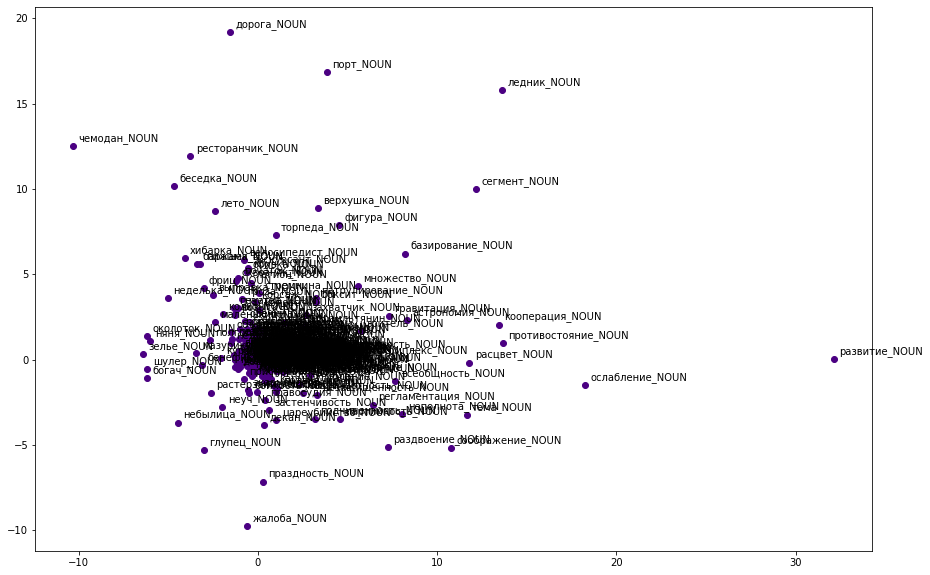

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import random
x = [n[0] for n in lsa_for_graph]
y = [n[1] for n in lsa_for_graph]
plt.figure(figsize = (15, 10)) 
plt.scatter(x, y, color='#4B0082')


#plt.scatter(coords[:, 0], coords[:, 1], color='red')

for i, word in enumerate(nouns_for_graph):
    plt.annotate(word, xy=(lsa_for_graph[i, 0] + 0.3, lsa_for_graph[i, 1] + 0.3))
plt.show()

In [74]:
all_res = get_matrix(first_result)
lsa_all = lsa_matrix(all_res, 2)


x = [n[0] for n in lsa_all[100:-100]]
y = [n[1] for n in lsa_all[100:-100]]
x_first_100 = [n[0] for n in lsa_all[:100]]
y_first_100 = [n[1] for n in lsa_all[:100]]
x_last_100 = [n[0] for n in lsa_all[-100:]]
y_last_100 = [n[1] for n in lsa_all[-100:]]

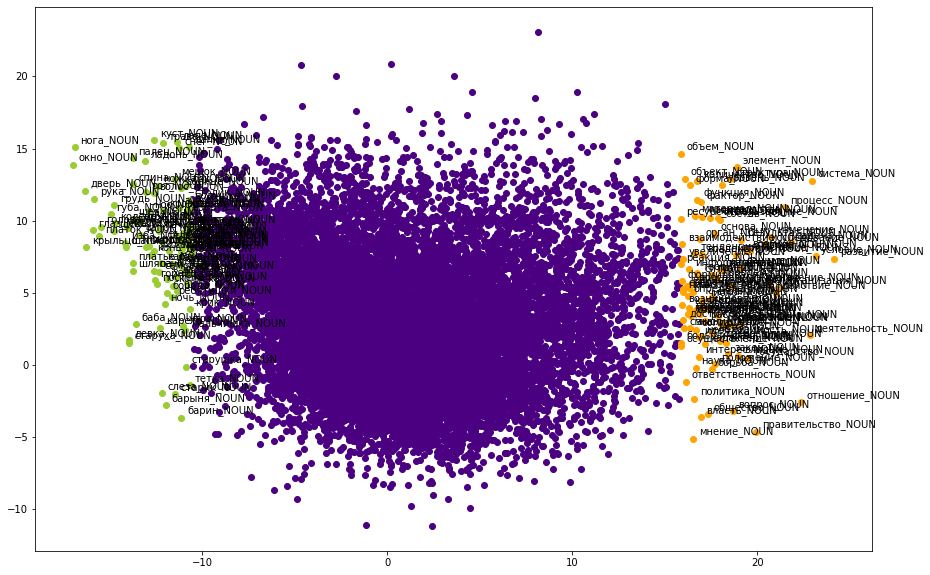

In [82]:
plt.figure(figsize = (15, 10)) 
plt.scatter(x, y, color='#4B0082')
plt.scatter(x_first_100, y_first_100, color='#FFA500')
plt.scatter(x_last_100, y_last_100, color='#9ACD32')

for i, word in enumerate(first_result[:100]):
    plt.annotate(word, xy=(x_first_100[i] + 0.3, y_first_100[i] + 0.3))

for i, word in enumerate(first_result[-100:]):
    plt.annotate(word, xy=(x_last_100[i] + 0.3, y_last_100[i] + 0.3))

Фиолетовые -- каждое двухсотое слово из отсортированного списка первой итерации, оранжевые -- первые сто слов этого же списка, зелёные -- последние сто слов этого же списка

In [162]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 4))
ax_3d = Axes3D(fig)
 
plt.show()

In [160]:
all_res = get_matrix(first_result)
lsa_all = lsa_matrix(all_res, 3)


x = [n[0] for n in lsa_all[100:-100]]
y = [n[1] for n in lsa_all[100:-100]]
z = [n[2] for n in lsa_all[100:-100]]
x_first_100 = [n[0] for n in lsa_all[:100]]
y_first_100 = [n[1] for n in lsa_all[:100]]
z_first_100 = [n[2] for n in lsa_all[:100]]
x_last_100 = [n[0] for n in lsa_all[-100:]]
y_last_100 = [n[1] for n in lsa_all[-100:]]
z_last_100 = [n[2] for n in lsa_all[-100:]]

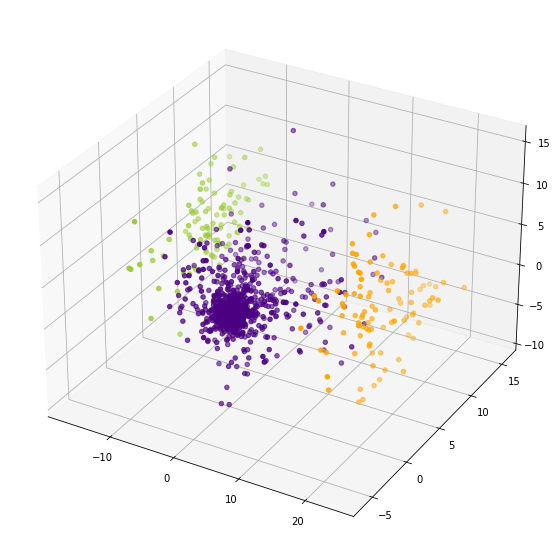

In [167]:
fig = plt.figure(figsize = (15, 10)) 

ax_3d = fig.add_subplot(projection='3d')

ax_3d.scatter(x[::50], y[::50], z[::50], color='#4B0082')
ax_3d.scatter(x_first_100, y_first_100, z_first_100, color='#FFA500')
ax_3d.scatter(x_last_100, y_last_100, z_last_100, color='#9ACD32')